# Data Prepping FORGE
This notebook loads the Foundations of Rebel Group Emergence (FORGE) dataset, recodes the information according to what is required for the empirical inquiry and merges the data with the existing UCDP data. The dataset is saved locally. 

In [1]:
### Load libraries -------
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import os

# Pandas parameters
pd.set_option('display.max_colwidth', -1)
#pd.set_option('display.max_rows', 2000)
#pd.set_option('display.max_columns', 500)

In [2]:
### Define plot parameters ------
plt.rcParams["font.family"] = "garamond"
plt.rcParams.update({'font.size': 22})
rcParams.update({'figure.autolayout': True})

In [3]:
### Define out paths ------

# check if out path exists, if it does not exists add the path
if not os.path.exists('C:\\Users\\frank\\Desktop\\master_thesis_out'):
    os.makedirs('C:\\Users\\frank\\Desktop\\master_thesis_out')

# add subfolders for the out path
out_paths = {
    "desciptive_plots_outcome": 'C:\\Users\\frank\\Desktop\\master_thesis_out\desciptive_plots_outcome',
    "desciptive_tables_outcome": 'C:\\Users\\frank\\Desktop\\master_thesis_out\desciptive_tables_outcome',
    "data": 'C:\\Users\\frank\\Desktop\\master_thesis_out\data'
}

for key, val in out_paths.items():
    if not os.path.exists(val):
        os.makedirs(val)
        
out_paths["desciptive_tables_outcome"]

'C:\\Users\\frank\\Desktop\\master_thesis_out\\desciptive_tables_outcome'

In [4]:
### Load prepared UCDP data from local folder --------
ucdp = pd.read_csv(os.path.join(out_paths["data"], "ucdp.csv"))
ucdp.head(3)

,year,side_a,side_a_new_id,side_b,side_b_new_id,dyad_name,dyad_new_id,active_year,best,high,low
0,2017,Government of Iraq,116,IS,234,Government of Iraq - IS,524,1,10040,12201,9791
1,1989,Government of Afghanistan,130,Jam'iyyat-i Islami-yi Afghanistan,292,Government of Afghanistan - Jam'iyyat-i Islami-yi Afghanistan,724,1,1545,1745,1374
2,1990,Government of Afghanistan,130,Jam'iyyat-i Islami-yi Afghanistan,292,Government of Afghanistan - Jam'iyyat-i Islami-yi Afghanistan,724,1,581,1231,515


In [5]:
### Get Foundations of Rebel Group Emergence (FORGE) Dataset data Version 1.0 ------
# Codebook: https://www.jessicamaves.com/uploads/1/2/8/8/12887895/forge_codebook_public.pdf
forge = pd.read_excel("https://www.jessicamaves.com/uploads/1/2/8/8/12887895/forge_v1.0_public.xlsx")
forge.head(3)

,conflict_id,dyadid,NSAdyadid,actorid,gacronym,gname,ccode,cname,foundloc,foundyear,...,preorgfmr,preorgrel,preorgfor,preorgref,preorgeth,preorgoth,preorgname,merger,splinter,splinterUCDP
0,333.0,725.0,731.0,293.0,Harakat-i Inqilab-i Islami-yi Afghanistan,Movement of the Islamic Revolution/Uprising of Afghanistan,700,Afghanistan,Pakistan,1978,...,0,0,0,0,0,0,Muslim Youth,0,NaN,NaN
1,333.0,731.0,737.0,298.0,Harakat-i Islami-yi Afghanistan,Islamic Movement,700,Afghanistan,"Qom, Iran",1978,...,0,0,0,0,0,0,NaN,0,NaN,NaN
2,333.0,726.0,412.0,299.0,Hizb-i Islami-yi Afghanistan,Islamic Party of Afghanistan,700,Afghanistan,Pakistan,1976,...,0,0,0,0,0,0,Jam'iyyat-i Islami-yi Afghanistan,0,1.0,0.0


In [6]:
### How many rebel groups are in UCDP and FORGE -------
print(len(ucdp.groupby(["dyad_new_id"]).size().reset_index().rename(columns={0:'count'})))
len(forge.groupby(["dyadid"]).size().reset_index().rename(columns={0:'count'})) 
# FORGE also includes non-state dyads and, hence, has a higher number of dyads + has some rebel groups with missing name and id

397


418

In [7]:
### Some of the dyads in the UCDP are not include in FORGE - find out which ----------
ucdp_dyads = ucdp[(ucdp["year"]<=2011) & (ucdp["year"]>=1989)].groupby(["dyad_new_id"]).size().reset_index().rename(columns={0:'count'})
forge_dyads = forge.groupby(["dyadid"]).size().reset_index().rename(columns={0:'count'})
forge_dyads['dyadid']=forge_dyads['dyadid'].astype(int)
dyads_complete = pd.merge(forge_dyads, ucdp_dyads,  how='outer', left_on=['dyadid'], right_on=['dyad_new_id'])
dyads_complete.head(3)

,dyadid,count_x,dyad_new_id,count_y
0,399.0,1.0,NaN,NaN
1,400.0,1.0,NaN,NaN
2,401.0,1.0,NaN,NaN


In [8]:
### These dyads are lost when UCDP and FORGE are merged ---------
dyad_lost = [422, 481, 614, 634, 660, 736, 775, 792, 796, 799, 825, 834, 836, 843, 847, 854, 858, 865, 878, 883, 902, 
                10054, 10516, 10985, 11199, 11299, 11336, 11377, 11932, 11971, 11973, 11978, 11979, 11988, 11990, 11991, 
                12009, 12104, 12298, 12300, 12575, 13821, 14273, 14471, 15558, 15800, 15801, 15993, 16286]
print(len(dyad_lost))

ucdp.loc[ucdp["dyad_new_id"]==799]
# the dyads which are not in FOREG do not seem systematic

49


,year,side_a,side_a_new_id,side_b,side_b_new_id,dyad_name,dyad_new_id,active_year,best,high,low
1277,1991,Government of Iraq,116,Government of Kuwait,125,Government of Iraq - Government of Kuwait,799,1,21790,26203,21747
1439,1990,Government of Iraq,116,Government of Kuwait,125,Government of Iraq - Government of Kuwait,799,1,1058,1058,1058


In [9]:
### Check dyad in FORGE -----
forge.loc[forge["dyadid"]==799]

,conflict_id,dyadid,NSAdyadid,actorid,gacronym,gname,ccode,cname,foundloc,foundyear,...,preorgfmr,preorgrel,preorgfor,preorgref,preorgeth,preorgoth,preorgname,merger,splinter,splinterUCDP


In [10]:
### There is an inconsistency with regards to dyad id 689 in FORGE -------------
# 689 is assigned to two different rebel-government dyads in the FORGE data
forge[["dyadid", "gname", "cname"]][(forge["dyadid"]==689)] 

,dyadid,gname,cname
302,689.0,Popular Front for the Liberation of the Occupied Arab Gulf,Oman
387,689.0,Alliance of Democratic Forces,Uganda


In [11]:
### Check which one is present in the UCDP data and delete one not consistent with UCDP -----
ucdp[["year", "dyad_new_id", "dyad_name"]][(ucdp["dyad_new_id"]==689)].head(1) # Government of Uganda - ADF
# keep Uganda which fits UCDP event data

,year,dyad_new_id,dyad_name
585,1996,689,Government of Uganda - ADF


In [12]:
### Drop observation 302 -------
forge_s = forge.drop(forge.index[302]) 
print(len(forge)) # check
print(len(forge_s)) # check
forge_s[["dyadid", "gname", "cname"]][(forge_s["dyadid"]==689)] # check

430
429


,dyadid,gname,cname
387,689.0,Alliance of Democratic Forces,Uganda


In [13]:
### Which variables are in FORGE -------------
forge_var = []
for col in forge_s.columns:
    forge_var.append(col)
forge_var

['conflict_id',
 'dyadid',
 'NSAdyadid',
 'actorid',
 'gacronym',
 'gname',
 'ccode',
 'cname',
 'foundloc',
 'foundyear',
 'foundmo',
 'foundday',
 'fightyear',
 'fightmo',
 'fightday',
 'goalnominal',
 'goalindep',
 'goalauto',
 'goalrights',
 'goalrep',
 'goalchange',
 'goaldem',
 'goalother',
 'goalnote',
 'ideology',
 'ideolcom',
 'ideolleft',
 'ideolright',
 'ideolnat',
 'ideolanti',
 'ideolrel',
 'ideoloth',
 'ideolnote',
 'religious',
 'religion',
 'ethnic',
 'ethnicity',
 'preorg',
 'preorgno',
 'preorgreb',
 'preorgter',
 'preorgpar',
 'preorgmvt',
 'preorgyou',
 'preorglab',
 'preorgmil',
 'preorggov',
 'preorgfmr',
 'preorgrel',
 'preorgfor',
 'preorgref',
 'preorgeth',
 'preorgoth',
 'preorgname',
 'merger',
 'splinter',
 'splinterUCDP']

In [14]:
### Only keep variables which are needed ------------------
forge_ss = forge_s[[
    #'conflict_id',
    'dyadid', 
    # 'NSAdyadid',
    # 'actorid',
    # 'gacronym',
    'gname', 
    'ccode', 
    'cname', 
    'foundloc', 
    'foundyear', 
    'foundmo', 
    'foundday', 
    'fightyear',
    'fightmo', 
    'fightday', 
    'goalnominal', 
    'goalindep', 
    'goalauto', 
    'goalrights', 
    'goalrep', 
    'goalchange',
    'goaldem', 
    'goalother', 
    'goalnote', 
    'ideology', 
    'ideolcom', 
    'ideolleft', 
    'ideolright', 
    'ideolnat',
    'ideolanti', 
    'ideolrel', 
    'ideoloth', 
    'ideolnote', 
    'religious', 
    'religion', 
    'ethnic', 
    'ethnicity',
    'preorg', 
    'preorgno', 
    'preorgreb', 
    'preorgter', 
    'preorgpar', 
    'preorgmvt', 
    'preorgyou', 
    'preorglab',
    'preorgmil', 
    'preorggov', 
    'preorgfmr', 
    'preorgrel', 
    'preorgfor', 
    'preorgref', 
    'preorgeth', 
    'preorgoth',
    'preorgname', 
    'merger', 
    'splinter', 
    'splinterUCDP']]
forge_ss.head(4)

,dyadid,gname,ccode,cname,foundloc,foundyear,foundmo,foundday,fightyear,fightmo,...,preorgfmr,preorgrel,preorgfor,preorgref,preorgeth,preorgoth,preorgname,merger,splinter,splinterUCDP
0,725.0,Movement of the Islamic Revolution/Uprising of Afghanistan,700,Afghanistan,Pakistan,1978,9.0,NaN,1980.0,12.0,...,0,0,0,0,0,0,Muslim Youth,0,NaN,NaN
1,731.0,Islamic Movement,700,Afghanistan,"Qom, Iran",1978,NaN,NaN,1984.0,12.0,...,0,0,0,0,0,0,NaN,0,NaN,NaN
2,726.0,Islamic Party of Afghanistan,700,Afghanistan,Pakistan,1976,NaN,NaN,1980.0,3.0,...,0,0,0,0,0,0,Jam'iyyat-i Islami-yi Afghanistan,0,1.0,0.0
3,727.0,Islamic Party of Afghanistan - Khalis faction,700,Afghanistan,"Khugiani, Afghanistan",1979,12.0,NaN,1980.0,12.0,...,0,0,0,0,0,0,Hizb-i Islami-yi Afghanistan,0,1.0,1.0


In [15]:
### Merge UCDP and FORGE data (inner merge) ----------
out_forge = pd.merge(ucdp, forge_ss,  how='inner', left_on=['dyad_new_id'], right_on=['dyadid'])
out_forge.head(3)

,year,side_a,side_a_new_id,side_b,side_b_new_id,dyad_name,dyad_new_id,active_year,best,high,...,preorgfmr,preorgrel,preorgfor,preorgref,preorgeth,preorgoth,preorgname,merger,splinter,splinterUCDP
0,2017,Government of Iraq,116,IS,234,Government of Iraq - IS,524,1,10040,12201,...,0,0,1,0,0,0,"Foreign fighters in Afghanistan (al-Zarqawi was Jordanian), possibly Jund al-Sham",0,NaN,NaN
1,2018,Government of Iraq,116,IS,234,Government of Iraq - IS,524,1,833,867,...,0,0,1,0,0,0,"Foreign fighters in Afghanistan (al-Zarqawi was Jordanian), possibly Jund al-Sham",0,NaN,NaN
2,2016,Government of Iraq,116,IS,234,Government of Iraq - IS,524,1,9832,10271,...,0,0,1,0,0,0,"Foreign fighters in Afghanistan (al-Zarqawi was Jordanian), possibly Jund al-Sham",0,NaN,NaN


In [16]:
### Subset data according to time frame 1989 and 2011 -------
print(out_forge["year"].min())
print(out_forge["year"].max()) # max should be until 2011 because FORGE only covers dyads 1946 and 2011

out_forge_s = out_forge[(out_forge["year"]<2012)]

1989
2019


In [17]:
### Check observations in dataset to see whether there are any duplicates ---------
check = out_forge_s.groupby(["dyad_new_id", "dyad_name", "year"]).size().reset_index().rename(columns={0:'count'})
check["count"].max() # no duplicates

# check length of dataset
print(len(out_forge_s))

check[0:3]

1518


,dyad_new_id,dyad_name,year,count
0,406,Government of Iran - KDPI,1990,1
1,406,Government of Iran - KDPI,1991,1
2,406,Government of Iran - KDPI,1992,1


In [18]:
### Check data to see whether merging was successful ------
out_forge_ss = out_forge_s[["dyad_new_id", "dyad_name", "year", "active_year", "foundloc", "foundyear", "cname"]]
out_forge_sss = out_forge_ss.sort_values(["dyad_new_id", "year"], ascending = (True, True))
out_forge_sss.head(3)

,dyad_new_id,dyad_name,year,active_year,foundloc,foundyear,cname
802,406,Government of Iran - KDPI,1990,1,Mahabad,1945,Iran
803,406,Government of Iran - KDPI,1991,0,Mahabad,1945,Iran
801,406,Government of Iran - KDPI,1992,0,Mahabad,1945,Iran


In [19]:
### Add iso3 country codes to dataset obtained from the correlates of war project ------
# COW Country Codes: The list of states with COW abbreviations and ID numbers 
cow = pd.read_csv("https://correlatesofwar.org/data-sets/cow-country-codes/cow-country-codes")
cow_s = cow[["StateAbb", "CCode"]]

# list has duplicates (for example Egypt)
cow_sd = cow_s.drop_duplicates()
cow_sd.head(3)

,StateAbb,CCode
0,USA,2
1,CAN,20
2,BHM,31


In [20]:
### Merge country codes to UCDP/FORGE data ------
out_forge_s_code_full = pd.merge(out_forge_s, cow_sd,  how='left', left_on=['ccode'], right_on=["CCode"])
out_forge_s_code_full.head(3)

,year,side_a,side_a_new_id,side_b,side_b_new_id,dyad_name,dyad_new_id,active_year,best,high,...,preorgfor,preorgref,preorgeth,preorgoth,preorgname,merger,splinter,splinterUCDP,StateAbb,CCode
0,2004,Government of Iraq,116,IS,234,Government of Iraq - IS,524,1,2422,3751,...,1,0,0,0,"Foreign fighters in Afghanistan (al-Zarqawi was Jordanian), possibly Jund al-Sham",0,NaN,NaN,IRQ,645
1,2005,Government of Iraq,116,IS,234,Government of Iraq - IS,524,1,2208,3058,...,1,0,0,0,"Foreign fighters in Afghanistan (al-Zarqawi was Jordanian), possibly Jund al-Sham",0,NaN,NaN,IRQ,645
2,2006,Government of Iraq,116,IS,234,Government of Iraq - IS,524,1,3743,3928,...,1,0,0,0,"Foreign fighters in Afghanistan (al-Zarqawi was Jordanian), possibly Jund al-Sham",0,NaN,NaN,IRQ,645


In [21]:
### Check length -----
print(len(ucdp[(ucdp["year"]<=2011) & (ucdp["year"]>=1989)]))
# 193 observations get lost since dyads are in UCDP but not in FORGE 
print(len(out_forge_s))
len(out_forge_s_code_full)

1711
1518


1518

In [22]:
### Which variables are in data -------------
dat_var = []
for col in out_forge_s_code_full.columns:
    dat_var.append(col)
dat_var

['year',
 'side_a',
 'side_a_new_id',
 'side_b',
 'side_b_new_id',
 'dyad_name',
 'dyad_new_id',
 'active_year',
 'best',
 'high',
 'low',
 'dyadid',
 'gname',
 'ccode',
 'cname',
 'foundloc',
 'foundyear',
 'foundmo',
 'foundday',
 'fightyear',
 'fightmo',
 'fightday',
 'goalnominal',
 'goalindep',
 'goalauto',
 'goalrights',
 'goalrep',
 'goalchange',
 'goaldem',
 'goalother',
 'goalnote',
 'ideology',
 'ideolcom',
 'ideolleft',
 'ideolright',
 'ideolnat',
 'ideolanti',
 'ideolrel',
 'ideoloth',
 'ideolnote',
 'religious',
 'religion',
 'ethnic',
 'ethnicity',
 'preorg',
 'preorgno',
 'preorgreb',
 'preorgter',
 'preorgpar',
 'preorgmvt',
 'preorgyou',
 'preorglab',
 'preorgmil',
 'preorggov',
 'preorgfmr',
 'preorgrel',
 'preorgfor',
 'preorgref',
 'preorgeth',
 'preorgoth',
 'preorgname',
 'merger',
 'splinter',
 'splinterUCDP',
 'StateAbb',
 'CCode']

In [23]:
### Make subset of data ------
out_forge_s_code = out_forge_s_code_full[['year',
 'StateAbb', # <--- add iso3 code here 
 'ccode',
 'cname',
 'side_a',
 'side_a_new_id',
 'side_b',
 'side_b_new_id',
 'dyad_name',
 'dyad_new_id',
 'active_year',
 'best',
 'high',
 'low',
 'foundloc',
 'foundyear',
 'foundmo',
 'foundday',
 'fightyear',
 'fightmo',
 'fightday',
 'goalnominal',
 'goalindep',
 'goalauto',
 'goalrights',
 'goalrep',
 'goalchange',
 'goaldem',
 'goalother',
 'goalnote',
 'ideology',
 'ideolcom',
 'ideolleft',
 'ideolright',
 'ideolnat',
 'ideolanti',
 'ideolrel',
 'ideoloth',
 'ideolnote',
 'religious',
 'religion',
 'ethnic',
 'ethnicity',
 'preorg',
 'preorgno',
 'preorgreb',
 'preorgter',
 'preorgpar',
 'preorgmvt',
 'preorgyou',
 'preorglab',
 'preorgmil',
 'preorggov',
 'preorgfmr',
 'preorgrel',
 'preorgfor',
 'preorgref',
 'preorgeth',
 'preorgoth',
 'preorgname',
 'merger',
 'splinter',
 'splinterUCDP',
 #'CCode' # <---- drop ccode
 ]]

out_forge_s_code.head(3)

,year,StateAbb,ccode,cname,side_a,side_a_new_id,side_b,side_b_new_id,dyad_name,dyad_new_id,...,preorgfmr,preorgrel,preorgfor,preorgref,preorgeth,preorgoth,preorgname,merger,splinter,splinterUCDP
0,2004,IRQ,645,Iraq,Government of Iraq,116,IS,234,Government of Iraq - IS,524,...,0,0,1,0,0,0,"Foreign fighters in Afghanistan (al-Zarqawi was Jordanian), possibly Jund al-Sham",0,NaN,NaN
1,2005,IRQ,645,Iraq,Government of Iraq,116,IS,234,Government of Iraq - IS,524,...,0,0,1,0,0,0,"Foreign fighters in Afghanistan (al-Zarqawi was Jordanian), possibly Jund al-Sham",0,NaN,NaN
2,2006,IRQ,645,Iraq,Government of Iraq,116,IS,234,Government of Iraq - IS,524,...,0,0,1,0,0,0,"Foreign fighters in Afghanistan (al-Zarqawi was Jordanian), possibly Jund al-Sham",0,NaN,NaN


In [24]:
### Look at Russia and USSR -------
out_forge_s_code.loc[out_forge_s_code["cname"]=="Russia"].head(3) # can be treated as one country

,year,StateAbb,ccode,cname,side_a,side_a_new_id,side_b,side_b_new_id,dyad_name,dyad_new_id,...,preorgfmr,preorgrel,preorgfor,preorgref,preorgeth,preorgoth,preorgname,merger,splinter,splinterUCDP
639,2002,RUS,365,Russia,Government of Russia (Soviet Union),57,Chechen Republic of Ichkeria,352,Government of Russia (Soviet Union) - Chechen Republic of Ichkeria,852,...,1,0,0,0,0,0,Soviet Army - National Guard,0,NaN,NaN
640,2004,RUS,365,Russia,Government of Russia (Soviet Union),57,Chechen Republic of Ichkeria,352,Government of Russia (Soviet Union) - Chechen Republic of Ichkeria,852,...,1,0,0,0,0,0,Soviet Army - National Guard,0,NaN,NaN
641,1994,RUS,365,Russia,Government of Russia (Soviet Union),57,Chechen Republic of Ichkeria,352,Government of Russia (Soviet Union) - Chechen Republic of Ichkeria,852,...,1,0,0,0,0,0,Soviet Army - National Guard,0,NaN,NaN


In [25]:
### Sort observations in dataset --------
out_forge_s_code = out_forge_s_code.sort_values(["dyad_new_id", "year"], ascending = (True, True))
out_forge_s_code.head(3)

,year,StateAbb,ccode,cname,side_a,side_a_new_id,side_b,side_b_new_id,dyad_name,dyad_new_id,...,preorgfmr,preorgrel,preorgfor,preorgref,preorgeth,preorgoth,preorgname,merger,splinter,splinterUCDP
654,1990,IRN,630,Iran,Government of Iran,114,KDPI,164,Government of Iran - KDPI,406,...,0,0,0,0,0,0,Komalay JK,0,NaN,NaN
655,1991,IRN,630,Iran,Government of Iran,114,KDPI,164,Government of Iran - KDPI,406,...,0,0,0,0,0,0,Komalay JK,0,NaN,NaN
653,1992,IRN,630,Iran,Government of Iran,114,KDPI,164,Government of Iran - KDPI,406,...,0,0,0,0,0,0,Komalay JK,0,NaN,NaN


In [26]:
### Get table with all dyads and all countries --------
check_g = out_forge_s_code.groupby(["dyad_new_id", "dyad_name"]).size().reset_index().rename(columns={0:'count'})
check_g.to_latex(os.path.join(out_paths["desciptive_tables_outcome"],"dyad_tab.tex"), longtable=True)

check_c = out_forge_s_code.groupby(["cname", "dyad_name"]).size().reset_index().rename(columns={0:'count'})
check_c.to_latex(os.path.join(out_paths["desciptive_tables_outcome"],"country_tab.tex"), longtable=True)

print(len(check_c["cname"].unique())) # 74 unique countries
len(check_g["dyad_new_id"].unique()) # 252 unique dyads

74


252

In [27]:
### Make list with dyad ids ---------
dyad_list = list(check_g["dyad_new_id"])
dyad_list[1]

411

In [28]:
### Check years -----
years = out_forge_s_code["year"].unique()
years.sort()
years

array([1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011], dtype=int64)

In [29]:
### Dyads disappear in years they do not have any fatalities -------------
# --> duplicate observations per hand based on https://ucdp.uu.se/
# The specific UCDP page is accessed like this https://ucdp.uu.se/statebased/ID for example: https://ucdp.uu.se/statebased/406
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[0]] 
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==406) & (out_forge_s_code['year'] == 1996)].copy()
for year in [1989, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", 
                  "cname", "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[0]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/406

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
659,406,1989,Government of Iran - KDPI,0,Iran,0,IRN
654,406,1990,Government of Iran - KDPI,1,Iran,31,IRN
655,406,1991,Government of Iran - KDPI,0,Iran,0,IRN
653,406,1992,Government of Iran - KDPI,0,Iran,4,IRN
656,406,1993,Government of Iran - KDPI,1,Iran,110,IRN
657,406,1994,Government of Iran - KDPI,0,Iran,18,IRN
658,406,1995,Government of Iran - KDPI,0,Iran,17,IRN
659,406,1996,Government of Iran - KDPI,1,Iran,27,IRN
659,406,1997,Government of Iran - KDPI,0,Iran,0,IRN
659,406,1998,Government of Iran - KDPI,0,Iran,0,IRN


In [30]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname", 
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[1]]
# Source: https://ucdp.uu.se/statebased/411

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1327,411,1989,Government of Philippines - CPP,1,Philippines,725,PHI
1328,411,1990,Government of Philippines - CPP,1,Philippines,1140,PHI
1329,411,1991,Government of Philippines - CPP,1,Philippines,1514,PHI
1330,411,1992,Government of Philippines - CPP,1,Philippines,430,PHI
1331,411,1993,Government of Philippines - CPP,1,Philippines,99,PHI
1332,411,1994,Government of Philippines - CPP,1,Philippines,69,PHI
1333,411,1995,Government of Philippines - CPP,1,Philippines,36,PHI
1334,411,1996,Government of Philippines - CPP,0,Philippines,6,PHI
1335,411,1997,Government of Philippines - CPP,1,Philippines,32,PHI
1336,411,1998,Government of Philippines - CPP,0,Philippines,6,PHI


In [31]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname", 
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[2]]
# Source: https://ucdp.uu.se/statebased/412

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1350,412,1989,"Government of Philippines - Military faction (forces of Honasan, Abenina & Zumel)",1,Philippines,97,PHI
1351,412,1990,"Government of Philippines - Military faction (forces of Honasan, Abenina & Zumel)",1,Philippines,25,PHI


In [32]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname", 
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[3]]
# Source: https://ucdp.uu.se/statebased/426

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1296,426,1989,Government of Paraguay - Military faction (forces of Andres Rodriguez),1,Paraguay,150,PAR


In [33]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[4]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==428) & (out_forge_s_code['year'] == 1995)].copy()
for year in [1996]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname", 
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[4]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/428

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1152,428,1989,Government of Myanmar (Burma) - KNU,1,Myanmar,1000,MYA
1153,428,1990,Government of Myanmar (Burma) - KNU,1,Myanmar,393,MYA
1154,428,1991,Government of Myanmar (Burma) - KNU,1,Myanmar,552,MYA
1155,428,1992,Government of Myanmar (Burma) - KNU,1,Myanmar,1163,MYA
1156,428,1993,Government of Myanmar (Burma) - KNU,0,Myanmar,11,MYA
1157,428,1994,Government of Myanmar (Burma) - KNU,1,Myanmar,25,MYA
1158,428,1995,Government of Myanmar (Burma) - KNU,1,Myanmar,110,MYA
1158,428,1996,Government of Myanmar (Burma) - KNU,0,Myanmar,0,MYA
1159,428,1997,Government of Myanmar (Burma) - KNU,1,Myanmar,41,MYA
1160,428,1998,Government of Myanmar (Burma) - KNU,1,Myanmar,36,MYA


In [34]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname", 
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[5]]
# Source: https://ucdp.uu.se/statebased/429

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1174,429,2000,Government of Myanmar (Burma) - God's Army,1,Myanmar,46,MYA
1175,429,2001,Government of Myanmar (Burma) - God's Army,0,Myanmar,3,MYA


In [35]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname", "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[6]]
# Source: https://ucdp.uu.se/statebased/430

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1176,430,2010,Government of Myanmar (Burma) - DKBA 5,1,Myanmar,58,MYA
1177,430,2011,Government of Myanmar (Burma) - DKBA 5,1,Myanmar,115,MYA


In [36]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[7]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==434) & (out_forge_s_code['year'] == 1992)].copy()
for year in [1993, 1995, 1996, 1997, 1998]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname", 
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[7]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/434

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1178,434,1990,Government of Myanmar (Burma) - ABSDF,1,Myanmar,25,MYA
1179,434,1991,Government of Myanmar (Burma) - ABSDF,1,Myanmar,25,MYA
1180,434,1992,Government of Myanmar (Burma) - ABSDF,1,Myanmar,25,MYA
1180,434,1993,Government of Myanmar (Burma) - ABSDF,0,Myanmar,0,MYA
1181,434,1994,Government of Myanmar (Burma) - ABSDF,1,Myanmar,25,MYA
1180,434,1995,Government of Myanmar (Burma) - ABSDF,0,Myanmar,0,MYA
1180,434,1996,Government of Myanmar (Burma) - ABSDF,0,Myanmar,0,MYA
1180,434,1997,Government of Myanmar (Burma) - ABSDF,0,Myanmar,0,MYA
1180,434,1998,Government of Myanmar (Burma) - ABSDF,0,Myanmar,0,MYA
1182,434,1999,Government of Myanmar (Burma) - ABSDF,0,Myanmar,1,MYA


In [37]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[8]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==442) & (out_forge_s_code['year'] == 1991)].copy()
for year in [1992, 1993, 1995, 1996, 1997, 1999,2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname", 
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[8]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/442

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
192,442,1991,Government of Myanmar (Burma) - RSO,1,Myanmar,25,MYA
192,442,1992,Government of Myanmar (Burma) - RSO,0,Myanmar,0,MYA
192,442,1993,Government of Myanmar (Burma) - RSO,0,Myanmar,0,MYA
193,442,1994,Government of Myanmar (Burma) - RSO,1,Myanmar,109,MYA
192,442,1995,Government of Myanmar (Burma) - RSO,0,Myanmar,0,MYA
192,442,1996,Government of Myanmar (Burma) - RSO,0,Myanmar,0,MYA
192,442,1997,Government of Myanmar (Burma) - RSO,0,Myanmar,0,MYA
194,442,1998,Government of Myanmar (Burma) - RSO,0,Myanmar,3,MYA
192,442,1999,Government of Myanmar (Burma) - RSO,0,Myanmar,0,MYA
191,442,2000,Government of Myanmar (Burma) - RSO,0,Myanmar,11,MYA


In [38]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[9]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==445) & (out_forge_s_code['year'] == 1990)].copy()
for year in [1991, 1992, 1993, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname", 
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[9]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/445

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1183,445,1990,Government of Myanmar (Burma) - NMSP,1,Myanmar,112,MYA
1183,445,1991,Government of Myanmar (Burma) - NMSP,0,Myanmar,0,MYA
1183,445,1992,Government of Myanmar (Burma) - NMSP,0,Myanmar,0,MYA
1183,445,1993,Government of Myanmar (Burma) - NMSP,0,Myanmar,0,MYA
1184,445,1994,Government of Myanmar (Burma) - NMSP,0,Myanmar,15,MYA
1185,445,1995,Government of Myanmar (Burma) - NMSP,0,Myanmar,4,MYA
1183,445,1996,Government of Myanmar (Burma) - NMSP,0,Myanmar,0,MYA
1183,445,1997,Government of Myanmar (Burma) - NMSP,0,Myanmar,0,MYA
1183,445,1998,Government of Myanmar (Burma) - NMSP,0,Myanmar,0,MYA
1183,445,1999,Government of Myanmar (Burma) - NMSP,0,Myanmar,0,MYA


In [39]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname", "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[10]]
# Source: https://ucdp.uu.se/statebased/446

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1186,446,1996,Government of Myanmar (Burma) - BMA,1,Myanmar,80,MYA


In [40]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[11]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==451) & (out_forge_s_code['year'] == 1994)].copy()
for year in [1995]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname", 
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[11]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/451

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
703,451,1989,Government of India - PWG,0,India,7,IND
704,451,1990,Government of India - PWG,0,India,7,IND
705,451,1991,Government of India - PWG,1,India,78,IND
706,451,1992,Government of India - PWG,1,India,322,IND
707,451,1993,Government of India - PWG,1,India,182,IND
708,451,1994,Government of India - PWG,1,India,68,IND
708,451,1995,Government of India - PWG,0,India,0,IND
709,451,1996,Government of India - PWG,1,India,173,IND
710,451,1997,Government of India - PWG,1,India,84,IND
711,451,1998,Government of India - PWG,1,India,99,IND


In [41]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[12]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==452) & (out_forge_s_code['year'] == 1992)].copy()
for year in [1993, 1994 , 1997]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname", 
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[12]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/452

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
718,452,1992,Government of India - MCC,0,India,1,IND
718,452,1993,Government of India - MCC,0,India,0,IND
718,452,1994,Government of India - MCC,0,India,0,IND
719,452,1995,Government of India - MCC,0,India,3,IND
720,452,1996,Government of India - MCC,0,India,7,IND
718,452,1997,Government of India - MCC,0,India,0,IND
721,452,1998,Government of India - MCC,0,India,19,IND
722,452,1999,Government of India - MCC,1,India,35,IND
723,452,2000,Government of India - MCC,1,India,25,IND
724,452,2001,Government of India - MCC,1,India,65,IND


In [42]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname", 
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[13]]
# Source: https://ucdp.uu.se/statebased/453

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
728,453,2004,Government of India - CPI-Maoist,0,India,18,IND
729,453,2005,Government of India - CPI-Maoist,1,India,199,IND
730,453,2006,Government of India - CPI-Maoist,1,India,545,IND
731,453,2007,Government of India - CPI-Maoist,1,India,375,IND
732,453,2008,Government of India - CPI-Maoist,1,India,384,IND
733,453,2009,Government of India - CPI-Maoist,1,India,522,IND
734,453,2010,Government of India - CPI-Maoist,1,India,570,IND
735,453,2011,Government of India - CPI-Maoist,1,India,293,IND


In [43]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname", 
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[14]]
# Source: https://ucdp.uu.se/statebased/459

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1514,459,2009,Government of Yemen (North Yemen) - AQAP,1,Yemen,94,YAR
1515,459,2010,Government of Yemen (North Yemen) - AQAP,1,Yemen,175,YAR
1516,459,2011,Government of Yemen (North Yemen) - AQAP,1,Yemen,1140,YAR


In [44]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[15]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==461) & (out_forge_s_code['year'] == 1992)].copy()
for year in [1993, 1994,1995, 1996, 1997, 1998, 1999, 2000, 2002, 2003, 2004, 2005, 2007, 2008, 2009, 2010]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname", 
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[15]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/461

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1187,461,1989,Government of Myanmar (Burma) - KIO,1,Myanmar,194,MYA
1188,461,1990,Government of Myanmar (Burma) - KIO,1,Myanmar,25,MYA
1189,461,1991,Government of Myanmar (Burma) - KIO,1,Myanmar,25,MYA
1190,461,1992,Government of Myanmar (Burma) - KIO,1,Myanmar,25,MYA
1190,461,1993,Government of Myanmar (Burma) - KIO,0,Myanmar,0,MYA
1190,461,1994,Government of Myanmar (Burma) - KIO,0,Myanmar,0,MYA
1190,461,1995,Government of Myanmar (Burma) - KIO,0,Myanmar,0,MYA
1190,461,1996,Government of Myanmar (Burma) - KIO,0,Myanmar,0,MYA
1190,461,1997,Government of Myanmar (Burma) - KIO,0,Myanmar,0,MYA
1190,461,1998,Government of Myanmar (Burma) - KIO,0,Myanmar,0,MYA


In [45]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname", 
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[16]]
# Source: https://ucdp.uu.se/statebased/469

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
668,469,1989,Government of Guatemala - URNG,1,Guatemala,82,GUA
669,469,1990,Government of Guatemala - URNG,1,Guatemala,83,GUA
670,469,1991,Government of Guatemala - URNG,1,Guatemala,72,GUA
671,469,1992,Government of Guatemala - URNG,1,Guatemala,67,GUA
672,469,1993,Government of Guatemala - URNG,1,Guatemala,58,GUA
673,469,1994,Government of Guatemala - URNG,1,Guatemala,37,GUA
674,469,1995,Government of Guatemala - URNG,1,Guatemala,27,GUA
675,469,1996,Government of Guatemala - URNG,0,Guatemala,13,GUA


In [46]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[17]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==474) & (out_forge_s_code['year'] == 1996)].copy()
for year in [1997, 1998, 1999, 2000, 2007, 2009, 2011]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname", 
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[17]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/474

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
999,474,1989,Government of Israel - PFLP,1,Israel,27,ISR
1012,474,1990,Government of Israel - PFLP,0,Israel,7,ISR
1013,474,1991,Government of Israel - PFLP,0,Israel,2,ISR
1000,474,1992,Government of Israel - PFLP,0,Israel,4,ISR
1001,474,1993,Government of Israel - PFLP,0,Israel,15,ISR
1002,474,1994,Government of Israel - PFLP,0,Israel,4,ISR
1003,474,1995,Government of Israel - PFLP,0,Israel,4,ISR
1014,474,1996,Government of Israel - PFLP,0,Israel,2,ISR
1014,474,1997,Government of Israel - PFLP,0,Israel,0,ISR
1014,474,1998,Government of Israel - PFLP,0,Israel,0,ISR


In [47]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[18]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==475) & (out_forge_s_code['year'] == 1995)].copy()
for year in [1996, 1998, 1999, 2003, 2004, 2005]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname", 
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[18]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/475

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1015,475,1989,Government of Israel - PFLP-GC,1,Israel,27,ISR
1016,475,1990,Government of Israel - PFLP-GC,0,Israel,5,ISR
1017,475,1991,Government of Israel - PFLP-GC,0,Israel,3,ISR
1018,475,1992,Government of Israel - PFLP-GC,0,Israel,12,ISR
1019,475,1993,Government of Israel - PFLP-GC,0,Israel,3,ISR
1020,475,1994,Government of Israel - PFLP-GC,0,Israel,7,ISR
1021,475,1995,Government of Israel - PFLP-GC,0,Israel,17,ISR
1021,475,1996,Government of Israel - PFLP-GC,0,Israel,0,ISR
1022,475,1997,Government of Israel - PFLP-GC,0,Israel,1,ISR
1021,475,1998,Government of Israel - PFLP-GC,0,Israel,0,ISR


In [48]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[19]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==476) & (out_forge_s_code['year'] == 1995)].copy()
for year in [1996, 1997, 1998, 1999, 2003, 2011]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname", 
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[19]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/476

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
573,476,1989,Government of Israel - Fatah,0,Israel,5,ISR
574,476,1990,Government of Israel - Fatah,1,Israel,29,ISR
575,476,1991,Government of Israel - Fatah,1,Israel,28,ISR
572,476,1992,Government of Israel - Fatah,1,Israel,33,ISR
576,476,1993,Government of Israel - Fatah,0,Israel,13,ISR
577,476,1994,Government of Israel - Fatah,0,Israel,7,ISR
578,476,1995,Government of Israel - Fatah,0,Israel,3,ISR
578,476,1996,Government of Israel - Fatah,0,Israel,0,ISR
578,476,1997,Government of Israel - Fatah,0,Israel,0,ISR
578,476,1998,Government of Israel - Fatah,0,Israel,0,ISR


In [49]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname", 
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[20]]
# Source: https://ucdp.uu.se/statebased/477

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
474,477,1989,Government of Israel - Hamas,0,Israel,3,ISR
475,477,1990,Government of Israel - Hamas,0,Israel,2,ISR
476,477,1991,Government of Israel - Hamas,0,Israel,10,ISR
477,477,1992,Government of Israel - Hamas,0,Israel,17,ISR
478,477,1993,Government of Israel - Hamas,1,Israel,47,ISR
479,477,1994,Government of Israel - Hamas,1,Israel,44,ISR
480,477,1995,Government of Israel - Hamas,0,Israel,12,ISR
481,477,1996,Government of Israel - Hamas,0,Israel,4,ISR
482,477,1997,Government of Israel - Hamas,0,Israel,1,ISR
483,477,1998,Government of Israel - Hamas,0,Israel,4,ISR


In [50]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[21]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==478) & (out_forge_s_code['year'] == 1990)].copy()
for year in [1989, 1996]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname", 
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[21]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/478

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1027,478,1989,Government of Israel - PIJ,0,Israel,0,ISR
1027,478,1990,Government of Israel - PIJ,0,Israel,0,ISR
1028,478,1991,Government of Israel - PIJ,0,Israel,1,ISR
1029,478,1992,Government of Israel - PIJ,0,Israel,8,ISR
1030,478,1993,Government of Israel - PIJ,0,Israel,8,ISR
1031,478,1994,Government of Israel - PIJ,0,Israel,10,ISR
1032,478,1995,Government of Israel - PIJ,1,Israel,34,ISR
1027,478,1996,Government of Israel - PIJ,0,Israel,0,ISR
1033,478,1997,Government of Israel - PIJ,0,Israel,0,ISR
1034,478,1998,Government of Israel - PIJ,0,Israel,1,ISR


In [51]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[22]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==479) & (out_forge_s_code['year'] == 1996)].copy()
for year in [1997, 1998, 1999, 2003]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname", 
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[22]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/479

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1048,479,1995,Government of Israel - PNA,0,Israel,3,ISR
1049,479,1996,Government of Israel - PNA,1,Israel,66,ISR
1049,479,1997,Government of Israel - PNA,0,Israel,0,ISR
1049,479,1998,Government of Israel - PNA,0,Israel,0,ISR
1049,479,1999,Government of Israel - PNA,0,Israel,0,ISR
1050,479,2000,Government of Israel - PNA,1,Israel,47,ISR
1051,479,2001,Government of Israel - PNA,1,Israel,75,ISR
1052,479,2002,Government of Israel - PNA,1,Israel,116,ISR
1049,479,2003,Government of Israel - PNA,0,Israel,0,ISR
1053,479,2004,Government of Israel - PNA,0,Israel,10,ISR


In [52]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname", 
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[23]]
# Source: https://ucdp.uu.se/statebased/480

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1057,480,2000,Government of Israel - AMB,0,Israel,1,ISR
1058,480,2001,Government of Israel - AMB,0,Israel,2,ISR
1059,480,2002,Government of Israel - AMB,1,Israel,131,ISR
1060,480,2003,Government of Israel - AMB,1,Israel,38,ISR
1061,480,2004,Government of Israel - AMB,1,Israel,105,ISR


In [53]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[24]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==508) & (out_forge_s_code['year'] == 1992)].copy()
for year in [1989, 1990, 1991, 1998, 2004, 2008]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname", 
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[24]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/508

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
736,508,1989,Government of India - NSCN-IM,0,India,0,IND
736,508,1990,Government of India - NSCN-IM,0,India,0,IND
736,508,1991,Government of India - NSCN-IM,0,India,0,IND
736,508,1992,Government of India - NSCN-IM,1,India,47,IND
737,508,1993,Government of India - NSCN-IM,1,India,92,IND
738,508,1994,Government of India - NSCN-IM,1,India,60,IND
739,508,1995,Government of India - NSCN-IM,1,India,95,IND
740,508,1996,Government of India - NSCN-IM,1,India,40,IND
741,508,1997,Government of India - NSCN-IM,1,India,37,IND
736,508,1998,Government of India - NSCN-IM,0,India,0,IND


In [54]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[25]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==511) & (out_forge_s_code['year'] == 1989)].copy()
for year in [1990, 1991, 1993, 1994, 2000, 2008, 2009, 2011]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[25]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/508

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1194,511,1989,Government of Myanmar (Burma) - KNPP,0,Myanmar,18,MYA
1194,511,1990,Government of Myanmar (Burma) - KNPP,0,Myanmar,0,MYA
1194,511,1991,Government of Myanmar (Burma) - KNPP,0,Myanmar,0,MYA
1195,511,1992,Government of Myanmar (Burma) - KNPP,1,Myanmar,404,MYA
1194,511,1993,Government of Myanmar (Burma) - KNPP,0,Myanmar,0,MYA
1194,511,1994,Government of Myanmar (Burma) - KNPP,0,Myanmar,0,MYA
1196,511,1995,Government of Myanmar (Burma) - KNPP,0,Myanmar,3,MYA
1197,511,1996,Government of Myanmar (Burma) - KNPP,1,Myanmar,124,MYA
1198,511,1997,Government of Myanmar (Burma) - KNPP,0,Myanmar,7,MYA
1199,511,1998,Government of Myanmar (Burma) - KNPP,0,Myanmar,1,MYA


In [55]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[26]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==521) & (out_forge_s_code['year'] == 1991)].copy()
for year in [1989, 1990, 1997, 1998, 1999, 2000, 2001, 2002, 2003]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[26]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/521

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
971,521,1989,Government of Iraq - SCIRI,0,Iraq,0,IRQ
971,521,1990,Government of Iraq - SCIRI,0,Iraq,0,IRQ
971,521,1991,Government of Iraq - SCIRI,1,Iraq,237,IRQ
972,521,1992,Government of Iraq - SCIRI,1,Iraq,280,IRQ
973,521,1993,Government of Iraq - SCIRI,1,Iraq,75,IRQ
974,521,1994,Government of Iraq - SCIRI,1,Iraq,34,IRQ
975,521,1995,Government of Iraq - SCIRI,1,Iraq,325,IRQ
976,521,1996,Government of Iraq - SCIRI,1,Iraq,42,IRQ
971,521,1997,Government of Iraq - SCIRI,0,Iraq,0,IRQ
971,521,1998,Government of Iraq - SCIRI,0,Iraq,0,IRQ


In [56]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[27]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==523) & (out_forge_s_code['year'] == 2003)].copy()
for year in [2010]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[27]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/523

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
978,523,2003,Government of Iraq - Ansar al-Islam,0,Iraq,2,IRQ
979,523,2004,Government of Iraq - Ansar al-Islam,1,Iraq,414,IRQ
980,523,2005,Government of Iraq - Ansar al-Islam,1,Iraq,302,IRQ
981,523,2006,Government of Iraq - Ansar al-Islam,1,Iraq,160,IRQ
982,523,2007,Government of Iraq - Ansar al-Islam,1,Iraq,25,IRQ
983,523,2008,Government of Iraq - Ansar al-Islam,0,Iraq,6,IRQ
984,523,2009,Government of Iraq - Ansar al-Islam,0,Iraq,3,IRQ
978,523,2010,Government of Iraq - Ansar al-Islam,0,Iraq,0,IRQ
985,523,2011,Government of Iraq - Ansar al-Islam,1,Iraq,27,IRQ


In [57]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[28]]
# Source: https://ucdp.uu.se/statebased/524

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
0,524,2004,Government of Iraq - IS,1,Iraq,2422,IRQ
1,524,2005,Government of Iraq - IS,1,Iraq,2208,IRQ
2,524,2006,Government of Iraq - IS,1,Iraq,3743,IRQ
3,524,2007,Government of Iraq - IS,1,Iraq,1741,IRQ
4,524,2008,Government of Iraq - IS,1,Iraq,1246,IRQ
5,524,2009,Government of Iraq - IS,1,Iraq,1036,IRQ
6,524,2010,Government of Iraq - IS,1,Iraq,1015,IRQ
7,524,2011,Government of Iraq - IS,1,Iraq,837,IRQ


In [58]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[29]]
# Source: https://ucdp.uu.se/statebased/525

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
986,525,2004,Government of Iraq - RJF,0,Iraq,5,IRQ
987,525,2005,Government of Iraq - RJF,1,Iraq,98,IRQ
988,525,2006,Government of Iraq - RJF,1,Iraq,31,IRQ
989,525,2007,Government of Iraq - RJF,1,Iraq,75,IRQ


In [59]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[30]]
# Source: https://ucdp.uu.se/statebased/532

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1083,532,1989,Government of Lebanon - Forces of Michel Aoun,1,Lebanon,458,LEB
1084,532,1990,Government of Lebanon - Forces of Michel Aoun,1,Lebanon,700,LEB


In [60]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[31]]
# Source: https://ucdp.uu.se/statebased/533

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1085,533,1989,Government of Lebanon - Lebanese Forces,1,Lebanon,253,LEB


In [61]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[32]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==537) & (out_forge_s_code['year'] == 1990)].copy()
for year in [1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[32]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/537

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1080,537,1989,Government of Laos - LRM,1,Laos,30,LAO
1081,537,1990,Government of Laos - LRM,1,Laos,249,LAO
1081,537,1991,Government of Laos - LRM,0,Laos,0,LAO
1081,537,1992,Government of Laos - LRM,0,Laos,0,LAO
1081,537,1993,Government of Laos - LRM,0,Laos,0,LAO
1081,537,1994,Government of Laos - LRM,0,Laos,0,LAO
1081,537,1995,Government of Laos - LRM,0,Laos,0,LAO
1081,537,1996,Government of Laos - LRM,0,Laos,0,LAO
1081,537,1997,Government of Laos - LRM,0,Laos,0,LAO
1081,537,1998,Government of Laos - LRM,0,Laos,0,LAO


In [62]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[33]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==549) & (out_forge_s_code['year'] == 1993)].copy()
for year in [1989, 1990, 1991, 1992]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[33]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/549

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1209,549,1989,Government of Myanmar (Burma) - MTA,0,Myanmar,0,MYA
1209,549,1990,Government of Myanmar (Burma) - MTA,0,Myanmar,0,MYA
1209,549,1991,Government of Myanmar (Burma) - MTA,0,Myanmar,0,MYA
1209,549,1992,Government of Myanmar (Burma) - MTA,0,Myanmar,0,MYA
1209,549,1993,Government of Myanmar (Burma) - MTA,1,Myanmar,130,MYA
1210,549,1994,Government of Myanmar (Burma) - MTA,1,Myanmar,526,MYA
1211,549,1995,Government of Myanmar (Burma) - MTA,1,Myanmar,174,MYA
1212,549,1996,Government of Myanmar (Burma) - MTA,0,Myanmar,3,MYA


In [63]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[34]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==550) & (out_forge_s_code['year'] == 2002)].copy()
for year in [2003]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[34]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/550

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1213,550,1996,Government of Myanmar (Burma) - RCSS,1,Myanmar,25,MYA
1214,550,1997,Government of Myanmar (Burma) - RCSS,1,Myanmar,152,MYA
1215,550,1998,Government of Myanmar (Burma) - RCSS,1,Myanmar,25,MYA
1216,550,1999,Government of Myanmar (Burma) - RCSS,1,Myanmar,25,MYA
1217,550,2000,Government of Myanmar (Burma) - RCSS,1,Myanmar,69,MYA
1218,550,2001,Government of Myanmar (Burma) - RCSS,1,Myanmar,117,MYA
1219,550,2002,Government of Myanmar (Burma) - RCSS,1,Myanmar,184,MYA
1219,550,2003,Government of Myanmar (Burma) - RCSS,0,Myanmar,0,MYA
1220,550,2004,Government of Myanmar (Burma) - RCSS,0,Myanmar,10,MYA
1221,550,2005,Government of Myanmar (Burma) - RCSS,1,Myanmar,27,MYA


In [64]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[35]]
# Source: https://ucdp.uu.se/statebased/558

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
514,558,1989,Government of Ethiopia - EPRDF,1,Ethiopia,18366,ETH
515,558,1990,Government of Ethiopia - EPRDF,1,Ethiopia,18985,ETH
516,558,1991,Government of Ethiopia - EPRDF,1,Ethiopia,3918,ETH


In [65]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[36]]
# Source: https://ucdp.uu.se/statebased/559

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
517,559,1989,Government of Ethiopia - Military faction (forces of Amsha Desta and Merid Negusie),1,Ethiopia,37,ETH


In [66]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[37]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==562) & (out_forge_s_code['year'] == 2006)].copy()
for year in [2007, 2008, 2010, 2011]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[37]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/562

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1236,562,1996,Government of Nepal - CPN-M,1,Nepal,44,NEP
1237,562,1997,Government of Nepal - CPN-M,1,Nepal,40,NEP
1238,562,1998,Government of Nepal - CPN-M,1,Nepal,250,NEP
1239,562,1999,Government of Nepal - CPN-M,1,Nepal,156,NEP
1240,562,2000,Government of Nepal - CPN-M,1,Nepal,268,NEP
1241,562,2001,Government of Nepal - CPN-M,1,Nepal,429,NEP
1242,562,2002,Government of Nepal - CPN-M,1,Nepal,3946,NEP
1243,562,2003,Government of Nepal - CPN-M,1,Nepal,1341,NEP
1244,562,2004,Government of Nepal - CPN-M,1,Nepal,1880,NEP
1245,562,2005,Government of Nepal - CPN-M,1,Nepal,1104,NEP


In [67]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[38]]
# Source: https://ucdp.uu.se/statebased/564

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
990,564,1989,Government of Iraq - KDP,1,Iraq,25,IRQ
991,564,1990,Government of Iraq - KDP,1,Iraq,34,IRQ
992,564,1991,Government of Iraq - KDP,1,Iraq,298,IRQ
993,564,1992,Government of Iraq - KDP,0,Iraq,1,IRQ


In [68]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[39]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==565) & (out_forge_s_code['year'] == 1989)].copy()
for year in [1993, 1994]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[39]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/565

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
918,565,1989,Government of Iraq - PUK,1,Iraq,25,IRQ
919,565,1990,Government of Iraq - PUK,1,Iraq,60,IRQ
920,565,1991,Government of Iraq - PUK,1,Iraq,949,IRQ
921,565,1992,Government of Iraq - PUK,1,Iraq,26,IRQ
918,565,1993,Government of Iraq - PUK,0,Iraq,0,IRQ
918,565,1994,Government of Iraq - PUK,0,Iraq,0,IRQ
922,565,1995,Government of Iraq - PUK,1,Iraq,262,IRQ
917,565,1996,Government of Iraq - PUK,1,Iraq,356,IRQ


In [69]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[40]]
# Source: https://ucdp.uu.se/statebased/571

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
518,571,1989,Government of Ethiopia - EPLF,1,Ethiopia,5930,ETH
519,571,1990,Government of Ethiopia - EPLF,1,Ethiopia,30633,ETH
520,571,1991,Government of Ethiopia - EPLF,1,Ethiopia,6907,ETH


In [70]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[41]]
# Source: https://ucdp.uu.se/statebased/575

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1513,575,1992,Government of Venezuela - Military faction (forces of Hugo Chávez),1,Venezuela,144,VEN


In [71]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[42]]
# Source: https://ucdp.uu.se/statebased/584

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
440,584,1996,Government of DR Congo (Zaire) - AFDL,1,DRC,1304,DRC
441,584,1997,Government of DR Congo (Zaire) - AFDL,1,DRC,4457,DRC


In [72]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[43]]
# Source: https://ucdp.uu.se/statebased/585

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
442,585,1998,Government of DR Congo (Zaire) - MLC,1,DRC,374,DRC
443,585,1999,Government of DR Congo (Zaire) - MLC,1,DRC,1807,DRC
444,585,2000,Government of DR Congo (Zaire) - MLC,1,DRC,389,DRC
445,585,2001,Government of DR Congo (Zaire) - MLC,0,DRC,8,DRC


In [73]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[44]]
# Source: https://ucdp.uu.se/statebased/586

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
446,586,1998,Government of DR Congo (Zaire) - RCD,1,DRC,2894,DRC
447,586,1999,Government of DR Congo (Zaire) - RCD,1,DRC,1146,DRC
448,586,2000,Government of DR Congo (Zaire) - RCD,1,DRC,905,DRC
449,586,2001,Government of DR Congo (Zaire) - RCD,1,DRC,454,DRC


In [74]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[45]]
# Source: https://ucdp.uu.se/statebased/588

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
450,588,2006,Government of DR Congo (Zaire) - CNDP,1,DRC,182,DRC
451,588,2007,Government of DR Congo (Zaire) - CNDP,1,DRC,516,DRC
452,588,2008,Government of DR Congo (Zaire) - CNDP,1,DRC,486,DRC


In [75]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[46]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==593) & (out_forge_s_code['year'] == 1992)].copy()
for year in [1993, 1994]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[46]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/593

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
235,593,1991,Government of Burundi - Palipehutu,1,Burundi,272,BUI
236,593,1992,Government of Burundi - Palipehutu,1,Burundi,61,BUI
236,593,1993,Government of Burundi - Palipehutu,0,Burundi,0,BUI
236,593,1994,Government of Burundi - Palipehutu,0,Burundi,0,BUI
237,593,1995,Government of Burundi - Palipehutu,0,Burundi,13,BUI


In [76]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[47]]
# Source: https://ucdp.uu.se/statebased/594

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
238,594,1994,Government of Burundi - CNDD,1,Burundi,56,BUI
239,594,1995,Government of Burundi - CNDD,1,Burundi,254,BUI
240,594,1996,Government of Burundi - CNDD,1,Burundi,531,BUI
241,594,1997,Government of Burundi - CNDD,1,Burundi,396,BUI
242,594,1998,Government of Burundi - CNDD,1,Burundi,273,BUI


In [77]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[48]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==595) & (out_forge_s_code['year'] == 1990)].copy()
for year in [1991, 1992, 1993, 1994, 1996]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[48]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/595

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
243,595,1990,Government of Burundi - Frolina,0,Burundi,7,BUI
243,595,1991,Government of Burundi - Frolina,0,Burundi,0,BUI
243,595,1992,Government of Burundi - Frolina,0,Burundi,0,BUI
243,595,1993,Government of Burundi - Frolina,0,Burundi,0,BUI
243,595,1994,Government of Burundi - Frolina,0,Burundi,0,BUI
244,595,1995,Government of Burundi - Frolina,0,Burundi,4,BUI
243,595,1996,Government of Burundi - Frolina,0,Burundi,0,BUI
245,595,1997,Government of Burundi - Frolina,1,Burundi,131,BUI


In [78]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[49]]
# Source: https://ucdp.uu.se/statebased/596

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
246,596,1997,Government of Burundi - Palipehutu-FNL,1,Burundi,112,BUI
247,596,1998,Government of Burundi - Palipehutu-FNL,1,Burundi,305,BUI
248,596,1999,Government of Burundi - Palipehutu-FNL,1,Burundi,292,BUI
249,596,2000,Government of Burundi - Palipehutu-FNL,1,Burundi,448,BUI
250,596,2001,Government of Burundi - Palipehutu-FNL,1,Burundi,740,BUI
251,596,2002,Government of Burundi - Palipehutu-FNL,1,Burundi,562,BUI
252,596,2003,Government of Burundi - Palipehutu-FNL,1,Burundi,710,BUI
253,596,2004,Government of Burundi - Palipehutu-FNL,1,Burundi,387,BUI
254,596,2005,Government of Burundi - Palipehutu-FNL,1,Burundi,286,BUI
255,596,2006,Government of Burundi - Palipehutu-FNL,1,Burundi,141,BUI


In [79]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[50]]
# Source: https://ucdp.uu.se/statebased/597

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
258,597,1998,Government of Burundi - CNDD-FDD,1,Burundi,43,BUI
259,597,1999,Government of Burundi - CNDD-FDD,1,Burundi,232,BUI
260,597,2000,Government of Burundi - CNDD-FDD,1,Burundi,900,BUI
261,597,2001,Government of Burundi - CNDD-FDD,1,Burundi,442,BUI
262,597,2002,Government of Burundi - CNDD-FDD,1,Burundi,552,BUI
263,597,2003,Government of Burundi - CNDD-FDD,1,Burundi,262,BUI


In [80]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[51]]
# Source: https://ucdp.uu.se/statebased/606

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
318,606,1989,Government of Chad - Islamic Legion,1,Chad,235,CHA
319,606,1990,Government of Chad - Islamic Legion,1,Chad,252,CHA


In [81]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[52]]
# Source: https://ucdp.uu.se/statebased/607

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
320,607,1989,Government of Chad - MOSANAT,1,Chad,50,CHA


In [82]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[53]]
# Source: https://ucdp.uu.se/statebased/608

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1425,608,1989,Government of Chad - Revolutionary Forces of 1 April,1,Chad,30,CHA


In [83]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[54]]
# Source: https://ucdp.uu.se/statebased/609

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
321,609,1990,Government of Chad - MPS,1,Chad,1100,CHA


In [84]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[55]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==610) & (out_forge_s_code['year'] == 1995)].copy()
for year in [1996]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[55]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/610

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
322,610,1991,Government of Chad - MDD,1,Chad,25,CHA
323,610,1992,Government of Chad - MDD,1,Chad,726,CHA
324,610,1993,Government of Chad - MDD,1,Chad,40,CHA
325,610,1994,Government of Chad - MDD,0,Chad,2,CHA
326,610,1995,Government of Chad - MDD,0,Chad,4,CHA
326,610,1996,Government of Chad - MDD,0,Chad,0,CHA
327,610,1997,Government of Chad - MDD,1,Chad,39,CHA


In [85]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[56]]
# Source: https://ucdp.uu.se/statebased/611

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
328,611,1991,Government of Chad - Military faction (forces of Maldoum Bada Abbas),1,Chad,43,CHA


In [86]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[57]]
# Source: https://ucdp.uu.se/statebased/612

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
329,612,1992,Government of Chad - CNR,1,Chad,115,CHA
330,612,1993,Government of Chad - CNR,1,Chad,25,CHA
331,612,1994,Government of Chad - CNR,1,Chad,25,CHA


In [87]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[58]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==613) & (out_forge_s_code['year'] == 1994)].copy()
for year in [1995, 1996, 1997, 1998, 1999]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[58]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/613

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
332,613,1992,Government of Chad - CSNPD,1,Chad,33,CHA
333,613,1993,Government of Chad - CSNPD,1,Chad,30,CHA
334,613,1994,Government of Chad - CSNPD,1,Chad,100,CHA
334,613,1995,Government of Chad - CSNPD,0,Chad,0,CHA
334,613,1996,Government of Chad - CSNPD,0,Chad,0,CHA
334,613,1997,Government of Chad - CSNPD,0,Chad,0,CHA
334,613,1998,Government of Chad - CSNPD,0,Chad,0,CHA
334,613,1999,Government of Chad - CSNPD,0,Chad,0,CHA
335,613,2000,Government of Chad - CSNPD,0,Chad,4,CHA


In [88]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[59]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==615) & (out_forge_s_code['year'] == 1994)].copy()
for year in [1995, 1996]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[59]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/615

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
336,615,1994,Government of Chad - FARF,0,Chad,9,CHA
336,615,1995,Government of Chad - FARF,0,Chad,0,CHA
336,615,1996,Government of Chad - FARF,0,Chad,0,CHA
337,615,1997,Government of Chad - FARF,1,Chad,58,CHA
338,615,1998,Government of Chad - FARF,1,Chad,34,CHA


In [89]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[60]]
# Source: https://ucdp.uu.se/statebased/616

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
339,616,1999,Government of Chad - MDJT,1,Chad,394,CHA
340,616,2000,Government of Chad - MDJT,1,Chad,989,CHA
341,616,2001,Government of Chad - MDJT,1,Chad,226,CHA
342,616,2002,Government of Chad - MDJT,1,Chad,294,CHA
343,616,2003,Government of Chad - MDJT,1,Chad,37,CHA


In [90]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[61]]
# Source: https://ucdp.uu.se/statebased/617

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
344,617,2005,Government of Chad - FUCD,1,Chad,100,CHA
345,617,2006,Government of Chad - FUCD,1,Chad,879,CHA
346,617,2007,Government of Chad - FUCD,0,Chad,21,CHA


In [91]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[62]]
# Source: https://ucdp.uu.se/statebased/618

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
347,618,2006,Government of Chad - RAFD,1,Chad,32,CHA
348,618,2007,Government of Chad - RAFD,0,Chad,9,CHA


In [92]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[63]]
# Source: https://ucdp.uu.se/statebased/619

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
349,619,2006,Government of Chad - UFDD,1,Chad,339,CHA
350,619,2007,Government of Chad - UFDD,1,Chad,69,CHA


In [93]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[64]]
# Source: https://ucdp.uu.se/statebased/620

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
351,620,2008,Government of Chad - AN,1,Chad,991,CHA


In [94]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[65]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==621) & (out_forge_s_code['year'] == 2009)].copy()
for year in [2010, 2011]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[65]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/621

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
352,621,2009,Government of Chad - UFR,1,Chad,131,CHA
352,621,2010,Government of Chad - UFR,0,Chad,0,CHA
352,621,2011,Government of Chad - UFR,0,Chad,0,CHA


In [95]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[66]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==622) & (out_forge_s_code['year'] == 2007)].copy()
for year in [2008, 2009]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[66]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/622

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
353,622,2007,Government of Chad - FPRN,0,Chad,1,CHA
353,622,2008,Government of Chad - FPRN,0,Chad,0,CHA
353,622,2009,Government of Chad - FPRN,0,Chad,0,CHA
354,622,2010,Government of Chad - FPRN,1,Chad,42,CHA


In [96]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[67]]
# Source: https://ucdp.uu.se/statebased/623

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
364,623,1989,Government of Colombia - FARC,1,Colombia,63,COL
365,623,1990,Government of Colombia - FARC,1,Colombia,351,COL
366,623,1991,Government of Colombia - FARC,1,Colombia,666,COL
367,623,1992,Government of Colombia - FARC,1,Colombia,1404,COL
368,623,1993,Government of Colombia - FARC,1,Colombia,130,COL
369,623,1994,Government of Colombia - FARC,1,Colombia,1082,COL
370,623,1995,Government of Colombia - FARC,1,Colombia,770,COL
371,623,1996,Government of Colombia - FARC,1,Colombia,885,COL
372,623,1997,Government of Colombia - FARC,1,Colombia,442,COL
373,623,1998,Government of Colombia - FARC,1,Colombia,876,COL


In [97]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[68]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==624) & (out_forge_s_code['year'] == 2010)].copy()
for year in [2011]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[68]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/624

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
387,624,1989,Government of Colombia - ELN,1,Colombia,142,COL
388,624,1990,Government of Colombia - ELN,1,Colombia,115,COL
389,624,1991,Government of Colombia - ELN,1,Colombia,59,COL
390,624,1992,Government of Colombia - ELN,1,Colombia,75,COL
391,624,1993,Government of Colombia - ELN,1,Colombia,52,COL
392,624,1994,Government of Colombia - ELN,1,Colombia,41,COL
393,624,1995,Government of Colombia - ELN,1,Colombia,53,COL
394,624,1996,Government of Colombia - ELN,1,Colombia,307,COL
395,624,1997,Government of Colombia - ELN,1,Colombia,118,COL
396,624,1998,Government of Colombia - ELN,1,Colombia,63,COL


In [98]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[69]]
# Source: https://ucdp.uu.se/statebased/626

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
409,626,1989,Government of Colombia - EPL,1,Colombia,33,COL
410,626,1990,Government of Colombia - EPL,1,Colombia,35,COL


In [99]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[70]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==628) & (out_forge_s_code['year'] == 1989)].copy()
for year in [1990, 1993, 1994, 1997, 1999, 2002, 2003, 2004, 2005, 2007, 2008, 2009, 2010, 2011]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[70]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/628

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
884,628,1989,Government of Indonesia - OPM,0,Indonesia,1,INS
884,628,1990,Government of Indonesia - OPM,0,Indonesia,0,INS
885,628,1991,Government of Indonesia - OPM,0,Indonesia,3,INS
892,628,1992,Government of Indonesia - OPM,0,Indonesia,1,INS
884,628,1993,Government of Indonesia - OPM,0,Indonesia,0,INS
884,628,1994,Government of Indonesia - OPM,0,Indonesia,0,INS
886,628,1995,Government of Indonesia - OPM,0,Indonesia,1,INS
887,628,1996,Government of Indonesia - OPM,0,Indonesia,2,INS
884,628,1997,Government of Indonesia - OPM,0,Indonesia,0,INS
888,628,1998,Government of Indonesia - OPM,0,Indonesia,0,INS


In [100]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[71]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==631) & (out_forge_s_code['year'] == 2004)].copy()
for year in [2005]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[71]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/631

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1297,631,1989,Government of Peru - Sendero Luminoso,1,Peru,1650,PER
1298,631,1990,Government of Peru - Sendero Luminoso,1,Peru,1052,PER
1299,631,1991,Government of Peru - Sendero Luminoso,1,Peru,1050,PER
1300,631,1992,Government of Peru - Sendero Luminoso,1,Peru,975,PER
1301,631,1993,Government of Peru - Sendero Luminoso,1,Peru,612,PER
1302,631,1994,Government of Peru - Sendero Luminoso,1,Peru,253,PER
1303,631,1995,Government of Peru - Sendero Luminoso,1,Peru,178,PER
1304,631,1996,Government of Peru - Sendero Luminoso,1,Peru,80,PER
1305,631,1997,Government of Peru - Sendero Luminoso,1,Peru,93,PER
1306,631,1998,Government of Peru - Sendero Luminoso,1,Peru,25,PER


In [101]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[72]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==632) & (out_forge_s_code['year'] == 1994)].copy()
for year in [1995]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[72]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/632

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1319,632,1989,Government of Peru - MRTA,1,Peru,177,PER
1320,632,1990,Government of Peru - MRTA,1,Peru,47,PER
1321,632,1991,Government of Peru - MRTA,1,Peru,88,PER
1322,632,1992,Government of Peru - MRTA,1,Peru,61,PER
1323,632,1993,Government of Peru - MRTA,1,Peru,60,PER
1324,632,1994,Government of Peru - MRTA,0,Peru,20,PER
1324,632,1995,Government of Peru - MRTA,0,Peru,0,PER
1325,632,1996,Government of Peru - MRTA,0,Peru,16,PER
1326,632,1997,Government of Peru - MRTA,0,Peru,17,PER


In [102]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[73]]
# Source: https://ucdp.uu.se/statebased/640

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
286,640,2009,Government of Nigeria - Jama'atu Ahlis Sunna Lidda'awati wal-Jihad,1,Nigeria,405,NIG
287,640,2010,Government of Nigeria - Jama'atu Ahlis Sunna Lidda'awati wal-Jihad,0,Nigeria,18,NIG
288,640,2011,Government of Nigeria - Jama'atu Ahlis Sunna Lidda'awati wal-Jihad,1,Nigeria,324,NIG


In [103]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[74]]
# Source: https://ucdp.uu.se/statebased/644

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
270,644,1989,Government of Cambodia (Kampuchea) - KR,1,Cambodia,404,CAM
271,644,1990,Government of Cambodia (Kampuchea) - KR,1,Cambodia,174,CAM
272,644,1991,Government of Cambodia (Kampuchea) - KR,1,Cambodia,40,CAM
273,644,1992,Government of Cambodia (Kampuchea) - KR,1,Cambodia,118,CAM
274,644,1993,Government of Cambodia (Kampuchea) - KR,1,Cambodia,274,CAM
275,644,1994,Government of Cambodia (Kampuchea) - KR,1,Cambodia,464,CAM
276,644,1995,Government of Cambodia (Kampuchea) - KR,1,Cambodia,694,CAM
277,644,1996,Government of Cambodia (Kampuchea) - KR,1,Cambodia,788,CAM
278,644,1997,Government of Cambodia (Kampuchea) - KR,1,Cambodia,117,CAM
279,644,1998,Government of Cambodia (Kampuchea) - KR,1,Cambodia,127,CAM


In [104]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[75]]
# Source: https://ucdp.uu.se/statebased/646

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
280,646,1989,Government of Cambodia (Kampuchea) - KPNLF,1,Cambodia,271,CAM
281,646,1990,Government of Cambodia (Kampuchea) - KPNLF,1,Cambodia,100,CAM
282,646,1991,Government of Cambodia (Kampuchea) - KPNLF,1,Cambodia,30,CAM


In [105]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[76]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==647) & (out_forge_s_code['year'] == 1989)].copy()
for year in [1990, 1992, 1993, 1994, 1995, 1996]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[76]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/647

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
283,647,1989,Government of Cambodia (Kampuchea) - FUNCINPEC,1,Cambodia,143,CAM
283,647,1990,Government of Cambodia (Kampuchea) - FUNCINPEC,0,Cambodia,0,CAM
284,647,1991,Government of Cambodia (Kampuchea) - FUNCINPEC,1,Cambodia,150,CAM
283,647,1992,Government of Cambodia (Kampuchea) - FUNCINPEC,0,Cambodia,0,CAM
283,647,1993,Government of Cambodia (Kampuchea) - FUNCINPEC,0,Cambodia,0,CAM
283,647,1994,Government of Cambodia (Kampuchea) - FUNCINPEC,0,Cambodia,0,CAM
283,647,1995,Government of Cambodia (Kampuchea) - FUNCINPEC,0,Cambodia,0,CAM
283,647,1996,Government of Cambodia (Kampuchea) - FUNCINPEC,0,Cambodia,0,CAM
285,647,1997,Government of Cambodia (Kampuchea) - FUNCINPEC,0,Cambodia,1,CAM


In [106]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[77]]
# Source: https://ucdp.uu.se/statebased/654

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
676,654,2000,Government of Guinea - RFDG,1,Guinea,217,GUI
677,654,2001,Government of Guinea - RFDG,1,Guinea,432,GUI


In [107]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[78]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==656) & (out_forge_s_code['year'] == 1990)].copy()
for year in [1991, 1992, 1995, 1997, 1998, 1999, 2002, 2003, 2004, 2005, 2006, 2007, 2008]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[78]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/656

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1352,656,1989,Government of Philippines - MNLF,1,Philippines,115,PHI
1353,656,1990,Government of Philippines - MNLF,1,Philippines,64,PHI
1353,656,1991,Government of Philippines - MNLF,0,Philippines,0,PHI
1353,656,1992,Government of Philippines - MNLF,0,Philippines,0,PHI
1354,656,1993,Government of Philippines - MNLF,1,Philippines,124,PHI
1355,656,1994,Government of Philippines - MNLF,0,Philippines,11,PHI
1353,656,1995,Government of Philippines - MNLF,0,Philippines,0,PHI
1356,656,1996,Government of Philippines - MNLF,0,Philippines,5,PHI
1353,656,1997,Government of Philippines - MNLF,0,Philippines,0,PHI
1353,656,1998,Government of Philippines - MNLF,0,Philippines,0,PHI


In [108]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[79]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==657) & (out_forge_s_code['year'] == 1990)].copy()
for year in [1991, 1992, 1993, 1995]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[79]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/657

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1360,657,1990,Government of Philippines - MILF,1,Philippines,77,PHI
1360,657,1991,Government of Philippines - MILF,0,Philippines,0,PHI
1360,657,1992,Government of Philippines - MILF,0,Philippines,0,PHI
1360,657,1993,Government of Philippines - MILF,0,Philippines,0,PHI
1361,657,1994,Government of Philippines - MILF,1,Philippines,104,PHI
1360,657,1995,Government of Philippines - MILF,0,Philippines,0,PHI
1362,657,1996,Government of Philippines - MILF,1,Philippines,135,PHI
1363,657,1997,Government of Philippines - MILF,1,Philippines,201,PHI
1364,657,1998,Government of Philippines - MILF,1,Philippines,38,PHI
1365,657,1999,Government of Philippines - MILF,1,Philippines,106,PHI


In [109]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[80]]
# Source: https://ucdp.uu.se/statebased/658

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1108,658,1993,Government of Philippines - ASG,1,Philippines,30,PHI
1109,658,1994,Government of Philippines - ASG,1,Philippines,92,PHI
1110,658,1995,Government of Philippines - ASG,1,Philippines,116,PHI
1111,658,1996,Government of Philippines - ASG,1,Philippines,45,PHI
1112,658,1997,Government of Philippines - ASG,1,Philippines,69,PHI
1113,658,1998,Government of Philippines - ASG,1,Philippines,55,PHI
1114,658,1999,Government of Philippines - ASG,0,Philippines,6,PHI
1115,658,2000,Government of Philippines - ASG,1,Philippines,372,PHI
1116,658,2001,Government of Philippines - ASG,1,Philippines,327,PHI
1117,658,2002,Government of Philippines - ASG,1,Philippines,253,PHI


In [110]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[81]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==659) & (out_forge_s_code['year'] == 2002)].copy()
for year in [2003, 2004, 2006, 2007, 2008, 2009, 2010, 2011]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[81]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/659

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1378,659,2001,Government of Philippines - MNLF - NM,1,Philippines,196,PHI
1379,659,2002,Government of Philippines - MNLF - NM,0,Philippines,22,PHI
1379,659,2003,Government of Philippines - MNLF - NM,0,Philippines,0,PHI
1379,659,2004,Government of Philippines - MNLF - NM,0,Philippines,0,PHI
1380,659,2005,Government of Philippines - MNLF - NM,1,Philippines,32,PHI
1379,659,2006,Government of Philippines - MNLF - NM,0,Philippines,0,PHI
1379,659,2007,Government of Philippines - MNLF - NM,0,Philippines,0,PHI
1379,659,2008,Government of Philippines - MNLF - NM,0,Philippines,0,PHI
1379,659,2009,Government of Philippines - MNLF - NM,0,Philippines,0,PHI
1379,659,2010,Government of Philippines - MNLF - NM,0,Philippines,0,PHI


In [111]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[82]]
# Source: https://ucdp.uu.se/statebased/663

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1426,663,1989,Government of Sudan - SPLM/A,1,Sudan,4253,SUD
1427,663,1990,Government of Sudan - SPLM/A,1,Sudan,4335,SUD
1428,663,1991,Government of Sudan - SPLM/A,1,Sudan,1317,SUD
1429,663,1992,Government of Sudan - SPLM/A,1,Sudan,1083,SUD
1430,663,1993,Government of Sudan - SPLM/A,1,Sudan,942,SUD
1431,663,1994,Government of Sudan - SPLM/A,1,Sudan,337,SUD
1432,663,1995,Government of Sudan - SPLM/A,1,Sudan,1000,SUD
1433,663,1996,Government of Sudan - SPLM/A,1,Sudan,2152,SUD
1434,663,1997,Government of Sudan - SPLM/A,1,Sudan,3005,SUD
1435,663,1998,Government of Sudan - SPLM/A,1,Sudan,4211,SUD


In [112]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[83]]
# Source: https://ucdp.uu.se/statebased/664

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1442,664,1996,Government of Sudan - NDA,1,Sudan,137,SUD
1443,664,1997,Government of Sudan - NDA,1,Sudan,704,SUD
1444,664,1998,Government of Sudan - NDA,1,Sudan,680,SUD
1445,664,1999,Government of Sudan - NDA,1,Sudan,408,SUD
1446,664,2000,Government of Sudan - NDA,1,Sudan,911,SUD
1447,664,2001,Government of Sudan - NDA,1,Sudan,51,SUD
1448,664,2002,Government of Sudan - NDA,0,Sudan,0,SUD


In [113]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[84]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==665) & (out_forge_s_code['year'] == 2004)].copy()
for year in [2005, 2006]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[84]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/665

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
356,665,2003,Government of Sudan - JEM,1,Sudan,900,SUD
357,665,2004,Government of Sudan - JEM,1,Sudan,37,SUD
357,665,2005,Government of Sudan - JEM,0,Sudan,0,SUD
357,665,2006,Government of Sudan - JEM,0,Sudan,0,SUD
358,665,2007,Government of Sudan - JEM,1,Sudan,131,SUD
359,665,2008,Government of Sudan - JEM,1,Sudan,422,SUD
355,665,2009,Government of Sudan - JEM,1,Sudan,304,SUD
360,665,2010,Government of Sudan - JEM,1,Sudan,717,SUD
361,665,2011,Government of Sudan - JEM,1,Sudan,63,SUD


In [114]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[85]]
# Source: https://ucdp.uu.se/statebased/666

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1449,666,2003,Government of Sudan - SLM/A,1,Sudan,1055,SUD
1450,666,2004,Government of Sudan - SLM/A,1,Sudan,2988,SUD
1451,666,2005,Government of Sudan - SLM/A,1,Sudan,161,SUD
1452,666,2006,Government of Sudan - SLM/A,1,Sudan,58,SUD
1453,666,2007,Government of Sudan - SLM/A,0,Sudan,2,SUD
1454,666,2008,Government of Sudan - SLM/A,1,Sudan,140,SUD
1455,666,2009,Government of Sudan - SLM/A,1,Sudan,49,SUD
1456,666,2010,Government of Sudan - SLM/A,1,Sudan,203,SUD
1457,666,2011,Government of Sudan - SLM/A,1,Sudan,127,SUD


In [115]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[86]]
# Source: https://ucdp.uu.se/statebased/667

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1458,667,2006,Government of Sudan - NRF,1,Sudan,810,SUD


In [116]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[87]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==668) & (out_forge_s_code['year'] == 2007)].copy()
for year in [2008, 2009]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[87]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/668

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1459,668,2006,Government of Sudan - SLM/A - MM,1,Sudan,134,SUD
1460,668,2007,Government of Sudan - SLM/A - MM,0,Sudan,20,SUD
1460,668,2008,Government of Sudan - SLM/A - MM,0,Sudan,0,SUD
1460,668,2009,Government of Sudan - SLM/A - MM,0,Sudan,0,SUD
1461,668,2010,Government of Sudan - SLM/A - MM,0,Sudan,2,SUD
1462,668,2011,Government of Sudan - SLM/A - MM,0,Sudan,0,SUD


In [117]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[88]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==669) & (out_forge_s_code['year'] == 2008)].copy()
for year in [2009, 2010, 2011]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[88]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/669

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1463,669,2007,Government of Sudan - SLFA,1,Sudan,86,SUD
1464,669,2008,Government of Sudan - SLFA,1,Sudan,36,SUD
1464,669,2009,Government of Sudan - SLFA,0,Sudan,0,SUD
1464,669,2010,Government of Sudan - SLFA,0,Sudan,0,SUD
1464,669,2011,Government of Sudan - SLFA,0,Sudan,0,SUD


In [118]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[89]]
# Source: https://ucdp.uu.se/statebased/670

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1465,670,2010,Government of Sudan - SSDM/A,1,Sudan,90,SUD
1466,670,2011,Government of Sudan - SSDM/A,1,Sudan,492,SUD


In [119]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[90]]
# Source: https://ucdp.uu.se/statebased/674

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1421,674,1989,Government of Sri Lanka - JVP,1,Sri Lanka,388,SRI
1422,674,1990,Government of Sri Lanka - JVP,1,Sri Lanka,61,SRI


In [120]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[91]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==686) & (out_forge_s_code['year'] == 1992)].copy()
for year in [1993]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[91]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/686

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1497,686,1989,Government of Uganda - UPA,1,Uganda,453,UGA
1498,686,1990,Government of Uganda - UPA,1,Uganda,544,UGA
1499,686,1991,Government of Uganda - UPA,1,Uganda,37,UGA
1500,686,1992,Government of Uganda - UPA,1,Uganda,72,UGA
1500,686,1993,Government of Uganda - UPA,0,Uganda,0,UGA
1501,686,1994,Government of Uganda - UPA,0,Uganda,1,UGA


In [121]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[92]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==688) & (out_forge_s_code['year'] == 1991)].copy()
for year in [1992, 1993]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[92]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/688

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
302,688,1989,Government of Uganda - LRA,1,Uganda,566,UGA
303,688,1990,Government of Uganda - LRA,1,Uganda,77,UGA
304,688,1991,Government of Uganda - LRA,1,Uganda,816,UGA
304,688,1992,Government of Uganda - LRA,0,Uganda,0,UGA
304,688,1993,Government of Uganda - LRA,0,Uganda,0,UGA
305,688,1994,Government of Uganda - LRA,1,Uganda,149,UGA
294,688,1995,Government of Uganda - LRA,1,Uganda,295,UGA
306,688,1996,Government of Uganda - LRA,1,Uganda,659,UGA
295,688,1997,Government of Uganda - LRA,1,Uganda,502,UGA
307,688,1998,Government of Uganda - LRA,1,Uganda,551,UGA


In [122]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[93]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==689) & (out_forge_s_code['year'] == 2002)].copy()
for year in [2003, 2004, 2005, 2008, 2009]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[93]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/689

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
453,689,1996,Government of Uganda - ADF,1,Uganda,383,UGA
461,689,1997,Government of Uganda - ADF,1,Uganda,351,UGA
454,689,1998,Government of Uganda - ADF,1,Uganda,284,UGA
455,689,1999,Government of Uganda - ADF,1,Uganda,355,UGA
456,689,2000,Government of Uganda - ADF,1,Uganda,224,UGA
457,689,2001,Government of Uganda - ADF,1,Uganda,79,UGA
458,689,2002,Government of Uganda - ADF,1,Uganda,76,UGA
458,689,2003,Government of Uganda - ADF,0,Uganda,0,UGA
458,689,2004,Government of Uganda - ADF,0,Uganda,0,UGA
458,689,2005,Government of Uganda - ADF,0,Uganda,0,UGA


In [123]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[94]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==690) & (out_forge_s_code['year'] == 1996)].copy()
for year in [1997]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[94]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/690

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1502,690,1995,Government of Uganda - WNBF,0,Uganda,6,UGA
1503,690,1996,Government of Uganda - WNBF,1,Uganda,198,UGA
1503,690,1997,Government of Uganda - WNBF,0,Uganda,0,UGA
1504,690,1998,Government of Uganda - WNBF,0,Uganda,9,UGA


In [124]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[95]]
# Source: https://ucdp.uu.se/statebased/691

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1505,691,1996,Government of Uganda - UNRF II,0,Uganda,1,UGA
1506,691,1997,Government of Uganda - UNRF II,1,Uganda,35,UGA
1507,691,1998,Government of Uganda - UNRF II,0,Uganda,10,UGA


In [125]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[96]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==692) & (out_forge_s_code['year'] == 1994)].copy()
for year in [1995]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[96]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/692

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
660,692,1989,Government of United Kingdom - PIRA,1,UK,38,UKG
661,692,1990,Government of United Kingdom - PIRA,1,UK,44,UKG
662,692,1991,Government of United Kingdom - PIRA,1,UK,26,UKG
663,692,1992,Government of United Kingdom - PIRA,0,UK,17,UKG
664,692,1993,Government of United Kingdom - PIRA,0,UK,15,UKG
665,692,1994,Government of United Kingdom - PIRA,0,UK,6,UKG
665,692,1995,Government of United Kingdom - PIRA,0,UK,0,UKG
666,692,1996,Government of United Kingdom - PIRA,0,UK,2,UKG
667,692,1997,Government of United Kingdom - PIRA,0,UK,3,UKG


In [126]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[97]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==693) & (out_forge_s_code['year'] == 1998)].copy()
for year in [1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2010]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[97]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/693

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1508,693,1998,Government of United Kingdom - RIRA,1,UK,29,UKG
1508,693,1999,Government of United Kingdom - RIRA,0,UK,0,UKG
1508,693,2000,Government of United Kingdom - RIRA,0,UK,0,UKG
1508,693,2001,Government of United Kingdom - RIRA,0,UK,0,UKG
1508,693,2002,Government of United Kingdom - RIRA,0,UK,0,UKG
1508,693,2003,Government of United Kingdom - RIRA,0,UK,0,UKG
1508,693,2004,Government of United Kingdom - RIRA,0,UK,0,UKG
1508,693,2005,Government of United Kingdom - RIRA,0,UK,0,UKG
1508,693,2006,Government of United Kingdom - RIRA,0,UK,0,UKG
1508,693,2007,Government of United Kingdom - RIRA,0,UK,0,UKG


In [127]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[98]]
# Source: https://ucdp.uu.se/statebased/697

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
505,697,1989,Government of El Salvador - FMLN,1,El Salvador,4925,SAL
506,697,1990,Government of El Salvador - FMLN,1,El Salvador,848,SAL
507,697,1991,Government of El Salvador - FMLN,1,El Salvador,88,SAL
508,697,1992,Government of El Salvador - FMLN,0,El Salvador,4,SAL


In [128]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[99]]
# Source: https://ucdp.uu.se/statebased/705

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
195,705,1989,Government of Bangladesh - JSS/SB,1,Bangladesh,26,BNG
196,705,1990,Government of Bangladesh - JSS/SB,1,Bangladesh,45,BNG
197,705,1991,Government of Bangladesh - JSS/SB,1,Bangladesh,25,BNG
198,705,1992,Government of Bangladesh - JSS/SB,0,Bangladesh,24,BNG
199,705,1993,Government of Bangladesh - JSS/SB,0,Bangladesh,5,BNG
200,705,1994,Government of Bangladesh - JSS/SB,0,Bangladesh,1,BNG
201,705,1995,Government of Bangladesh - JSS/SB,0,Bangladesh,5,BNG
202,705,1996,Government of Bangladesh - JSS/SB,0,Bangladesh,5,BNG
203,705,1997,Government of Bangladesh - JSS/SB,0,Bangladesh,4,BNG


In [129]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[100]]
# Source: https://ucdp.uu.se/statebased/709

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1266,709,2004,Government of Pakistan - BLA,1,Pakistan,43,PAK
1267,709,2005,Government of Pakistan - BLA,0,Pakistan,18,PAK
1268,709,2006,Government of Pakistan - BLA,1,Pakistan,43,PAK
1269,709,2007,Government of Pakistan - BLA,1,Pakistan,83,PAK
1270,709,2008,Government of Pakistan - BLA,1,Pakistan,54,PAK
1271,709,2009,Government of Pakistan - BLA,1,Pakistan,32,PAK
1272,709,2010,Government of Pakistan - BLA,0,Pakistan,14,PAK
1273,709,2011,Government of Pakistan - BLA,1,Pakistan,42,PAK


In [130]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[101]]
# Source: https://ucdp.uu.se/statebased/710

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1274,710,2006,Government of Pakistan - Baloch Ittehad,1,Pakistan,157,PAK


In [131]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[102]]
# Source: https://ucdp.uu.se/statebased/711

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1275,711,2007,Government of Pakistan - BRA,0,Pakistan,11,PAK
1276,711,2008,Government of Pakistan - BRA,1,Pakistan,143,PAK
1277,711,2009,Government of Pakistan - BRA,1,Pakistan,49,PAK
1278,711,2010,Government of Pakistan - BRA,0,Pakistan,5,PAK
1279,711,2011,Government of Pakistan - BRA,0,Pakistan,10,PAK


In [132]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[103]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==712) & (out_forge_s_code['year'] == 1993)].copy()
for year in [1994, 1995, 1998, 2000, 2001, 2002]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[103]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/712

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
509,712,1993,Government of Eritrea - EIJM - AS,0,Eritrea,21,ERI
509,712,1994,Government of Eritrea - EIJM - AS,0,Eritrea,0,ERI
509,712,1995,Government of Eritrea - EIJM - AS,0,Eritrea,0,ERI
510,712,1996,Government of Eritrea - EIJM - AS,0,Eritrea,14,ERI
511,712,1997,Government of Eritrea - EIJM - AS,1,Eritrea,31,ERI
509,712,1998,Government of Eritrea - EIJM - AS,0,Eritrea,0,ERI
512,712,1999,Government of Eritrea - EIJM - AS,1,Eritrea,25,ERI
509,712,2000,Government of Eritrea - EIJM - AS,0,Eritrea,0,ERI
509,712,2001,Government of Eritrea - EIJM - AS,0,Eritrea,0,ERI
509,712,2002,Government of Eritrea - EIJM - AS,0,Eritrea,0,ERI


In [133]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[104]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==714) & (out_forge_s_code['year'] == 2002)].copy()
for year in [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[104]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/714

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
108,714,1989,Government of Angola - UNITA,1,Angola,2810,ANG
109,714,1990,Government of Angola - UNITA,1,Angola,2558,ANG
110,714,1991,Government of Angola - UNITA,1,Angola,491,ANG
111,714,1992,Government of Angola - UNITA,1,Angola,2321,ANG
112,714,1993,Government of Angola - UNITA,1,Angola,12054,ANG
113,714,1994,Government of Angola - UNITA,1,Angola,3924,ANG
114,714,1995,Government of Angola - UNITA,1,Angola,162,ANG
115,714,1996,Government of Angola - UNITA,0,Angola,2,ANG
116,714,1997,Government of Angola - UNITA,0,Angola,0,ANG
117,714,1998,Government of Angola - UNITA,1,Angola,1041,ANG


In [134]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[105]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==718) & (out_forge_s_code['year'] == 1994)].copy()
for year in [1995, 1997, 1998]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[105]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/718

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
521,718,1993,Government of Ethiopia - AIAI,1,Ethiopia,36,ETH
522,718,1994,Government of Ethiopia - AIAI,0,Ethiopia,1,ETH
522,718,1995,Government of Ethiopia - AIAI,0,Ethiopia,0,ETH
523,718,1996,Government of Ethiopia - AIAI,1,Ethiopia,186,ETH
522,718,1997,Government of Ethiopia - AIAI,0,Ethiopia,0,ETH
522,718,1998,Government of Ethiopia - AIAI,0,Ethiopia,0,ETH
524,718,1999,Government of Ethiopia - AIAI,1,Ethiopia,25,ETH


In [135]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[106]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==719) & (out_forge_s_code['year'] == 1996)].copy()
for year in [1997]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[106]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/719

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
525,719,1994,Government of Ethiopia - ONLF,1,Ethiopia,50,ETH
526,719,1995,Government of Ethiopia - ONLF,0,Ethiopia,14,ETH
527,719,1996,Government of Ethiopia - ONLF,1,Ethiopia,25,ETH
527,719,1997,Government of Ethiopia - ONLF,0,Ethiopia,0,ETH
528,719,1998,Government of Ethiopia - ONLF,1,Ethiopia,25,ETH
529,719,1999,Government of Ethiopia - ONLF,1,Ethiopia,25,ETH
530,719,2000,Government of Ethiopia - ONLF,1,Ethiopia,25,ETH
531,719,2001,Government of Ethiopia - ONLF,1,Ethiopia,25,ETH
532,719,2002,Government of Ethiopia - ONLF,1,Ethiopia,25,ETH
533,719,2003,Government of Ethiopia - ONLF,1,Ethiopia,25,ETH


In [136]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[107]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==720) & (out_forge_s_code['year'] == 1992)].copy()
for year in [1989, 1990, 1991]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[107]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/720

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
893,720,1989,Government of Indonesia - CNRT,0,Indonesia,0,INS
893,720,1990,Government of Indonesia - CNRT,0,Indonesia,0,INS
893,720,1991,Government of Indonesia - CNRT,0,Indonesia,0,INS
893,720,1992,Government of Indonesia - CNRT,1,Indonesia,39,INS
894,720,1993,Government of Indonesia - CNRT,0,Indonesia,16,INS
895,720,1994,Government of Indonesia - CNRT,0,Indonesia,5,INS
896,720,1995,Government of Indonesia - CNRT,0,Indonesia,17,INS
897,720,1996,Government of Indonesia - CNRT,0,Indonesia,17,INS
898,720,1997,Government of Indonesia - CNRT,1,Indonesia,51,INS
899,720,1998,Government of Indonesia - CNRT,1,Indonesia,30,INS


In [137]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[108]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==721) & (out_forge_s_code['year'] == 1989)].copy()
for year in [1990]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[108]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/721

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1144,721,1989,Government of Morocco - POLISARIO,1,Morocco,207,MOR
1144,721,1990,Government of Morocco - POLISARIO,0,Morocco,0,MOR
1145,721,1991,Government of Morocco - POLISARIO,0,Morocco,19,MOR


In [138]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[109]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==722) & (out_forge_s_code['year'] == 1992)].copy()
for year in [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2006, 2007, 2008, 2009, 2010, 2011]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[109]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/722

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1146,722,1989,Government of Mozambique - Renamo,1,Mozambique,1149,MZM
1147,722,1990,Government of Mozambique - Renamo,1,Mozambique,1577,MZM
1148,722,1991,Government of Mozambique - Renamo,1,Mozambique,1326,MZM
1149,722,1992,Government of Mozambique - Renamo,1,Mozambique,309,MZM
1149,722,1993,Government of Mozambique - Renamo,0,Mozambique,0,MZM
1149,722,1994,Government of Mozambique - Renamo,0,Mozambique,0,MZM
1149,722,1995,Government of Mozambique - Renamo,0,Mozambique,0,MZM
1149,722,1996,Government of Mozambique - Renamo,0,Mozambique,0,MZM
1149,722,1997,Government of Mozambique - Renamo,0,Mozambique,0,MZM
1149,722,1998,Government of Mozambique - Renamo,0,Mozambique,0,MZM


In [139]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[110]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==724) & (out_forge_s_code['year'] == 1992)].copy()
for year in [1993, 1994, 1995]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[110]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/724

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
8,724,1989,Government of Afghanistan - Jam'iyyat-i Islami-yi Afghanistan,1,Afghanistan,1545,AFG
9,724,1990,Government of Afghanistan - Jam'iyyat-i Islami-yi Afghanistan,1,Afghanistan,581,AFG
10,724,1991,Government of Afghanistan - Jam'iyyat-i Islami-yi Afghanistan,1,Afghanistan,385,AFG
11,724,1992,Government of Afghanistan - Jam'iyyat-i Islami-yi Afghanistan,1,Afghanistan,35,AFG
11,724,1993,Government of Afghanistan - Jam'iyyat-i Islami-yi Afghanistan,0,Afghanistan,0,AFG
11,724,1994,Government of Afghanistan - Jam'iyyat-i Islami-yi Afghanistan,0,Afghanistan,0,AFG
11,724,1995,Government of Afghanistan - Jam'iyyat-i Islami-yi Afghanistan,0,Afghanistan,0,AFG
12,724,1996,Government of Afghanistan - Jam'iyyat-i Islami-yi Afghanistan,1,Afghanistan,314,AFG


In [140]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[111]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==726) & (out_forge_s_code['year'] == 1995)].copy()
for year in [1996, 1997, 1998, 1999, 2000, 2001, 2004, 2005, 2007]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[111]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/726

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
13,726,1989,Government of Afghanistan - Hizb-i Islami-yi Afghanistan,1,Afghanistan,181,AFG
14,726,1990,Government of Afghanistan - Hizb-i Islami-yi Afghanistan,1,Afghanistan,586,AFG
15,726,1991,Government of Afghanistan - Hizb-i Islami-yi Afghanistan,1,Afghanistan,451,AFG
16,726,1992,Government of Afghanistan - Hizb-i Islami-yi Afghanistan,1,Afghanistan,3890,AFG
17,726,1993,Government of Afghanistan - Hizb-i Islami-yi Afghanistan,1,Afghanistan,3160,AFG
18,726,1994,Government of Afghanistan - Hizb-i Islami-yi Afghanistan,1,Afghanistan,669,AFG
19,726,1995,Government of Afghanistan - Hizb-i Islami-yi Afghanistan,1,Afghanistan,207,AFG
19,726,1996,Government of Afghanistan - Hizb-i Islami-yi Afghanistan,0,Afghanistan,0,AFG
19,726,1997,Government of Afghanistan - Hizb-i Islami-yi Afghanistan,0,Afghanistan,0,AFG
19,726,1998,Government of Afghanistan - Hizb-i Islami-yi Afghanistan,0,Afghanistan,0,AFG


In [141]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[112]]
# Source: https://ucdp.uu.se/statebased/727

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
27,727,1989,Government of Afghanistan - Hizb-i Islami-yi Afghanistan - Khalis faction,1,Afghanistan,3393,AFG
28,727,1990,Government of Afghanistan - Hizb-i Islami-yi Afghanistan - Khalis faction,1,Afghanistan,178,AFG
29,727,1991,Government of Afghanistan - Hizb-i Islami-yi Afghanistan - Khalis faction,1,Afghanistan,2441,AFG
30,727,1992,Government of Afghanistan - Hizb-i Islami-yi Afghanistan - Khalis faction,0,Afghanistan,11,AFG


In [142]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[113]]
# Source: https://ucdp.uu.se/statebased/729

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
31,729,1989,Government of Afghanistan - Mahaz-i Milli-yi Islami-yi Afghanistan,1,Afghanistan,30,AFG


In [143]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[114]]
# Source: https://ucdp.uu.se/statebased/732

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
32,732,1989,Government of Afghanistan - Hizb-i Wahdat,1,Afghanistan,25,AFG
33,732,1990,Government of Afghanistan - Hizb-i Wahdat,1,Afghanistan,25,AFG
34,732,1991,Government of Afghanistan - Hizb-i Wahdat,1,Afghanistan,25,AFG
35,732,1992,Government of Afghanistan - Hizb-i Wahdat,1,Afghanistan,351,AFG
36,732,1993,Government of Afghanistan - Hizb-i Wahdat,1,Afghanistan,476,AFG
37,732,1994,Government of Afghanistan - Hizb-i Wahdat,1,Afghanistan,191,AFG
38,732,1995,Government of Afghanistan - Hizb-i Wahdat,1,Afghanistan,168,AFG


In [144]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[115]]
# Source: https://ucdp.uu.se/statebased/733

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
39,733,1990,Government of Afghanistan - Military faction (forces of Shahnawaz Tanay),1,Afghanistan,108,AFG


In [145]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[116]]
# Source: https://ucdp.uu.se/statebased/734

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
40,734,1993,Government of Afghanistan - Junbish-i Milli-yi Islami,1,Afghanistan,85,AFG
41,734,1994,Government of Afghanistan - Junbish-i Milli-yi Islami,1,Afghanistan,8077,AFG
42,734,1995,Government of Afghanistan - Junbish-i Milli-yi Islami,1,Afghanistan,871,AFG


In [146]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[117]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==735) & (out_forge_s_code['year'] == 1996)].copy()
for year in [1997, 1998, 1999, 2000, 2001]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[117]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/735

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
43,735,1995,Government of Afghanistan - Taleban,1,Afghanistan,4270,AFG
44,735,1996,Government of Afghanistan - Taleban,1,Afghanistan,1922,AFG
44,735,1997,Government of Afghanistan - Taleban,0,Afghanistan,0,AFG
44,735,1998,Government of Afghanistan - Taleban,0,Afghanistan,0,AFG
44,735,1999,Government of Afghanistan - Taleban,0,Afghanistan,0,AFG
44,735,2000,Government of Afghanistan - Taleban,0,Afghanistan,0,AFG
44,735,2001,Government of Afghanistan - Taleban,0,Afghanistan,0,AFG
45,735,2002,Government of Afghanistan - Taleban,0,Afghanistan,10,AFG
46,735,2003,Government of Afghanistan - Taleban,1,Afghanistan,628,AFG
47,735,2004,Government of Afghanistan - Taleban,1,Afghanistan,711,AFG


In [147]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[118]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==739) & (out_forge_s_code['year'] == 1993)].copy()
for year in [1994, 1995, 2002]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[118]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/739

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
753,739,1992,Government of India - ATTF,1,India,29,IND
754,739,1993,Government of India - ATTF,0,India,7,IND
754,739,1994,Government of India - ATTF,0,India,0,IND
754,739,1995,Government of India - ATTF,0,India,0,IND
755,739,1996,Government of India - ATTF,0,India,14,IND
756,739,1997,Government of India - ATTF,1,India,32,IND
757,739,1998,Government of India - ATTF,0,India,8,IND
758,739,1999,Government of India - ATTF,0,India,15,IND
759,739,2000,Government of India - ATTF,0,India,3,IND
760,739,2001,Government of India - ATTF,0,India,14,IND


In [148]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[119]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==740) & (out_forge_s_code['year'] == 2009)].copy()
for year in [2010, 2011]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[119]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/740

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
767,740,1992,Government of India - NLFT,0,India,9,IND
768,740,1993,Government of India - NLFT,0,India,7,IND
769,740,1994,Government of India - NLFT,0,India,6,IND
770,740,1995,Government of India - NLFT,0,India,17,IND
771,740,1996,Government of India - NLFT,0,India,15,IND
772,740,1997,Government of India - NLFT,1,India,40,IND
773,740,1998,Government of India - NLFT,0,India,13,IND
774,740,1999,Government of India - NLFT,1,India,32,IND
775,740,2000,Government of India - NLFT,1,India,61,IND
776,740,2001,Government of India - NLFT,1,India,32,IND


In [149]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[120]]
# Source: https://ucdp.uu.se/statebased/742

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1248,742,1989,Government of Nicaragua - Contras,1,Nicaragua,526,NIC
1249,742,1990,Government of Nicaragua - Contras,1,Nicaragua,39,NIC


In [150]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[121]]
# Source: https://ucdp.uu.se/statebased/744

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
429,744,1989,Government of Somalia - SNM,1,Somalia,350,SOM
430,744,1990,Government of Somalia - SNM,1,Somalia,1229,SOM
431,744,1991,Government of Somalia - SNM,1,Somalia,300,SOM


In [151]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[122]]
# Source: https://ucdp.uu.se/statebased/745

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1406,745,1989,Government of Somalia - SPM,1,Somalia,29,SOM
1407,745,1990,Government of Somalia - SPM,1,Somalia,25,SOM
1408,745,1991,Government of Somalia - SPM,1,Somalia,705,SOM


In [152]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[123]]
# Source: https://ucdp.uu.se/statebased/746

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1409,746,1990,Government of Somalia - USC/SSA,1,Somalia,1456,SOM
1410,746,1991,Government of Somalia - USC/SSA,1,Somalia,3000,SOM


In [153]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[124]]
# Source: https://ucdp.uu.se/statebased/747

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1411,747,1991,Government of Somalia - USC/SNA,1,Somalia,4000,SOM
1412,747,1992,Government of Somalia - USC/SNA,1,Somalia,1154,SOM
1413,747,1993,Government of Somalia - USC/SNA,1,Somalia,25,SOM
1414,747,1994,Government of Somalia - USC/SNA,1,Somalia,237,SOM
1415,747,1995,Government of Somalia - USC/SNA,1,Somalia,104,SOM
1416,747,1996,Government of Somalia - USC/SNA,1,Somalia,256,SOM


In [154]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[125]]
# Source: https://ucdp.uu.se/statebased/748

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1417,748,2001,Government of Somalia - SRRC,1,Somalia,228,SOM
1418,748,2002,Government of Somalia - SRRC,1,Somalia,114,SOM


In [155]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[126]]
# Source: https://ucdp.uu.se/statebased/749

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1074,749,2006,Government of Somalia - ARS/UIC,1,Somalia,547,SOM
1073,749,2007,Government of Somalia - ARS/UIC,1,Somalia,1546,SOM
1075,749,2008,Government of Somalia - ARS/UIC,1,Somalia,207,SOM
1076,749,2009,Government of Somalia - ARS/UIC,0,Somalia,13,SOM


In [156]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[127]]
# Source: https://ucdp.uu.se/statebased/750

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
543,750,2008,Government of Somalia - Al-Shabaab,1,Somalia,1284,SOM
544,750,2009,Government of Somalia - Al-Shabaab,1,Somalia,1399,SOM
545,750,2010,Government of Somalia - Al-Shabaab,1,Somalia,2068,SOM
542,750,2011,Government of Somalia - Al-Shabaab,1,Somalia,1938,SOM


In [157]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[128]]
# Source: https://ucdp.uu.se/statebased/752

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1419,752,2009,Government of Somalia - Hizbul Islam,1,Somalia,68,SOM
1420,752,2010,Government of Somalia - Hizbul Islam,1,Somalia,82,SOM


In [158]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[129]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==753) & (out_forge_s_code['year'] == 1991)].copy()
for year in [1989, 1990, 1994, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[129]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/753

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
923,753,1989,Government of Iran - MEK,0,Iran,0,IRN
923,753,1990,Government of Iran - MEK,0,Iran,0,IRN
923,753,1991,Government of Iran - MEK,1,Iran,45,IRN
924,753,1992,Government of Iran - MEK,0,Iran,6,IRN
925,753,1993,Government of Iran - MEK,1,Iran,76,IRN
923,753,1994,Government of Iran - MEK,0,Iran,0,IRN
931,753,1995,Government of Iran - MEK,0,Iran,9,IRN
932,753,1996,Government of Iran - MEK,0,Iran,0,IRN
926,753,1997,Government of Iran - MEK,1,Iran,38,IRN
927,753,1998,Government of Iran - MEK,0,Iran,14,IRN


In [159]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[130]]
# Source: https://ucdp.uu.se/statebased/726

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
933,754,2005,Government of Iran - PJAK,1,Iran,28,IRN
934,754,2006,Government of Iran - PJAK,1,Iran,31,IRN
935,754,2007,Government of Iran - PJAK,1,Iran,61,IRN
936,754,2008,Government of Iran - PJAK,1,Iran,42,IRN
937,754,2009,Government of Iran - PJAK,1,Iran,67,IRN
938,754,2010,Government of Iran - PJAK,0,Iran,23,IRN
939,754,2011,Government of Iran - PJAK,1,Iran,228,IRN


In [160]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[131]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==755) & (out_forge_s_code['year'] == 2003)].copy()
for year in [2004]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[131]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/755

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
940,755,2003,Government of Iran - Jondullah,0,Iran,2,IRN
940,755,2004,Government of Iran - Jondullah,0,Iran,0,IRN
941,755,2005,Government of Iran - Jondullah,0,Iran,10,IRN
942,755,2006,Government of Iran - Jondullah,1,Iran,26,IRN
943,755,2007,Government of Iran - Jondullah,1,Iran,25,IRN
944,755,2008,Government of Iran - Jondullah,1,Iran,79,IRN
945,755,2009,Government of Iran - Jondullah,1,Iran,66,IRN
946,755,2010,Government of Iran - Jondullah,1,Iran,74,IRN
947,755,2011,Government of Iran - Jondullah,0,Iran,1,IRN


In [161]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[132]]
# Source: https://ucdp.uu.se/statebased/759

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1063,759,1989,Government of Liberia - NPFL,1,Liberia,27,LBR
1062,759,1990,Government of Liberia - NPFL,1,Liberia,236,LBR


In [162]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[133]]
# Source: https://ucdp.uu.se/statebased/760

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1087,760,1990,Government of Liberia - INPFL,1,Liberia,111,LBR


In [163]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[134]]
# Source: https://ucdp.uu.se/statebased/761

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1088,761,2000,Government of Liberia - LURD,1,Liberia,57,LBR
1089,761,2001,Government of Liberia - LURD,1,Liberia,341,LBR
1090,761,2002,Government of Liberia - LURD,1,Liberia,492,LBR
1091,761,2003,Government of Liberia - LURD,1,Liberia,1711,LBR


In [164]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[135]]
# Source: https://ucdp.uu.se/statebased/762

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1092,762,2003,Government of Liberia - MODEL,1,Liberia,76,LBR


In [165]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[136]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==763) & (out_forge_s_code['year'] == 2003)].copy()
for year in [1999, 2004, 2005, 2006, 2010]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[136]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/763

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
590,763,1989,Government of Spain - ETA,0,Spain,17,SPN
591,763,1990,Government of Spain - ETA,0,Spain,19,SPN
592,763,1991,Government of Spain - ETA,1,Spain,44,SPN
593,763,1992,Government of Spain - ETA,0,Spain,23,SPN
594,763,1993,Government of Spain - ETA,0,Spain,12,SPN
595,763,1994,Government of Spain - ETA,0,Spain,11,SPN
596,763,1995,Government of Spain - ETA,0,Spain,13,SPN
597,763,1996,Government of Spain - ETA,0,Spain,4,SPN
598,763,1997,Government of Spain - ETA,0,Spain,12,SPN
599,763,1998,Government of Spain - ETA,0,Spain,7,SPN


In [166]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[137]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==768) & (out_forge_s_code['year'] == 1992)].copy()
for year in [1989, 1990, 1991, 1994, 1997]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[137]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/768

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
785,768,1989,Government of India - PLA,0,India,0,IND
785,768,1990,Government of India - PLA,0,India,0,IND
785,768,1991,Government of India - PLA,0,India,0,IND
785,768,1992,Government of India - PLA,0,India,6,IND
786,768,1993,Government of India - PLA,0,India,9,IND
785,768,1994,Government of India - PLA,0,India,0,IND
787,768,1995,Government of India - PLA,1,India,25,IND
788,768,1996,Government of India - PLA,1,India,28,IND
785,768,1997,Government of India - PLA,0,India,0,IND
789,768,1998,Government of India - PLA,1,India,25,IND


In [167]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[138]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==769) & (out_forge_s_code['year'] == 1994)].copy()
for year in [1995, 1996]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[138]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/769

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
803,769,1993,Government of India - UNLF,1,India,25,IND
804,769,1994,Government of India - UNLF,1,India,25,IND
804,769,1995,Government of India - UNLF,0,India,0,IND
804,769,1996,Government of India - UNLF,0,India,0,IND
805,769,1997,Government of India - UNLF,0,India,8,IND
806,769,1998,Government of India - UNLF,0,India,6,IND
807,769,1999,Government of India - UNLF,1,India,31,IND
808,769,2000,Government of India - UNLF,1,India,31,IND
809,769,2001,Government of India - UNLF,0,India,7,IND
810,769,2002,Government of India - UNLF,0,India,8,IND


In [168]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[139]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==770) & (out_forge_s_code['year'] == 1997)].copy()
for year in [1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1998, 1999, 2000, 2002, 2003, 2004]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[139]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/770

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
820,770,1989,Government of India - KCP,0,India,0,IND
820,770,1990,Government of India - KCP,0,India,0,IND
820,770,1991,Government of India - KCP,0,India,0,IND
820,770,1992,Government of India - KCP,0,India,0,IND
820,770,1993,Government of India - KCP,0,India,0,IND
820,770,1994,Government of India - KCP,0,India,0,IND
820,770,1995,Government of India - KCP,0,India,0,IND
820,770,1996,Government of India - KCP,0,India,0,IND
820,770,1997,Government of India - KCP,0,India,6,IND
820,770,1998,Government of India - KCP,0,India,0,IND


In [169]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[140]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==771) & (out_forge_s_code['year'] == 1999)].copy()
for year in [1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,1997, 1998, 2004]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[140]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/771

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
829,771,1989,Government of India - PREPAK,0,India,0,IND
829,771,1990,Government of India - PREPAK,0,India,0,IND
829,771,1991,Government of India - PREPAK,0,India,0,IND
829,771,1992,Government of India - PREPAK,0,India,0,IND
829,771,1993,Government of India - PREPAK,0,India,0,IND
829,771,1994,Government of India - PREPAK,0,India,0,IND
829,771,1995,Government of India - PREPAK,0,India,0,IND
829,771,1996,Government of India - PREPAK,0,India,0,IND
829,771,1997,Government of India - PREPAK,0,India,0,IND
829,771,1998,Government of India - PREPAK,0,India,0,IND


In [170]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[141]]
# Source: https://ucdp.uu.se/statebased/776

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
608,776,1989,Government of Sri Lanka - LTTE,1,Sri Lanka,34,SRI
609,776,1990,Government of Sri Lanka - LTTE,1,Sri Lanka,3561,SRI
610,776,1991,Government of Sri Lanka - LTTE,1,Sri Lanka,6432,SRI
611,776,1992,Government of Sri Lanka - LTTE,1,Sri Lanka,4091,SRI
612,776,1993,Government of Sri Lanka - LTTE,1,Sri Lanka,2075,SRI
613,776,1994,Government of Sri Lanka - LTTE,1,Sri Lanka,657,SRI
614,776,1995,Government of Sri Lanka - LTTE,1,Sri Lanka,4755,SRI
607,776,1996,Government of Sri Lanka - LTTE,1,Sri Lanka,3868,SRI
615,776,1997,Government of Sri Lanka - LTTE,1,Sri Lanka,2880,SRI
616,776,1998,Government of Sri Lanka - LTTE,1,Sri Lanka,3762,SRI


In [171]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[142]]
# Source: https://ucdp.uu.se/statebased/778

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1423,778,1989,Government of Sri Lanka - EPRLF,1,Sri Lanka,111,SRI
1424,778,1990,Government of Sri Lanka - EPRLF,0,Sri Lanka,8,SRI


In [172]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[143]]
# Source: https://ucdp.uu.se/statebased/781

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
964,781,1989,Government of Turkey - PKK,1,Turkey,227,TUR
965,781,1990,Government of Turkey - PKK,1,Turkey,245,TUR
966,781,1991,Government of Turkey - PKK,1,Turkey,304,TUR
948,781,1992,Government of Turkey - PKK,1,Turkey,1518,TUR
967,781,1993,Government of Turkey - PKK,1,Turkey,2117,TUR
949,781,1994,Government of Turkey - PKK,1,Turkey,3980,TUR
950,781,1995,Government of Turkey - PKK,1,Turkey,3076,TUR
951,781,1996,Government of Turkey - PKK,1,Turkey,3573,TUR
952,781,1997,Government of Turkey - PKK,1,Turkey,4183,TUR
953,781,1998,Government of Turkey - PKK,1,Turkey,1952,TUR


In [173]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[144]]
# Source: https://ucdp.uu.se/statebased/789

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
411,789,1989,Government of Comoros - Presidential guard,1,Comoros,29,COM


In [174]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[145]]
# Source: https://ucdp.uu.se/statebased/791

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
546,791,1996,Government of Ethiopia - ARDUF,1,Ethiopia,25,ETH


In [175]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[146]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==793) & (out_forge_s_code['year'] == 1993)].copy()
for year in [1992]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[146]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/793

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
840,793,1989,Government of India - ULFA,0,India,2,IND
841,793,1990,Government of India - ULFA,1,India,30,IND
842,793,1991,Government of India - ULFA,0,India,2,IND
843,793,1992,Government of India - ULFA,0,India,0,IND
843,793,1993,Government of India - ULFA,0,India,16,IND
844,793,1994,Government of India - ULFA,1,India,25,IND
845,793,1995,Government of India - ULFA,1,India,29,IND
846,793,1996,Government of India - ULFA,1,India,48,IND
847,793,1997,Government of India - ULFA,1,India,112,IND
848,793,1998,Government of India - ULFA,1,India,55,IND


In [176]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[147]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==794) & (out_forge_s_code['year'] == 1995)].copy()
for year in [1996, 1997, 2006, 2007]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[147]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/794

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
901,794,1989,Government of Indonesia - GAM,0,Indonesia,6,INS
902,794,1990,Government of Indonesia - GAM,1,Indonesia,72,INS
903,794,1991,Government of Indonesia - GAM,1,Indonesia,58,INS
904,794,1992,Government of Indonesia - GAM,0,Indonesia,8,INS
905,794,1993,Government of Indonesia - GAM,0,Indonesia,2,INS
906,794,1994,Government of Indonesia - GAM,0,Indonesia,2,INS
907,794,1995,Government of Indonesia - GAM,0,Indonesia,7,INS
907,794,1996,Government of Indonesia - GAM,0,Indonesia,0,INS
907,794,1997,Government of Indonesia - GAM,0,Indonesia,0,INS
908,794,1998,Government of Indonesia - GAM,0,Indonesia,9,INS


In [177]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[148]]
# Source: https://ucdp.uu.se/statebased/795

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1286,795,1989,Government of Panama - Military faction (forces of Moisés Giroldi),1,Panama,77,PAN


In [178]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[149]]
# Source: https://ucdp.uu.se/statebased/797

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1287,797,1989,Government of Papua New Guinea - BRA,0,Papua New Guinea,12,PNG
1288,797,1990,Government of Papua New Guinea - BRA,1,Papua New Guinea,55,PNG
1289,797,1991,Government of Papua New Guinea - BRA,0,Papua New Guinea,18,PNG
1290,797,1992,Government of Papua New Guinea - BRA,1,Papua New Guinea,35,PNG
1291,797,1993,Government of Papua New Guinea - BRA,1,Papua New Guinea,34,PNG
1292,797,1994,Government of Papua New Guinea - BRA,1,Papua New Guinea,26,PNG
1293,797,1995,Government of Papua New Guinea - BRA,1,Papua New Guinea,29,PNG
1294,797,1996,Government of Papua New Guinea - BRA,1,Papua New Guinea,78,PNG
1295,797,1997,Government of Papua New Guinea - BRA,0,Papua New Guinea,12,PNG


In [179]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[150]]
# Source: https://ucdp.uu.se/statebased/798

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1381,798,1989,Government of Romania - NSF,1,Romania,196,ROM


In [180]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[151]]
# Source: https://ucdp.uu.se/statebased/800

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1127,800,1990,Government of Mali - MPA,1,Mali,457,MLI


In [181]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[152]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==801) & (out_forge_s_code['year'] == 1991)].copy()
for year in [1992, 1993]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[152]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/801

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1128,801,1991,Government of Mali - FIAA,0,Mali,12,MLI
1128,801,1992,Government of Mali - FIAA,0,Mali,0,MLI
1128,801,1993,Government of Mali - FIAA,0,Mali,0,MLI
1129,801,1994,Government of Mali - FIAA,1,Mali,106,MLI
1130,801,1995,Government of Mali - FIAA,0,Mali,2,MLI


In [182]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[153]]
# Source: https://ucdp.uu.se/statebased/802

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1131,802,2007,Government of Mali - ATNMC,1,Mali,39,MLI
1132,802,2008,Government of Mali - ATNMC,1,Mali,112,MLI
1133,802,2009,Government of Mali - ATNMC,1,Mali,39,MLI


In [183]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[154]]
# Source: https://ucdp.uu.se/statebased/803

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1250,803,1994,Government of Niger - CRA,1,Niger,50,NIR
1251,803,1995,Government of Niger - CRA,0,Niger,2,NIR


In [184]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[155]]
# Source: https://ucdp.uu.se/statebased/804

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1392,804,1990,Government of Rwanda - FPR,1,Rwanda,1126,RWA
1393,804,1991,Government of Rwanda - FPR,1,Rwanda,153,RWA
1394,804,1992,Government of Rwanda - FPR,1,Rwanda,87,RWA
1395,804,1993,Government of Rwanda - FPR,1,Rwanda,353,RWA
1396,804,1994,Government of Rwanda - FPR,1,Rwanda,1054,RWA


In [185]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[156]]
# Source: https://ucdp.uu.se/statebased/805

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
468,805,1996,Government of Rwanda - ALiR,1,Rwanda,90,RWA
464,805,1997,Government of Rwanda - ALiR,1,Rwanda,636,RWA
465,805,1998,Government of Rwanda - ALiR,1,Rwanda,1096,RWA
466,805,1999,Government of Rwanda - ALiR,1,Rwanda,315,RWA
467,805,2000,Government of Rwanda - ALiR,1,Rwanda,155,RWA


In [186]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[157]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==806) & (out_forge_s_code['year'] == 1990)].copy()
for year in [1989, 1991, 1994, 2007]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[157]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/806

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
680,806,1989,Government of Senegal - MFDC,0,Senegal,0,SEN
680,806,1990,Government of Senegal - MFDC,1,Senegal,58,SEN
680,806,1991,Government of Senegal - MFDC,0,Senegal,0,SEN
678,806,1992,Government of Senegal - MFDC,1,Senegal,78,SEN
681,806,1993,Government of Senegal - MFDC,1,Senegal,233,SEN
680,806,1994,Government of Senegal - MFDC,0,Senegal,0,SEN
682,806,1995,Government of Senegal - MFDC,1,Senegal,299,SEN
683,806,1996,Government of Senegal - MFDC,0,Senegal,3,SEN
684,806,1997,Government of Senegal - MFDC,1,Senegal,319,SEN
685,806,1998,Government of Senegal - MFDC,1,Senegal,242,SEN


In [187]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[158]]
# Source: https://ucdp.uu.se/statebased/807

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1382,807,1990,Government of Russia (Soviet Union) - Republic of Armenia,1,USSR,49,RUS
1383,807,1991,Government of Russia (Soviet Union) - Republic of Armenia,1,USSR,220,RUS


In [188]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[159]]
# Source: https://ucdp.uu.se/statebased/808

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1384,808,1990,Government of Russia (Soviet Union) - APF,1,USSR,143,RUS


In [189]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[160]]
# Source: https://ucdp.uu.se/statebased/809

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1483,809,1990,Government of Trinidad and Tobago - Jamaat al-Muslimeen,1,Trinidad and Tobago,39,TRI


In [190]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[161]]
# Source: https://ucdp.uu.se/statebased/810

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
432,810,1991,Government of Djibouti - FRUD,1,Djibouti,59,DJI
433,810,1992,Government of Djibouti - FRUD,1,Djibouti,129,DJI
434,810,1993,Government of Djibouti - FRUD,1,Djibouti,33,DJI
435,810,1994,Government of Djibouti - FRUD,1,Djibouti,39,DJI
436,810,1995,Government of Djibouti - FRUD,0,Djibouti,0,DJI


In [191]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[162]]
# Source: https://ucdp.uu.se/statebased/811

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
437,811,1997,Government of Djibouti - FRUD-C,0,Djibouti,11,DJI
438,811,1998,Government of Djibouti - FRUD-C,0,Djibouti,16,DJI
439,811,1999,Government of Djibouti - FRUD-C,1,Djibouti,25,DJI


In [192]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[163]]
# Source: https://ucdp.uu.se/statebased/812

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
628,812,1991,Government of Georgia - National Guard and Mkhedrioni,1,Georgia,52,GRG
629,812,1992,Government of Georgia - National Guard and Mkhedrioni,0,Georgia,4,GRG


In [193]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[164]]
# Source: https://ucdp.uu.se/statebased/806

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
630,813,1992,Government of Georgia - Zviadists,1,Georgia,71,GRG
631,813,1993,Government of Georgia - Zviadists,1,Georgia,152,GRG


In [194]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[165]]
# Source: https://ucdp.uu.se/statebased/814

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
699,814,1989,Government of Haiti - Military faction (forces of Himmler Rebu and Guy Francois),1,Haiti,48,HAI


In [195]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[166]]
# Source: https://ucdp.uu.se/statebased/815

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
700,815,1991,Government of Haiti - Military faction (forces of Raol Cédras),1,Haiti,160,HAI


In [196]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[167]]
# Source: https://ucdp.uu.se/statebased/816

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
701,816,2004,Government of Haiti - FLRN,1,Haiti,146,HAI


In [197]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[168]]
# Source: https://ucdp.uu.se/statebased/817

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
702,817,2004,Government of Haiti - OP Lavalas,1,Haiti,61,HAI


In [198]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[169]]
# Source: https://ucdp.uu.se/statebased/818

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1094,818,1991,Government of Sierra Leone - RUF,1,Sierra Leone,552,SIE
1095,818,1992,Government of Sierra Leone - RUF,1,Sierra Leone,218,SIE
1093,818,1993,Government of Sierra Leone - RUF,1,Sierra Leone,415,SIE
1096,818,1994,Government of Sierra Leone - RUF,1,Sierra Leone,628,SIE
1097,818,1995,Government of Sierra Leone - RUF,1,Sierra Leone,1472,SIE
1098,818,1996,Government of Sierra Leone - RUF,1,Sierra Leone,570,SIE
1099,818,1997,Government of Sierra Leone - RUF,1,Sierra Leone,47,SIE
1100,818,1998,Government of Sierra Leone - RUF,1,Sierra Leone,802,SIE
1101,818,1999,Government of Sierra Leone - RUF,1,Sierra Leone,457,SIE
1102,818,2000,Government of Sierra Leone - RUF,1,Sierra Leone,355,SIE


In [199]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[170]]
# Source: https://ucdp.uu.se/statebased/819

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1400,819,1997,Government of Sierra Leone - AFRC,1,Sierra Leone,40,SIE
1401,819,1998,Government of Sierra Leone - AFRC,1,Sierra Leone,2103,SIE
1402,819,1999,Government of Sierra Leone - AFRC,1,Sierra Leone,2696,SIE


In [200]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[171]]
# Source: https://ucdp.uu.se/statebased/820

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1403,820,1997,Government of Sierra Leone - Kamajors,1,Sierra Leone,661,SIE
1404,820,1998,Government of Sierra Leone - Kamajors,1,Sierra Leone,382,SIE


In [201]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[172]]
# Source: https://ucdp.uu.se/statebased/821

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1405,821,2000,Government of Sierra Leone - WSB,1,Sierra Leone,27,SIE


In [202]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[173]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==822) & (out_forge_s_code['year'] == 1996)].copy()
for year in [1989, 1997,2000, 2003, 2005, 2006, 2007, 2008, 2009, 2010, 2011]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[173]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/822

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1490,822,1989,Government of Turkey - DHKP-C,0,Turkey,0,TUR
1484,822,1990,Government of Turkey - DHKP-C,0,Turkey,6,TUR
1485,822,1991,Government of Turkey - DHKP-C,1,Turkey,40,TUR
1486,822,1992,Government of Turkey - DHKP-C,1,Turkey,66,TUR
1487,822,1993,Government of Turkey - DHKP-C,0,Turkey,8,TUR
1488,822,1994,Government of Turkey - DHKP-C,0,Turkey,6,TUR
1489,822,1995,Government of Turkey - DHKP-C,1,Turkey,29,TUR
1490,822,1996,Government of Turkey - DHKP-C,0,Turkey,14,TUR
1490,822,1997,Government of Turkey - DHKP-C,0,Turkey,0,TUR
1491,822,1998,Government of Turkey - DHKP-C,0,Turkey,3,TUR


In [203]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[174]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==823) & (out_forge_s_code['year'] == 2005)].copy()
for year in [1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[174]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/823

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1496,823,1989,Government of Turkey - MKP,0,Turkey,0,TUR
1496,823,1990,Government of Turkey - MKP,0,Turkey,0,TUR
1496,823,1991,Government of Turkey - MKP,0,Turkey,0,TUR
1496,823,1992,Government of Turkey - MKP,0,Turkey,0,TUR
1496,823,1993,Government of Turkey - MKP,0,Turkey,0,TUR
1496,823,1994,Government of Turkey - MKP,0,Turkey,0,TUR
1496,823,1995,Government of Turkey - MKP,0,Turkey,0,TUR
1496,823,1996,Government of Turkey - MKP,0,Turkey,0,TUR
1496,823,1997,Government of Turkey - MKP,0,Turkey,0,TUR
1496,823,1998,Government of Turkey - MKP,0,Turkey,0,TUR


In [204]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[175]]
# Source: https://ucdp.uu.se/statebased/824

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1397,824,1991,Government of Serbia (Yugoslavia) - Republic of Slovenia,1,Yugoslavia,64,YUG


In [205]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[176]]
# Source: https://ucdp.uu.se/statebased/826

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1398,826,1991,Government of Serbia (Yugoslavia) - Republic of Croatia,1,Yugoslavia,2933,YUG
1399,826,1992,Government of Serbia (Yugoslavia) - Republic of Croatia,1,Yugoslavia,112,YUG


In [206]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[177]]
# Source: https://ucdp.uu.se/statebased/827

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
71,827,1990,Government of Algeria - Takfir wa'l Hijra,0,Algeria,1,ALG
72,827,1991,Government of Algeria - Takfir wa'l Hijra,1,Algeria,34,ALG
73,827,1992,Government of Algeria - Takfir wa'l Hijra,0,Algeria,8,ALG


In [207]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[178]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==828) & (out_forge_s_code['year'] == 1992)].copy()
for year in [1989, 1990, 1991, 1998]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[178]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/828

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
74,828,1989,Government of Algeria - AIS,0,Algeria,0,ALG
74,828,1990,Government of Algeria - AIS,0,Algeria,0,ALG
74,828,1991,Government of Algeria - AIS,0,Algeria,0,ALG
74,828,1992,Government of Algeria - AIS,1,Algeria,257,ALG
75,828,1993,Government of Algeria - AIS,1,Algeria,775,ALG
76,828,1994,Government of Algeria - AIS,1,Algeria,1346,ALG
77,828,1995,Government of Algeria - AIS,1,Algeria,25,ALG
78,828,1996,Government of Algeria - AIS,1,Algeria,25,ALG
79,828,1997,Government of Algeria - AIS,1,Algeria,40,ALG
74,828,1998,Government of Algeria - AIS,0,Algeria,0,ALG


In [208]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[179]]
# Source: https://ucdp.uu.se/statebased/829

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
81,829,1992,Government of Algeria - GIA,0,Algeria,9,ALG
82,829,1993,Government of Algeria - GIA,1,Algeria,25,ALG
83,829,1994,Government of Algeria - GIA,1,Algeria,570,ALG
84,829,1995,Government of Algeria - GIA,1,Algeria,2983,ALG
85,829,1996,Government of Algeria - GIA,1,Algeria,1059,ALG
86,829,1997,Government of Algeria - GIA,1,Algeria,1363,ALG
87,829,1998,Government of Algeria - GIA,1,Algeria,3029,ALG
88,829,1999,Government of Algeria - GIA,1,Algeria,965,ALG
89,829,2000,Government of Algeria - GIA,1,Algeria,26,ALG
90,829,2001,Government of Algeria - GIA,1,Algeria,136,ALG


In [209]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[180]]
# Source: https://ucdp.uu.se/statebased/830

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
94,830,1998,Government of Algeria - AQIM,0,Algeria,3,ALG
95,830,1999,Government of Algeria - AQIM,1,Algeria,51,ALG
96,830,2000,Government of Algeria - AQIM,1,Algeria,906,ALG
97,830,2001,Government of Algeria - AQIM,1,Algeria,506,ALG
98,830,2002,Government of Algeria - AQIM,1,Algeria,504,ALG
99,830,2003,Government of Algeria - AQIM,1,Algeria,645,ALG
100,830,2004,Government of Algeria - AQIM,1,Algeria,451,ALG
101,830,2005,Government of Algeria - AQIM,1,Algeria,229,ALG
102,830,2006,Government of Algeria - AQIM,1,Algeria,255,ALG
103,830,2007,Government of Algeria - AQIM,1,Algeria,472,ALG


In [210]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[181]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==831) & (out_forge_s_code['year'] == 1992)].copy()
for year in [1993, 1996, 1999, 2000, 2003]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[181]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/831

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
122,831,1991,Government of Angola - FLEC-R,1,Angola,25,ANG
123,831,1992,Government of Angola - FLEC-R,0,Angola,0,ANG
123,831,1993,Government of Angola - FLEC-R,0,Angola,0,ANG
124,831,1994,Government of Angola - FLEC-R,1,Angola,25,ANG
125,831,1995,Government of Angola - FLEC-R,0,Angola,4,ANG
123,831,1996,Government of Angola - FLEC-R,0,Angola,0,ANG
126,831,1997,Government of Angola - FLEC-R,1,Angola,25,ANG
127,831,1998,Government of Angola - FLEC-R,0,Angola,21,ANG
123,831,1999,Government of Angola - FLEC-R,0,Angola,0,ANG
123,831,2000,Government of Angola - FLEC-R,0,Angola,0,ANG


In [211]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[182]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==832) & (out_forge_s_code['year'] == 1989)].copy()
for year in [1990, 1991, 1993, 1999]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[182]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/832

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
131,832,1989,Government of Angola - FLEC-FAC,0,Angola,0,ANG
131,832,1990,Government of Angola - FLEC-FAC,0,Angola,0,ANG
131,832,1991,Government of Angola - FLEC-FAC,0,Angola,0,ANG
132,832,1992,Government of Angola - FLEC-FAC,1,Angola,25,ANG
131,832,1993,Government of Angola - FLEC-FAC,0,Angola,0,ANG
133,832,1994,Government of Angola - FLEC-FAC,1,Angola,25,ANG
134,832,1995,Government of Angola - FLEC-FAC,1,Angola,25,ANG
135,832,1996,Government of Angola - FLEC-FAC,1,Angola,29,ANG
136,832,1997,Government of Angola - FLEC-FAC,1,Angola,26,ANG
137,832,1998,Government of Angola - FLEC-FAC,1,Angola,25,ANG


In [212]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[183]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==833) & (out_forge_s_code['year'] == 2004)].copy()
for year in [2002, 2003]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[183]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/833

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
174,833,1991,Government of Azerbaijan - Republic of Artsakh,1,Azerbaijan,35,AZE
168,833,1992,Government of Azerbaijan - Republic of Artsakh,1,Azerbaijan,2167,AZE
169,833,1993,Government of Azerbaijan - Republic of Artsakh,1,Azerbaijan,1171,AZE
170,833,1994,Government of Azerbaijan - Republic of Artsakh,1,Azerbaijan,1507,AZE
171,833,1995,Government of Azerbaijan - Republic of Artsakh,0,Azerbaijan,18,AZE
175,833,1996,Government of Azerbaijan - Republic of Artsakh,0,Azerbaijan,5,AZE
176,833,1997,Government of Azerbaijan - Republic of Artsakh,1,Azerbaijan,29,AZE
177,833,1998,Government of Azerbaijan - Republic of Artsakh,1,Azerbaijan,34,AZE
178,833,1999,Government of Azerbaijan - Republic of Artsakh,0,Azerbaijan,18,AZE
179,833,2000,Government of Azerbaijan - Republic of Artsakh,0,Azerbaijan,13,AZE


In [213]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[184]]
# Source: https://ucdp.uu.se/statebased/835

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
223,835,1992,Government of Bosnia-Herzegovina - Serbian Republic of Bosnia-Herzegovina,1,Bosnia and Herzegovina,3993,BOS
224,835,1993,Government of Bosnia-Herzegovina - Serbian Republic of Bosnia-Herzegovina,1,Bosnia and Herzegovina,2810,BOS
225,835,1994,Government of Bosnia-Herzegovina - Serbian Republic of Bosnia-Herzegovina,1,Bosnia and Herzegovina,1754,BOS
226,835,1995,Government of Bosnia-Herzegovina - Serbian Republic of Bosnia-Herzegovina,1,Bosnia and Herzegovina,1172,BOS


In [214]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[185]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==837) & (out_forge_s_code['year'] == 1993)].copy()
for year in [1994]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[185]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/837

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
227,837,1992,Government of Croatia - Serbian Republic of Krajina,1,Croatia,101,CRO
229,837,1993,Government of Croatia - Serbian Republic of Krajina,1,Croatia,345,CRO
229,837,1994,Government of Croatia - Serbian Republic of Krajina,0,Croatia,0,CRO
228,837,1995,Government of Croatia - Serbian Republic of Krajina,1,Croatia,858,CRO


In [215]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[186]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==838) & (out_forge_s_code['year'] == 1992)].copy()
for year in [1989, 1990, 1991]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[186]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/838

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
496,838,1989,Government of Egypt - al-Gama'a al-Islamiyya,0,Egypt,0,EGY
496,838,1990,Government of Egypt - al-Gama'a al-Islamiyya,0,Egypt,0,EGY
496,838,1991,Government of Egypt - al-Gama'a al-Islamiyya,0,Egypt,0,EGY
496,838,1992,Government of Egypt - al-Gama'a al-Islamiyya,0,Egypt,11,EGY
497,838,1993,Government of Egypt - al-Gama'a al-Islamiyya,1,Egypt,103,EGY
498,838,1994,Government of Egypt - al-Gama'a al-Islamiyya,1,Egypt,145,EGY
499,838,1995,Government of Egypt - al-Gama'a al-Islamiyya,1,Egypt,191,EGY
500,838,1996,Government of Egypt - al-Gama'a al-Islamiyya,1,Egypt,85,EGY
501,838,1997,Government of Egypt - al-Gama'a al-Islamiyya,1,Egypt,66,EGY
502,838,1998,Government of Egypt - al-Gama'a al-Islamiyya,1,Egypt,27,EGY


In [216]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[187]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==839) & (out_forge_s_code['year'] == 1993)].copy()
for year in [1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[187]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/839

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
632,839,1992,Government of Georgia - Republic of Abkhazia,1,Georgia,566,GRG
633,839,1993,Government of Georgia - Republic of Abkhazia,1,Georgia,1611,GRG
633,839,1994,Government of Georgia - Republic of Abkhazia,0,Georgia,0,GRG
633,839,1995,Government of Georgia - Republic of Abkhazia,0,Georgia,0,GRG
633,839,1996,Government of Georgia - Republic of Abkhazia,0,Georgia,0,GRG
633,839,1997,Government of Georgia - Republic of Abkhazia,0,Georgia,0,GRG
633,839,1998,Government of Georgia - Republic of Abkhazia,0,Georgia,0,GRG
633,839,1999,Government of Georgia - Republic of Abkhazia,0,Georgia,0,GRG
633,839,2000,Government of Georgia - Republic of Abkhazia,0,Georgia,0,GRG
633,839,2001,Government of Georgia - Republic of Abkhazia,0,Georgia,0,GRG


In [217]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[188]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==840) & (out_forge_s_code['year'] == 1992)].copy()
for year in [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2005, 2006, 2007]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[188]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/840

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
636,840,1992,Government of Georgia - Republic of South Ossetia,1,Georgia,134,GRG
636,840,1993,Government of Georgia - Republic of South Ossetia,0,Georgia,0,GRG
636,840,1994,Government of Georgia - Republic of South Ossetia,0,Georgia,0,GRG
636,840,1995,Government of Georgia - Republic of South Ossetia,0,Georgia,0,GRG
636,840,1996,Government of Georgia - Republic of South Ossetia,0,Georgia,0,GRG
636,840,1997,Government of Georgia - Republic of South Ossetia,0,Georgia,0,GRG
636,840,1998,Government of Georgia - Republic of South Ossetia,0,Georgia,0,GRG
636,840,1999,Government of Georgia - Republic of South Ossetia,0,Georgia,0,GRG
636,840,2000,Government of Georgia - Republic of South Ossetia,0,Georgia,0,GRG
636,840,2001,Government of Georgia - Republic of South Ossetia,0,Georgia,0,GRG


In [218]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[189]]
# Source: https://ucdp.uu.se/statebased/841

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1143,841,1992,Government of Moldova - PMR,1,Moldova,585,MLD


In [219]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[190]]
# Source: https://ucdp.uu.se/statebased/842

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
57,842,1992,Government of Tajikistan - UTO,1,Tajikistan,2936,TAJ
55,842,1993,Government of Tajikistan - UTO,1,Tajikistan,1395,TAJ
58,842,1994,Government of Tajikistan - UTO,1,Tajikistan,356,TAJ
56,842,1995,Government of Tajikistan - UTO,1,Tajikistan,368,TAJ
59,842,1996,Government of Tajikistan - UTO,1,Tajikistan,2790,TAJ
60,842,1997,Government of Tajikistan - UTO,0,Tajikistan,10,TAJ
61,842,1998,Government of Tajikistan - UTO,1,Tajikistan,83,TAJ


In [220]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[191]]
# Source: https://ucdp.uu.se/statebased/844

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
187,844,1993,Government of Azerbaijan - Military faction (forces of Suret Husseinov),1,Azerbaijan,60,AZE
188,844,1994,Government of Azerbaijan - Military faction (forces of Suret Husseinov),0,Azerbaijan,10,AZE


In [221]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[192]]
# Source: https://ucdp.uu.se/statebased/845

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
189,845,1994,Government of Azerbaijan - OPON Forces,0,Azerbaijan,2,AZE
190,845,1995,Government of Azerbaijan - OPON Forces,1,Azerbaijan,44,AZE


In [222]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[193]]
# Source: https://ucdp.uu.se/statebased/846

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
230,846,1993,Government of Bosnia-Herzegovina - Autonomous Province of Western Bosnia,1,Bosnia and Herzegovina,133,BOS
231,846,1994,Government of Bosnia-Herzegovina - Autonomous Province of Western Bosnia,1,Bosnia and Herzegovina,722,BOS
232,846,1995,Government of Bosnia-Herzegovina - Autonomous Province of Western Bosnia,1,Bosnia and Herzegovina,116,BOS


In [223]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[194]]
# Source: https://ucdp.uu.se/statebased/848

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
233,848,1993,Government of Bosnia-Herzegovina - Croatian Republic of Bosnia-Herzegovina,1,Bosnia and Herzegovina,2302,BOS
234,848,1994,Government of Bosnia-Herzegovina - Croatian Republic of Bosnia-Herzegovina,1,Bosnia and Herzegovina,302,BOS


In [224]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[195]]
# Source: https://ucdp.uu.se/statebased/849

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1385,849,1993,Government of Russia (Soviet Union) - Parliamentary Forces,1,Russia,145,RUS


In [225]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[196]]
# Source: https://ucdp.uu.se/statebased/850

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1137,850,1994,Government of Mexico - EZLN,1,Mexico,145,MEX
1138,850,1995,Government of Mexico - EZLN,0,Mexico,4,MEX
1139,850,1996,Government of Mexico - EZLN,0,Mexico,6,MEX


In [226]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[197]]
# Source: https://ucdp.uu.se/statebased/851

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1140,851,1996,Government of Mexico - EPR,1,Mexico,37,MEX
1141,851,1997,Government of Mexico - EPR,0,Mexico,10,MEX
1142,851,1998,Government of Mexico - EPR,0,Mexico,6,MEX


In [227]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[198]]
# Source: https://ucdp.uu.se/statebased/852

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
641,852,1994,Government of Russia (Soviet Union) - Chechen Republic of Ichkeria,1,Russia,229,RUS
642,852,1995,Government of Russia (Soviet Union) - Chechen Republic of Ichkeria,1,Russia,1754,RUS
643,852,1996,Government of Russia (Soviet Union) - Chechen Republic of Ichkeria,1,Russia,2721,RUS
644,852,1997,Government of Russia (Soviet Union) - Chechen Republic of Ichkeria,0,Russia,11,RUS
645,852,1998,Government of Russia (Soviet Union) - Chechen Republic of Ichkeria,0,Russia,7,RUS
646,852,1999,Government of Russia (Soviet Union) - Chechen Republic of Ichkeria,1,Russia,5769,RUS
647,852,2000,Government of Russia (Soviet Union) - Chechen Republic of Ichkeria,1,Russia,2907,RUS
648,852,2001,Government of Russia (Soviet Union) - Chechen Republic of Ichkeria,1,Russia,791,RUS
639,852,2002,Government of Russia (Soviet Union) - Chechen Republic of Ichkeria,1,Russia,1289,RUS
649,852,2003,Government of Russia (Soviet Union) - Chechen Republic of Ichkeria,1,Russia,480,RUS


In [228]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[199]]
# Source: https://ucdp.uu.se/statebased/853

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1517,853,1994,Government of Yemen (North Yemen) - Democratic Republic of Yemen,1,Yemen,1489,YAR


In [229]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[200]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==855) & (out_forge_s_code['year'] == 1994)].copy()
for year in [1991, 1992, 1993, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[200]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/855

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1280,855,1990,Government of Pakistan - MQM,1,Pakistan,70,PAK
1281,855,1991,Government of Pakistan - MQM,0,Pakistan,0,PAK
1281,855,1992,Government of Pakistan - MQM,0,Pakistan,0,PAK
1281,855,1993,Government of Pakistan - MQM,0,Pakistan,0,PAK
1281,855,1994,Government of Pakistan - MQM,1,Pakistan,38,PAK
1282,855,1995,Government of Pakistan - MQM,1,Pakistan,52,PAK
1283,855,1996,Government of Pakistan - MQM,1,Pakistan,42,PAK
1284,855,1997,Government of Pakistan - MQM,0,Pakistan,3,PAK
1285,855,1998,Government of Pakistan - MQM,0,Pakistan,6,PAK
1281,855,1999,Government of Pakistan - MQM,0,Pakistan,0,PAK


In [230]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[201]]
# Source: https://ucdp.uu.se/statebased/857

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
63,857,2007,Government of Pakistan - TTP,1,Pakistan,585,PAK
64,857,2008,Government of Pakistan - TTP,1,Pakistan,2998,PAK
65,857,2009,Government of Pakistan - TTP,1,Pakistan,5968,PAK
66,857,2010,Government of Pakistan - TTP,1,Pakistan,5502,PAK
62,857,2011,Government of Pakistan - TTP,1,Pakistan,2598,PAK


In [231]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[202]]
# Source: https://ucdp.uu.se/statebased/859

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1252,859,1995,Government of Niger - FDR,1,Niger,34,NIR
1253,859,1996,Government of Niger - FDR,0,Niger,11,NIR
1254,859,1997,Government of Niger - FDR,0,Niger,7,NIR


In [232]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[203]]
# Source: https://ucdp.uu.se/statebased/860

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
412,860,1997,Government of Comoros - MPA/Republic of Anjouan,1,Comoros,56,COM


In [233]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[204]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==861) & (out_forge_s_code['year'] == 1994)].copy()
for year in [1995, 1996, 1997]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[204]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/861

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
413,861,1993,Government of Congo - Ninjas,1,Congo-Brazzaville,53,CON
414,861,1994,Government of Congo - Ninjas,0,Congo-Brazzaville,14,CON
414,861,1995,Government of Congo - Ninjas,0,Congo-Brazzaville,0,CON
414,861,1996,Government of Congo - Ninjas,0,Congo-Brazzaville,0,CON
414,861,1997,Government of Congo - Ninjas,0,Congo-Brazzaville,0,CON
415,861,1998,Government of Congo - Ninjas,1,Congo-Brazzaville,101,CON


In [234]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[205]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==862) & (out_forge_s_code['year'] == 1995)].copy()
for year in [1996]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[205]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/862

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
416,862,1994,Government of Congo - Cobras,0,Congo-Brazzaville,2,CON
417,862,1995,Government of Congo - Cobras,0,Congo-Brazzaville,2,CON
417,862,1996,Government of Congo - Cobras,0,Congo-Brazzaville,0,CON
418,862,1997,Government of Congo - Cobras,1,Congo-Brazzaville,10000,CON


In [235]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[206]]
# Source: https://ucdp.uu.se/statebased/863

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
419,863,1997,Government of Congo - Cocoyes,1,Congo-Brazzaville,33,CON
420,863,1998,Government of Congo - Cocoyes,1,Congo-Brazzaville,155,CON
421,863,1999,Government of Congo - Cocoyes,1,Congo-Brazzaville,117,CON


In [236]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[207]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==864) & (out_forge_s_code['year'] == 2001)].copy()
for year in [2000, 2004, 2006, 2008, 2009, 2010, 2011]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[207]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/864

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
422,864,1998,Government of Congo - Ntsiloulous,1,Congo-Brazzaville,3016,CON
423,864,1999,Government of Congo - Ntsiloulous,1,Congo-Brazzaville,509,CON
424,864,2000,Government of Congo - Ntsiloulous,0,Congo-Brazzaville,0,CON
424,864,2001,Government of Congo - Ntsiloulous,0,Congo-Brazzaville,3,CON
425,864,2002,Government of Congo - Ntsiloulous,1,Congo-Brazzaville,167,CON
426,864,2003,Government of Congo - Ntsiloulous,0,Congo-Brazzaville,22,CON
424,864,2004,Government of Congo - Ntsiloulous,0,Congo-Brazzaville,0,CON
427,864,2005,Government of Congo - Ntsiloulous,0,Congo-Brazzaville,11,CON
424,864,2006,Government of Congo - Ntsiloulous,0,Congo-Brazzaville,0,CON
428,864,2007,Government of Congo - Ntsiloulous,0,Congo-Brazzaville,2,CON


In [237]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[208]]
# Source: https://ucdp.uu.se/statebased/866

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
697,866,1998,"Government of Guinea-Bissau - Military Junta for the Consolidation of Democracy, Peace and Justice",1,Guinea-Bissau,505,GNB
698,866,1999,"Government of Guinea-Bissau - Military Junta for the Consolidation of Democracy, Peace and Justice",1,Guinea-Bissau,199,GNB


In [238]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[209]]
# Source: https://ucdp.uu.se/statebased/867

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1086,867,1998,Government of Lesotho - Military faction (Lesotho),1,Lesotho,78,LES


In [239]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[210]]
# Source: https://ucdp.uu.se/statebased/868

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
68,868,1996,Government of Serbia (Yugoslavia) - UCK,0,Yugoslavia,2,YUG
69,868,1997,Government of Serbia (Yugoslavia) - UCK,0,Yugoslavia,7,YUG
70,868,1998,Government of Serbia (Yugoslavia) - UCK,1,Yugoslavia,1235,YUG
67,868,1999,Government of Serbia (Yugoslavia) - UCK,1,Yugoslavia,1404,YUG


In [240]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[211]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==869) & (out_forge_s_code['year'] == 1995)].copy()
for year in [1996]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[211]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/869

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
547,869,1989,Government of Ethiopia - OLF,1,Ethiopia,25,ETH
548,869,1990,Government of Ethiopia - OLF,1,Ethiopia,80,ETH
549,869,1991,Government of Ethiopia - OLF,1,Ethiopia,700,ETH
550,869,1992,Government of Ethiopia - OLF,1,Ethiopia,165,ETH
551,869,1993,Government of Ethiopia - OLF,0,Ethiopia,0,ETH
552,869,1994,Government of Ethiopia - OLF,1,Ethiopia,25,ETH
553,869,1995,Government of Ethiopia - OLF,1,Ethiopia,25,ETH
553,869,1996,Government of Ethiopia - OLF,0,Ethiopia,0,ETH
554,869,1997,Government of Ethiopia - OLF,0,Ethiopia,6,ETH
555,869,1998,Government of Ethiopia - OLF,1,Ethiopia,25,ETH


In [241]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[212]]
# Source: https://ucdp.uu.se/statebased/870

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1386,870,1999,Government of Russia (Soviet Union) - Wahhabi movement of the Buinaksk district,1,Russia,85,RUS


In [242]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[213]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==871) & (out_forge_s_code['year'] == 2000)].copy()
for year in [2001, 2002, 2003, 2004, 2005]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[213]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/871

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1077,871,1999,Government of Uzbekistan - IMU,1,Uzbekistan,67,UZB
1078,871,2000,Government of Uzbekistan - IMU,1,Uzbekistan,471,UZB
1078,871,2001,Government of Uzbekistan - IMU,0,Uzbekistan,0,UZB
1078,871,2002,Government of Uzbekistan - IMU,0,Uzbekistan,0,UZB
1078,871,2003,Government of Uzbekistan - IMU,0,Uzbekistan,0,UZB
1078,871,2004,Government of Uzbekistan - IMU,0,Uzbekistan,0,UZB
1078,871,2005,Government of Uzbekistan - IMU,0,Uzbekistan,0,UZB
1079,871,2006,Government of Uzbekistan - IMU,0,Uzbekistan,6,UZB


In [243]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[214]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==872) & (out_forge_s_code['year'] == 2004)].copy()
for year in [2005, 2006, 2007, 2008]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[214]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/872

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1511,872,2004,Government of Uzbekistan - JIG,1,Uzbekistan,37,UZB
1511,872,2005,Government of Uzbekistan - JIG,0,Uzbekistan,0,UZB
1511,872,2006,Government of Uzbekistan - JIG,0,Uzbekistan,0,UZB
1511,872,2007,Government of Uzbekistan - JIG,0,Uzbekistan,0,UZB
1511,872,2008,Government of Uzbekistan - JIG,0,Uzbekistan,0,UZB
1512,872,2009,Government of Uzbekistan - JIG,0,Uzbekistan,16,UZB


In [244]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[215]]
# Source: https://ucdp.uu.se/statebased/873

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
310,873,2001,Government of Central African Republic - Military faction (forces of André Kolingba),1,Central African Republic,195,CEN


In [245]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[216]]
# Source: https://ucdp.uu.se/statebased/874

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
311,874,2002,Government of Central African Republic - Forces of Francois Bozize,1,Central African Republic,131,CEN
312,874,2003,Government of Central African Republic - Forces of Francois Bozize,0,Central African Republic,13,CEN


In [246]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[217]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==875) & (out_forge_s_code['year'] == 2007)].copy()
for year in [2008, 2009, 2010, 2011]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[217]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/875

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
313,875,2006,Government of Central African Republic - Seleka,1,Central African Republic,46,CEN
314,875,2007,Government of Central African Republic - Seleka,0,Central African Republic,11,CEN
314,875,2008,Government of Central African Republic - Seleka,0,Central African Republic,0,CEN
314,875,2009,Government of Central African Republic - Seleka,0,Central African Republic,0,CEN
314,875,2010,Government of Central African Republic - Seleka,0,Central African Republic,0,CEN
314,875,2011,Government of Central African Republic - Seleka,0,Central African Republic,0,CEN


In [247]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[218]]
# Source: https://ucdp.uu.se/statebased/876

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
315,876,2009,Government of Central African Republic - CPJP,1,Central African Republic,28,CEN
316,876,2010,Government of Central African Republic - CPJP,1,Central African Republic,25,CEN
317,876,2011,Government of Central African Republic - CPJP,1,Central African Republic,44,CEN


In [248]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[219]]
# Source: https://ucdp.uu.se/statebased/877

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1106,877,2000,Government of North Macedonia - UCK,0,Macedonia,3,MAC
1107,877,2001,Government of North Macedonia - UCK,1,Macedonia,72,MAC


In [249]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[220]]
# Source: https://ucdp.uu.se/statebased/879

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1064,879,2002,Government of Ivory Coast - MPCI,1,Ivory Coast,543,CDI


In [250]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[221]]
# Source: https://ucdp.uu.se/statebased/880

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1065,880,2002,Government of Ivory Coast - MPIGO,1,Ivory Coast,81,CDI
1066,880,2003,Government of Ivory Coast - MPIGO,1,Ivory Coast,95,CDI


In [251]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[222]]
# Source: https://ucdp.uu.se/statebased/881

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1067,881,2002,Government of Ivory Coast - MJP,0,Ivory Coast,16,CDI
1068,881,2003,Government of Ivory Coast - MJP,1,Ivory Coast,44,CDI


In [252]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[223]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==882) & (out_forge_s_code['year'] == 2004)].copy()
for year in [2005, 2006, 2007, 2008, 2009]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[223]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/882

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1069,882,2004,Government of Ivory Coast - FRCI,1,Ivory Coast,47,CDI
1069,882,2005,Government of Ivory Coast - FRCI,0,Ivory Coast,0,CDI
1069,882,2006,Government of Ivory Coast - FRCI,0,Ivory Coast,0,CDI
1069,882,2007,Government of Ivory Coast - FRCI,0,Ivory Coast,0,CDI
1069,882,2008,Government of Ivory Coast - FRCI,0,Ivory Coast,0,CDI
1069,882,2009,Government of Ivory Coast - FRCI,0,Ivory Coast,0,CDI
1070,882,2010,Government of Ivory Coast - FRCI,0,Ivory Coast,6,CDI
1071,882,2011,Government of Ivory Coast - FRCI,1,Ivory Coast,48,CDI


In [253]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[224]]
# Source: https://ucdp.uu.se/statebased/884

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
862,884,1989,Government of India - ABSU,1,India,72,IND
863,884,1990,Government of India - ABSU,1,India,25,IND


In [254]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[225]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==885) & (out_forge_s_code['year'] == 2009)].copy()
for year in [2010]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[225]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/885

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
205,885,1992,Government of India - NDFB,0,India,14,IND
206,885,1993,Government of India - NDFB,0,India,6,IND
207,885,1994,Government of India - NDFB,1,India,36,IND
208,885,1995,Government of India - NDFB,0,India,16,IND
209,885,1996,Government of India - NDFB,1,India,25,IND
204,885,1997,Government of India - NDFB,1,India,34,IND
210,885,1998,Government of India - NDFB,1,India,31,IND
211,885,1999,Government of India - NDFB,1,India,33,IND
212,885,2000,Government of India - NDFB,0,India,19,IND
213,885,2001,Government of India - NDFB,1,India,77,IND


In [255]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[226]]
# Source: https://ucdp.uu.se/statebased/886

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
864,886,2009,Government of India - NDFB - RD,1,India,73,IND
865,886,2010,Government of India - NDFB - RD,1,India,57,IND
866,886,2011,Government of India - NDFB - RD,0,India,9,IND


In [256]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[227]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==887) & (out_forge_s_code['year'] == 1997)].copy()
for year in [1998, 1999, 2000, 2001, 2002, 2005, 2006, 2008, 2010]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[227]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/887

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1228,887,1997,Government of Myanmar (Burma) - UWSA,1,Myanmar,130,MYA
1228,887,1998,Government of Myanmar (Burma) - UWSA,0,Myanmar,0,MYA
1228,887,1999,Government of Myanmar (Burma) - UWSA,0,Myanmar,0,MYA
1228,887,2000,Government of Myanmar (Burma) - UWSA,0,Myanmar,0,MYA
1228,887,2001,Government of Myanmar (Burma) - UWSA,0,Myanmar,0,MYA
1228,887,2002,Government of Myanmar (Burma) - UWSA,0,Myanmar,0,MYA
1229,887,2003,Government of Myanmar (Burma) - UWSA,0,Myanmar,9,MYA
1230,887,2004,Government of Myanmar (Burma) - UWSA,0,Myanmar,2,MYA
1228,887,2005,Government of Myanmar (Burma) - UWSA,0,Myanmar,0,MYA
1228,887,2006,Government of Myanmar (Burma) - UWSA,0,Myanmar,0,MYA


In [257]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[228]]
# Source: https://ucdp.uu.se/statebased/888

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1474,888,2003,Government of Thailand - Patani insurgents,1,Thailand,26,THI
1475,888,2004,Government of Thailand - Patani insurgents,1,Thailand,164,THI
1476,888,2005,Government of Thailand - Patani insurgents,1,Thailand,205,THI
1477,888,2006,Government of Thailand - Patani insurgents,1,Thailand,212,THI
1478,888,2007,Government of Thailand - Patani insurgents,1,Thailand,197,THI
1479,888,2008,Government of Thailand - Patani insurgents,1,Thailand,130,THI
1480,888,2009,Government of Thailand - Patani insurgents,1,Thailand,138,THI
1481,888,2010,Government of Thailand - Patani insurgents,1,Thailand,75,THI
1482,888,2011,Government of Thailand - Patani insurgents,1,Thailand,143,THI


In [258]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[229]]
# Source: https://ucdp.uu.se/statebased/889

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1262,889,2003,Government of Nigeria - Ahlul Sunnah Jamaa,0,Nigeria,1,NIG
1263,889,2004,Government of Nigeria - Ahlul Sunnah Jamaa,1,Nigeria,63,NIG


In [259]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[230]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==890) & (out_forge_s_code['year'] == 2004)].copy()
for year in [2005, 2006, 2007, 2008]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[230]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/890

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1264,890,2004,Government of Nigeria - NDPVF,1,Nigeria,67,NIG
1264,890,2005,Government of Nigeria - NDPVF,0,Nigeria,0,NIG
1264,890,2006,Government of Nigeria - NDPVF,0,Nigeria,0,NIG
1264,890,2007,Government of Nigeria - NDPVF,0,Nigeria,0,NIG
1264,890,2008,Government of Nigeria - NDPVF,0,Nigeria,0,NIG
1265,890,2009,Government of Nigeria - NDPVF,0,Nigeria,0,NIG


In [260]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[231]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==891) & (out_forge_s_code['year'] == 2003)].copy()
for year in [2004, 2007, 2009, 2010, 2011]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[231]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/891

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
159,891,1989,Government of Israel - Hezbollah,0,Israel,20,ISR
160,891,1990,Government of Israel - Hezbollah,1,Israel,42,ISR
161,891,1991,Government of Israel - Hezbollah,1,Israel,28,ISR
150,891,1992,Government of Israel - Hezbollah,1,Israel,87,ISR
151,891,1993,Government of Israel - Hezbollah,1,Israel,124,ISR
162,891,1994,Government of Israel - Hezbollah,1,Israel,82,ISR
152,891,1995,Government of Israel - Hezbollah,1,Israel,74,ISR
153,891,1996,Government of Israel - Hezbollah,1,Israel,95,ISR
163,891,1997,Government of Israel - Hezbollah,1,Israel,82,ISR
164,891,1998,Government of Israel - Hezbollah,1,Israel,54,ISR


In [261]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[232]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==894) & (out_forge_s_code['year'] == 1998)].copy()
for year in [1999, 2000,2001, 2003, 2004, 2005, 2006, 2009, 2010, 2011]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[232]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/894

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
469,894,1998,Government of DR Congo (Zaire) - BDK,0,DRC,8,DRC
469,894,1999,Government of DR Congo (Zaire) - BDK,0,DRC,0,DRC
469,894,2000,Government of DR Congo (Zaire) - BDK,0,DRC,0,DRC
469,894,2001,Government of DR Congo (Zaire) - BDK,0,DRC,0,DRC
470,894,2002,Government of DR Congo (Zaire) - BDK,0,DRC,14,DRC
469,894,2003,Government of DR Congo (Zaire) - BDK,0,DRC,0,DRC
469,894,2004,Government of DR Congo (Zaire) - BDK,0,DRC,0,DRC
469,894,2005,Government of DR Congo (Zaire) - BDK,0,DRC,0,DRC
469,894,2006,Government of DR Congo (Zaire) - BDK,0,DRC,0,DRC
471,894,2007,Government of DR Congo (Zaire) - BDK,1,DRC,116,DRC


In [262]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[233]]
# Source: https://ucdp.uu.se/statebased/895

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1255,895,1991,Government of Niger - FLAA,1,Niger,40,NIR
1256,895,1992,Government of Niger - FLAA,1,Niger,29,NIR
1257,895,1993,Government of Niger - FLAA,0,Niger,6,NIR


In [263]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[234]]
# Source: https://ucdp.uu.se/statebased/896

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1258,896,1996,Government of Niger - UFRA,0,Niger,3,NIR
1259,896,1997,Government of Niger - UFRA,1,Niger,62,NIR


In [264]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[235]]
# Source: https://ucdp.uu.se/statebased/897

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1260,897,2007,Government of Niger - MNJ,1,Niger,81,NIR
1261,897,2008,Government of Niger - MNJ,1,Niger,47,NIR


In [265]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[236]]
# Source: https://ucdp.uu.se/statebased/899

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1387,899,2007,Government of Russia (Soviet Union) - Forces of the Caucasus Emirate,1,Russia,30,RUS
1388,899,2008,Government of Russia (Soviet Union) - Forces of the Caucasus Emirate,1,Russia,404,RUS
1389,899,2009,Government of Russia (Soviet Union) - Forces of the Caucasus Emirate,1,Russia,696,RUS
1390,899,2010,Government of Russia (Soviet Union) - Forces of the Caucasus Emirate,1,Russia,418,RUS
1391,899,2011,Government of Russia (Soviet Union) - Forces of the Caucasus Emirate,1,Russia,359,RUS


In [266]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[237]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==901) & (out_forge_s_code['year'] == 2000)].copy()
for year in [2001, 2002, 2003, 2004]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[237]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/901

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
867,901,2000,Government of India - PULF,0,India,2,IND
867,901,2001,Government of India - PULF,0,India,0,IND
867,901,2002,Government of India - PULF,0,India,0,IND
867,901,2003,Government of India - PULF,0,India,0,IND
867,901,2004,Government of India - PULF,0,India,0,IND
868,901,2005,Government of India - PULF,0,India,2,IND
869,901,2006,Government of India - PULF,0,India,8,IND
870,901,2007,Government of India - PULF,0,India,8,IND
871,901,2008,Government of India - PULF,1,India,25,IND
872,901,2009,Government of India - PULF,0,India,11,IND


In [267]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[238]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==906) & (out_forge_s_code['year'] == 2009)].copy()
for year in [2011]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[238]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/906

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
362,906,2009,Government of Myanmar (Burma) - MNDAA,1,Myanmar,80,MYA
363,906,2010,Government of Myanmar (Burma) - MNDAA,0,Myanmar,1,MYA
362,906,2011,Government of Myanmar (Burma) - MNDAA,0,Myanmar,0,MYA


In [268]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[239]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==908) & (out_forge_s_code['year'] == 2006)].copy()
for year in [2007, 2008]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[239]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/908

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1469,908,2005,Government of Tajikistan - IMU,0,Tajikistan,1,TAJ
1470,908,2006,Government of Tajikistan - IMU,0,Tajikistan,8,TAJ
1470,908,2007,Government of Tajikistan - IMU,0,Tajikistan,0,TAJ
1470,908,2008,Government of Tajikistan - IMU,0,Tajikistan,0,TAJ
1471,908,2009,Government of Tajikistan - IMU,0,Tajikistan,17,TAJ
1472,908,2010,Government of Tajikistan - IMU,1,Tajikistan,66,TAJ
1473,908,2011,Government of Tajikistan - IMU,1,Tajikistan,28,TAJ


In [269]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[240]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==909) & (out_forge_s_code['year'] == 2008)].copy()
for year in [2009]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[240]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/909

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1136,909,2008,Government of Mauritania - AQIM,0,Mauritania,12,MAA
1136,909,2009,Government of Mauritania - AQIM,0,Mauritania,0,MAA
1134,909,2010,Government of Mauritania - AQIM,1,Mauritania,29,MAA
1135,909,2011,Government of Mauritania - AQIM,1,Mauritania,26,MAA


In [270]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[241]]
# Source: https://ucdp.uu.se/statebased/10006

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
569,10006,1991,Government of Ethiopia - IGLF,1,Ethiopia,100,ETH
570,10006,1992,Government of Ethiopia - IGLF,0,Ethiopia,9,ETH


In [271]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[242]]
# Source: https://ucdp.uu.se/statebased/10842

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1072,10842,2011,Government of Ivory Coast - FDSI-CI,1,Ivory Coast,50,CDI


In [272]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[243]]
# Source: https://ucdp.uu.se/statebased/10885

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1104,10885,2011,Government of Libya - Forces of Muammar Gaddafi,1,Libya,713,LIB


In [273]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[244]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==11018) & (out_forge_s_code['year'] == 1991)].copy()
for year in [1992, 1993, 1994, 1996, 1997, 1998, 1999, 2002, 2003, 2008, 2009, 2010]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[244]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/11018

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
876,11018,1991,Government of Myanmar (Burma) - NSCN-K,1,Myanmar,150,MYA
876,11018,1992,Government of Myanmar (Burma) - NSCN-K,0,Myanmar,0,MYA
876,11018,1993,Government of Myanmar (Burma) - NSCN-K,0,Myanmar,0,MYA
876,11018,1994,Government of Myanmar (Burma) - NSCN-K,0,Myanmar,0,MYA
877,11018,1995,Government of Myanmar (Burma) - NSCN-K,1,Myanmar,33,MYA
876,11018,1996,Government of Myanmar (Burma) - NSCN-K,0,Myanmar,0,MYA
876,11018,1997,Government of Myanmar (Burma) - NSCN-K,0,Myanmar,0,MYA
876,11018,1998,Government of Myanmar (Burma) - NSCN-K,0,Myanmar,0,MYA
876,11018,1999,Government of Myanmar (Burma) - NSCN-K,0,Myanmar,0,MYA
875,11018,2000,Government of Myanmar (Burma) - NSCN-K,1,Myanmar,43,MYA


In [274]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[245]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==11972) & (out_forge_s_code['year'] == 2006)].copy()
for year in [2007, 2008, 2009, 2010]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[245]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/11972

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1234,11972,2006,Government of Myanmar (Burma) - SSPP,0,Myanmar,2,MYA
1234,11972,2007,Government of Myanmar (Burma) - SSPP,0,Myanmar,0,MYA
1234,11972,2008,Government of Myanmar (Burma) - SSPP,0,Myanmar,0,MYA
1234,11972,2009,Government of Myanmar (Burma) - SSPP,0,Myanmar,0,MYA
1234,11972,2010,Government of Myanmar (Burma) - SSPP,0,Myanmar,0,MYA
1235,11972,2011,Government of Myanmar (Burma) - SSPP,1,Myanmar,141,MYA


In [275]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[246]]
# Source: https://ucdp.uu.se/statebased/11975

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
571,11975,2011,Government of Sudan - SPLM/A-North,1,Sudan,190,SUD


In [276]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[247]]
# Source: https://ucdp.uu.se/statebased/11976

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1467,11976,2011,Government of Sudan - SSLM/A,1,Sudan,320,SUD


In [277]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[248]]
# Source: https://ucdp.uu.se/statebased/11977

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1468,11977,2011,Government of Sudan - Republic of South Sudan,1,Sudan,145,SUD


In [278]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[249]]
# Source: https://ucdp.uu.se/statebased/11980

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
1105,11980,2011,Government of Libya - NTC,1,Libya,3049,LIB


In [279]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[250]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==12102) & (out_forge_s_code['year'] == 2002)].copy()
for year in [2003, 2005, 2006, 2007, 2008]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[250]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/12102

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
269,12102,2001,Government of Rwanda - FDLR,1,Rwanda,2044,RWA
264,12102,2002,Government of Rwanda - FDLR,1,Rwanda,59,RWA
264,12102,2003,Government of Rwanda - FDLR,0,Rwanda,0,RWA
265,12102,2004,Government of Rwanda - FDLR,0,Rwanda,18,RWA
264,12102,2005,Government of Rwanda - FDLR,0,Rwanda,0,RWA
264,12102,2006,Government of Rwanda - FDLR,0,Rwanda,0,RWA
264,12102,2007,Government of Rwanda - FDLR,0,Rwanda,0,RWA
264,12102,2008,Government of Rwanda - FDLR,0,Rwanda,0,RWA
266,12102,2009,Government of Rwanda - FDLR,1,Rwanda,1824,RWA
267,12102,2010,Government of Rwanda - FDLR,1,Rwanda,208,RWA


In [280]:
out_forge_s_code[["dyad_new_id", "year", "dyad_name"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[251]]
s=out_forge_s_code.loc[(out_forge_s_code['dyad_new_id'] ==13891) & (out_forge_s_code['year'] == 2005)].copy()
for year in [2006]:
    s["year"] = year
    s["active_year"] = 0
    s["low"] = 0
    s["best"] = 0
    s["high"] = 0
    out_forge_s_code = pd.concat([out_forge_s_code,s])
out_forge_s_code[["dyad_new_id", "year", "dyad_name", "active_year", "cname",
                  "best", "StateAbb"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[251]].sort_values("year")
# Source: https://ucdp.uu.se/statebased/13891

,dyad_new_id,year,dyad_name,active_year,cname,best,StateAbb
994,13891,2004,Government of Iraq - al-Mahdi Army,1,Iraq,1258,IRQ
995,13891,2005,Government of Iraq - al-Mahdi Army,0,Iraq,9,IRQ
995,13891,2006,Government of Iraq - al-Mahdi Army,0,Iraq,0,IRQ
996,13891,2007,Government of Iraq - al-Mahdi Army,1,Iraq,371,IRQ
997,13891,2008,Government of Iraq - al-Mahdi Army,1,Iraq,866,IRQ
998,13891,2009,Government of Iraq - al-Mahdi Army,0,Iraq,1,IRQ


In [281]:
### Check for duplicates --------
out_forge_s_code[['dyad_new_id', 'year']].duplicated().any()

False

In [282]:
### Print duplicates ------------
dupli = out_forge_s_code[out_forge_s_code[['dyad_new_id', 'year']].duplicated()]
dupli

,year,StateAbb,ccode,cname,side_a,side_a_new_id,side_b,side_b_new_id,dyad_name,dyad_new_id,...,preorgfmr,preorgrel,preorgfor,preorgref,preorgeth,preorgoth,preorgname,merger,splinter,splinterUCDP


In [283]:
### Check time periods -----------------
years = out_forge_s_code["year"].unique()
years.sort()
years

array([1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011], dtype=int64)

13891


,year,best
994,2004,1258
995,2005,9
995,2006,0
996,2007,371
997,2008,866
998,2009,1


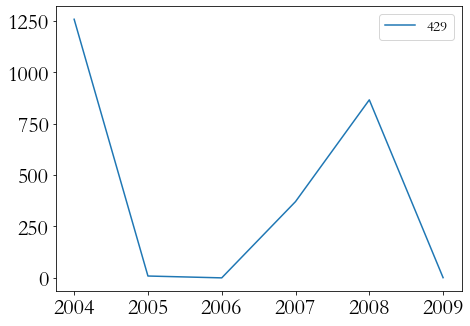

In [284]:
### Check rebel groups individually ----
time_prop = pd.DataFrame()
time_prop["year"] = out_forge_s_code["year"].loc[out_forge_s_code["dyad_new_id"]==dyad_list[251]]
time_prop["best"] = out_forge_s_code["best"].loc[out_forge_s_code["dyad_new_id"]==dyad_list[251]]
time_prop.columns = ["year", "best"]
time_prop = time_prop.sort_values(by="year")
fig = plt.figure(figsize=(7, 5))
ax = plt.axes()
ax.plot(time_prop["year"],time_prop["best"], label = dyad_list[5]);    
ax.legend(prop={'size': 15}, loc= 'upper right')
print(dyad_list[251])
time_prop

In [285]:
### Check variation in outcome ------
print(len(out_forge_s_code)) # 2065
print(out_forge_s_code[out_forge_s_code.active_year == 0].shape[0]) # 996
print(out_forge_s_code[out_forge_s_code.active_year == 1].shape[0]) # 1069

2065
996
1069


In [286]:
### Foundation location --------
# Generate new variable: foundloc_cat, with the following categories
# 1: in country, capital 2: in country, not capital 3: in country, city unknown 
# 4: neighboring country, capital 5: neighboring country, not capital 6: neighboring country, city unknown 
# 7: country not in neighborhood, capital 8: country not in neighborhood, not capital 9: country not in neighborhood, city unknown 
# 10: unknown

# Generate empty variable
NaN = np.nan
out_forge_s_code["foundloc_cat"] = NaN
out_forge_s_code["foundloc_cat_lab"] = NaN
out_forge_s_code[["dyad_new_id", "ccode", "cname", "foundloc", "foundloc_cat", "foundloc_cat_lab"]].head(4)
# assign rebel groups based on Google/Google Maps searches according the information provided in foundloc and cname

,dyad_new_id,ccode,cname,foundloc,foundloc_cat,foundloc_cat_lab
654,406,630,Iran,Mahabad,NaN,NaN
655,406,630,Iran,Mahabad,NaN,NaN
653,406,630,Iran,Mahabad,NaN,NaN
656,406,630,Iran,Mahabad,NaN,NaN


In [287]:
### Iran -----------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 406, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 406, 'foundloc_cat_lab'] = "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", "foundloc_cat", 
                  "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[0]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
654,406,630,Iran,Government of Iran - KDPI,Mahabad,2.0,"in country, not capital"


In [288]:
### Philippines -----------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 411, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 411, 'foundloc_cat_lab'] = "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", "foundloc_cat",
                  "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[1]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1327,411,840,Philippines,Government of Philippines - CPP,"Capas, Luzon",3.0,"in country, city unknown"


In [289]:
### Philippines -----------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 412, 'foundloc_cat'] = 1
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 412, 'foundloc_cat_lab'] = "in country, capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", "foundloc_cat",
                  "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[2]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1350,412,840,Philippines,"Government of Philippines - Military faction (forces of Honasan, Abenina & Zumel)",Manila,1.0,"in country, capital"


In [290]:
### Paraguay -----------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 426, 'foundloc_cat'] = 1
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 426, 'foundloc_cat_lab'] = "in country, capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", "foundloc_cat", 
                  "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[3]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1296,426,150,Paraguay,Government of Paraguay - Military faction (forces of Andres Rodriguez),Asuncion,1.0,"in country, capital"


In [291]:
### Myanmar --------------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 428, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 428, 'foundloc_cat_lab'] = "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", "foundloc_cat", 
                  "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[4]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1152,428,775,Myanmar,Government of Myanmar (Burma) - KNU,Irrawaddy delta region & eastern hills close to thailand,3.0,"in country, city unknown"


In [292]:
### Myanmar --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 429, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 429, 'foundloc_cat_lab'] = "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", "foundloc_cat", 
                  "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[5]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1174,429,775,Myanmar,Government of Myanmar (Burma) - God's Army,"Ka Mar Pa Law,southeaster Karen State",2.0,"in country, not capital"


In [293]:
### Myanmar --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 430, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 430, 'foundloc_cat_lab'] = "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", "foundloc_cat", 
                  "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[6]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1176,430,775,Myanmar,Government of Myanmar (Burma) - DKBA 5,Myawaddy,2.0,"in country, not capital"


In [294]:
### Myanmar --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 434, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 434, 'foundloc_cat_lab'] = "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", "foundloc_cat", 
                  "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[7]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1178,434,775,Myanmar,Government of Myanmar (Burma) - ABSDF,"Wangkha, Thai border",2.0,"in country, not capital"


In [295]:
### Myanmar --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 442, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 442, 'foundloc_cat_lab'] = "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", "foundloc_cat", 
                  "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[8]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
192,442,775,Myanmar,Government of Myanmar (Burma) - RSO,Rakhine State,3.0,"in country, city unknown"


In [296]:
### Myanmar --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 445, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 445, 'foundloc_cat_lab'] = "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", "foundloc_cat", 
                  "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[9]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1183,445,775,Myanmar,Government of Myanmar (Burma) - NMSP,Three Pagodas pass,3.0,"in country, city unknown"


In [297]:
### Myanmar --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 446, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 446, 'foundloc_cat_lab'] = "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", "foundloc_cat", 
                  "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[10]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1186,446,775,Myanmar,Government of Myanmar (Burma) - BMA,Mon State,3.0,"in country, city unknown"


In [298]:
### India --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 451, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 451, 'foundloc_cat_lab'] = "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[11]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
703,451,750,India,Government of India - PWG,Andra Pradesh,3.0,"in country, city unknown"


In [299]:
### India --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 452, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 452, 'foundloc_cat_lab'] = "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[12]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
718,452,750,India,Government of India - MCC,West Bengal,3.0,"in country, city unknown"


In [300]:
### India --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 453, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 453, 'foundloc_cat_lab'] = "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[13]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
728,453,750,India,Government of India - CPI-Maoist,Hyderabad?,2.0,"in country, not capital"


In [301]:
### Yemen --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 459, 'foundloc_cat'] = 10
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 459, 'foundloc_cat_lab'] = "unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[14]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1514,459,678,Yemen,Government of Yemen (North Yemen) - AQAP,NaN,10.0,unknown


In [302]:
### Myanmar --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 461, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 461, 'foundloc_cat_lab'] = "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[15]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1187,461,775,Myanmar,Government of Myanmar (Burma) - KIO,"Lashio/Hsenwi area, northeastern Shan State",2.0,"in country, not capital"


In [303]:
### Guatemala --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 469, 'foundloc_cat'] = 1
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 469, 'foundloc_cat_lab'] = "in country, capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[16]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
668,469,90,Guatemala,Government of Guatemala - URNG,Guatemala City,1.0,"in country, capital"


In [304]:
### Israel --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 474, 'foundloc_cat'] = 10
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 474, 'foundloc_cat_lab'] = "unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[17]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
999,474,666,Israel,Government of Israel - PFLP,NaN,10.0,unknown


In [305]:
### Israel --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 475, 'foundloc_cat'] = 10
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 475, 'foundloc_cat_lab'] = "unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[18]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1015,475,666,Israel,Government of Israel - PFLP-GC,NaN,10.0,unknown


In [306]:
### Israel --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 476, 'foundloc_cat'] = 9
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 476, 'foundloc_cat_lab'] = "country not in neighborhood, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[19]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
573,476,666,Israel,Government of Israel - Fatah,Kuwait,9.0,"country not in neighborhood, city unknown"


In [307]:
### Israel --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 477, 'foundloc_cat'] = 5
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 477, 'foundloc_cat_lab'] = "neighbouring country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[20]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
474,477,666,Israel,Government of Israel - Hamas,Palestinian Territories (Jerusalem?),5.0,"neighbouring country, not capital"


In [308]:
### Israel --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 478, 'foundloc_cat'] = 6
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 478, 'foundloc_cat_lab'] = "neighbouring country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[21]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1027,478,666,Israel,Government of Israel - PIJ,Gaza Strip,6.0,"neighbouring country, city unknown"


In [309]:
### Israel --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 479, 'foundloc_cat'] = 5
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 479, 'foundloc_cat_lab'] = "neighbouring country, not capital" 
# Gaza & Jericho
# recoded as "neighboring country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[22]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1048,479,666,Israel,Government of Israel - PNA,Gaza & Jericho,5.0,"neighbouring country, not capital"


In [310]:
### Israel --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 480, 'foundloc_cat'] = 6
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 480, 'foundloc_cat_lab'] = "neighbouring country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[23]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1057,480,666,Israel,Government of Israel - AMB,West Bank,6.0,"neighbouring country, city unknown"


In [311]:
### India --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 508, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 508, 'foundloc_cat_lab'] = "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[24]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
736,508,750,India,Government of India - NSCN-IM,Nagaland,3.0,"in country, city unknown"


In [312]:
### Myanmar --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 511, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 511, 'foundloc_cat_lab'] = "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[25]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1194,511,775,Myanmar,Government of Myanmar (Burma) - KNPP,"Kwachi, in the mountains south of Mawchi",2.0,"in country, not capital"


In [313]:
### Iraq --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 521, 'foundloc_cat'] = 4
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 521, 'foundloc_cat_lab'] = "neighbouring country, capital"

out_forge_s_code[["dyad_new_id","dyad_name", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[26]].head(1)

,dyad_new_id,dyad_name,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
971,521,Government of Iraq - SCIRI,645,Iraq,Government of Iraq - SCIRI,Tehran,4.0,"neighbouring country, capital"


In [314]:
### Iraq --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 523, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 523, 'foundloc_cat_lab'] = "in country, not capital"
# Halabja, Kurdistan, Iraq
# recoded as "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[27]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
978,523,645,Iraq,Government of Iraq - Ansar al-Islam,"Halabja, Kurdistan, Iraq",2.0,"in country, not capital"


In [315]:
### Iraq --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 524, 'foundloc_cat'] = 8
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 524, 'foundloc_cat_lab'] = "country not in neighborhood, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[28]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
0,524,645,Iraq,Government of Iraq - IS,"Herat, Afghanistan",8.0,"country not in neighborhood, not capital"


In [316]:
### Iraq --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 525, 'foundloc_cat'] = 1
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 525, 'foundloc_cat_lab'] = "in country, capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[29]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
986,525,645,Iraq,Government of Iraq - RJF,Baghdad,1.0,"in country, capital"


In [317]:
### Lebanon --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 532, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 532, 'foundloc_cat_lab'] = "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[30]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1083,532,660,Lebanon,Government of Lebanon - Forces of Michel Aoun,"Baabda, Mount Lebanon governorate, Lebanon",2.0,"in country, not capital"


In [318]:
### Lebanon --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 533, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 533, 'foundloc_cat_lab'] = "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[31]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1085,533,660,Lebanon,Government of Lebanon - Lebanese Forces,"Kaslik, Mount Lebanon, Lebanon",2.0,"in country, not capital"


In [319]:
### Laos --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 537, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 537, 'foundloc_cat_lab'] = "in country, not capital"
# Xiebg Khoung, Luang Prabang, Sayaboury, Houei Sai, Vang Vien, and Borikhane provinces
# "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[32]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1080,537,812,Laos,Government of Laos - LRM,"Xiebg Khoung, Luang Prabang, Sayaboury, Houei Sai, Vang Vien, and Borikhane provinces",2.0,"in country, not capital"


In [320]:
### Myanmar --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 549, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 549, 'foundloc_cat_lab'] = "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[33]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1209,549,775,Myanmar,Government of Myanmar (Burma) - MTA,Shan State,3.0,"in country, city unknown"


In [321]:
### Myanmar --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 550, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 550, 'foundloc_cat_lab'] = "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[34]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1213,550,775,Myanmar,Government of Myanmar (Burma) - RCSS,Shan state,3.0,"in country, city unknown"


In [322]:
### Ethiopia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 558, 'foundloc_cat'] = 10
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 558, 'foundloc_cat_lab'] = "unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[35]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
514,558,530,Ethiopia,Government of Ethiopia - EPRDF,NaN,10.0,unknown


In [323]:
### Ethiopia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 559, 'foundloc_cat'] = 1
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 559, 'foundloc_cat_lab'] = "in country, capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[36]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
517,559,530,Ethiopia,Government of Ethiopia - Military faction (forces of Amsha Desta and Merid Negusie),Asmara,1.0,"in country, capital"


In [324]:
### Nepal --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 562, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 562, 'foundloc_cat_lab'] = "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[37]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1236,562,790,Nepal,Government of Nepal - CPN-M,Rolpa and Rakkum districts,3.0,"in country, city unknown"


In [325]:
### Iraq --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 564, 'foundloc_cat'] = 1
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 564, 'foundloc_cat_lab'] = "in country, capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[38]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
990,564,645,Iraq,Government of Iraq - KDP,Baghdad,1.0,"in country, capital"


In [326]:
### Iraq --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 565, 'foundloc_cat'] = 4
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 565, 'foundloc_cat_lab'] =  "neighbouring country, capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[39]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
918,565,645,Iraq,Government of Iraq - PUK,Damascus,4.0,"neighbouring country, capital"


In [327]:
### Ethiopia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 571, 'foundloc_cat'] = 10
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 571, 'foundloc_cat_lab'] =  "unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[40]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
518,571,530,Ethiopia,Government of Ethiopia - EPLF,NaN,10.0,unknown


In [328]:
### Venezuela --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 575, 'foundloc_cat'] = 1
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 575, 'foundloc_cat_lab'] =  "in country, capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[41]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1513,575,101,Venezuela,Government of Venezuela - Military faction (forces of Hugo Chávez),Caracas,1.0,"in country, capital"


In [329]:
### DRC --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 584, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 584, 'foundloc_cat_lab'] =  "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[42]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
440,584,490,DRC,Government of DR Congo (Zaire) - AFDL,"Lemera, South Kivu",2.0,"in country, not capital"


In [330]:
### DRC --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 585, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 585, 'foundloc_cat_lab'] =  "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[43]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
442,585,490,DRC,Government of DR Congo (Zaire) - MLC,Equateur province,3.0,"in country, city unknown"


In [331]:
### DRC --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 586, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 586, 'foundloc_cat_lab'] = "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[44]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
446,586,490,DRC,Government of DR Congo (Zaire) - RCD,"Goma, Bukavu",2.0,"in country, not capital"


In [332]:
### DRC --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 588, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 588, 'foundloc_cat_lab'] = "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[45]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
450,588,490,DRC,Government of DR Congo (Zaire) - CNDP,"Kitchanga and Kilolirwe, North Kivu",2.0,"in country, not capital"


In [333]:
### Burundi --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 593, 'foundloc_cat'] = 5
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 593, 'foundloc_cat_lab'] ="neighbouring country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[46]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
235,593,516,Burundi,Government of Burundi - Palipehutu,Tabara refugee camp in western Tanzania,5.0,"neighbouring country, not capital"


In [334]:
### Burundi --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 594, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 594, 'foundloc_cat_lab'] = "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[47]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
238,594,516,Burundi,Government of Burundi - CNDD,Kamenge municipality in Bujumbura,2.0,"in country, not capital"


In [335]:
### Burundi --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 595, 'foundloc_cat'] = 6
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 595, 'foundloc_cat_lab'] = "neighbouring country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[48]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
243,595,516,Burundi,Government of Burundi - Frolina,refugee camps in Tanzania,6.0,"neighbouring country, city unknown"


In [336]:
### Burundi --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 596, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 596, 'foundloc_cat_lab'] = "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[49]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
246,596,516,Burundi,Government of Burundi - Palipehutu-FNL,Bujumbura Province,3.0,"in country, city unknown"


In [337]:
### Burundi --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 597, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 597, 'foundloc_cat_lab'] = "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[50]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
258,597,516,Burundi,Government of Burundi - CNDD-FDD,"Cibitoke and the cities of Kamenge, Kinama, Musigati, and Bukavu in Bujumbura; Eastern Congo",2.0,"in country, not capital"


In [338]:
### Chad --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 606, 'foundloc_cat'] = 6
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 606, 'foundloc_cat_lab'] = "neighbouring country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[51]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
318,606,483,Chad,Government of Chad - Islamic Legion,Libya,6.0,"neighbouring country, city unknown"


In [339]:
### Chad --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 607, 'foundloc_cat'] = 1
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 607, 'foundloc_cat_lab'] = "in country, capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[52]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
320,607,483,Chad,Government of Chad - MOSANAT,N'Djamena; Guera region,1.0,"in country, capital"


In [340]:
### Chad --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 608, 'foundloc_cat'] = 6
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 608, 'foundloc_cat_lab'] = "neighbouring country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[53]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1425,608,483,Chad,Government of Chad - Revolutionary Forces of 1 April,"western Darfur, Sudan",6.0,"neighbouring country, city unknown"


In [341]:
### Chad --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 609, 'foundloc_cat'] = 6
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 609, 'foundloc_cat_lab'] = "neighbouring country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[54]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
321,609,483,Chad,Government of Chad - MPS,Sudan,6.0,"neighbouring country, city unknown"


In [342]:
### Chad --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 610, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 610, 'foundloc_cat_lab'] = "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[55]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
322,610,483,Chad,Government of Chad - MDD,Lake Chad region,3.0,"in country, city unknown"


In [343]:
### Chad --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 611, 'foundloc_cat'] = 1
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 611, 'foundloc_cat_lab'] = "in country, capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[56]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
328,611,483,Chad,Government of Chad - Military faction (forces of Maldoum Bada Abbas),N'Djamena Airport,1.0,"in country, capital"


In [344]:
### Chad --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 612, 'foundloc_cat'] = 6
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 612, 'foundloc_cat_lab'] = "neighbouring country, city unknown"
# Libya or Algeria?
# recoded as neighbouring country, city unknown 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[57]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
329,612,483,Chad,Government of Chad - CNR,Libya or Algeria?,6.0,"neighbouring country, city unknown"


In [345]:
### Chad --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 613, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 613, 'foundloc_cat_lab'] = "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[58]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
332,613,483,Chad,Government of Chad - CSNPD,Southeastern Chad,3.0,"in country, city unknown"


In [346]:
### Chad --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 615, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 615, 'foundloc_cat_lab'] = "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[59]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
336,615,483,Chad,Government of Chad - FARF,Logone Oriental and Logone Occidental,3.0,"in country, city unknown"


In [347]:
### Chad --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 616, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 616, 'foundloc_cat_lab'] = "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[60]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
339,616,483,Chad,Government of Chad - MDJT,Tibesti region,3.0,"in country, city unknown"


In [348]:
### Chad --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 617, 'foundloc_cat'] = 6
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 617, 'foundloc_cat_lab'] = "neighbouring country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[61]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
344,617,483,Chad,Government of Chad - FUCD,Darfur?,6.0,"neighbouring country, city unknown"


In [349]:
### Chad --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 618, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 618, 'foundloc_cat_lab'] = "in country, not capital" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[62]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
347,618,483,Chad,Government of Chad - RAFD,"Biltine, Wadi Fira region",2.0,"in country, not capital"


In [350]:
### Chad --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 619, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 619, 'foundloc_cat_lab'] = "in country, not capital" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[63]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
349,619,483,Chad,Government of Chad - UFDD,"Goz Beida, Ouaddaï",2.0,"in country, not capital"


In [351]:
### Chad --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 620, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 620, 'foundloc_cat_lab'] = "in country, not capital" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[64]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
351,620,483,Chad,Government of Chad - AN,Moudeina,2.0,"in country, not capital"


In [352]:
### Chad --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 621, 'foundloc_cat'] = 5
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 621, 'foundloc_cat_lab'] = "neighbouring country, not capital" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[65]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
352,621,483,Chad,Government of Chad - UFR,"Habila, West Darfur, Sudan",5.0,"neighbouring country, not capital"


In [353]:
### Chad --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 622, 'foundloc_cat'] = 6
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 622, 'foundloc_cat_lab'] = "neighbouring country, city unknown" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[66]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
353,622,483,Chad,Government of Chad - FPRN,"Tiss, West Darfur",6.0,"neighbouring country, city unknown"


In [354]:
### Colombia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 623, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 623, 'foundloc_cat_lab'] = "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[67]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
364,623,100,Colombia,Government of Colombia - FARC,"Marquetalia, Tolima",3.0,"in country, city unknown"


In [355]:
### Colombia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 624, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 624, 'foundloc_cat_lab'] = "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[68]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
387,624,100,Colombia,Government of Colombia - ELN,"San Vicente de Chucuri, Santander, Colombia",2.0,"in country, not capital"


In [356]:
### Colombia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 626, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 626, 'foundloc_cat_lab'] = "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[69]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
409,626,100,Colombia,Government of Colombia - EPL,Cordoba & Antioquia,3.0,"in country, city unknown"


In [357]:
### Indonesia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 628, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 628, 'foundloc_cat_lab'] = "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[70]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
884,628,850,Indonesia,Government of Indonesia - OPM,"Ajamaru, West Irian",3.0,"in country, city unknown"


In [358]:
### Peru --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 631, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 631, 'foundloc_cat_lab'] = "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[71]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1297,631,135,Peru,Government of Peru - Sendero Luminoso,Ayacucho,2.0,"in country, not capital"


In [359]:
### Peru --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 632, 'foundloc_cat'] = 1
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 632, 'foundloc_cat_lab'] = "in country, capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[72]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1319,632,135,Peru,Government of Peru - MRTA,Lima,1.0,"in country, capital"


In [360]:
### Nigeria --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 640, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 640, 'foundloc_cat_lab'] = "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[73]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
286,640,475,Nigeria,Government of Nigeria - Jama'atu Ahlis Sunna Lidda'awati wal-Jihad,"Maiduguri, Borno State, Nigeria",2.0,"in country, not capital"


In [361]:
### Cambodia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 644, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 644, 'foundloc_cat_lab'] = "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[74]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
270,644,811,Cambodia,Government of Cambodia (Kampuchea) - KR,"Sre Ambel, in Kampot, currently Koh Kong province",2.0,"in country, not capital"


In [362]:
### Cambodia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 646, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 646, 'foundloc_cat_lab'] = "in country, city unknown"
# KNPNLAF: France, KPNLF: refugee camps on the Cambodian-Thai border
# recode as "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[75]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
280,646,811,Cambodia,Government of Cambodia (Kampuchea) - KPNLF,"KNPNLAF: France, KPNLF: refugee camps on the Cambodian-Thai border",3.0,"in country, city unknown"


In [363]:
### Cambodia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 647, 'foundloc_cat'] = 7
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 647, 'foundloc_cat_lab'] = "country not in neighborhood, capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[76]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
283,647,811,Cambodia,Government of Cambodia (Kampuchea) - FUNCINPEC,"Pyongyang, North Korea",7.0,"country not in neighborhood, capital"


In [364]:
### Guinea --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 654, 'foundloc_cat'] = 6
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 654, 'foundloc_cat_lab'] = "neighbouring country, city unknown"
# Liberia, Guinea
# recode as "neighbouring country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[77]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
676,654,438,Guinea,Government of Guinea - RFDG,"Liberia, Guinea",6.0,"neighbouring country, city unknown"


In [365]:
### Philippines --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 656, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 656, 'foundloc_cat_lab'] = "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[78]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1352,656,840,Philippines,Government of Philippines - MNLF,"Pulau Pangkor, Malaysia",3.0,"in country, city unknown"


In [366]:
### Philippines --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 657, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 657, 'foundloc_cat_lab'] = "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[79]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1360,657,840,Philippines,Government of Philippines - MILF,Mindanao,3.0,"in country, city unknown"


In [367]:
### Philippines --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 658, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 658, 'foundloc_cat_lab'] = "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[80]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1108,658,840,Philippines,Government of Philippines - ASG,"Basilan, Mindanao",3.0,"in country, city unknown"


In [368]:
### Philippines --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 659, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 659, 'foundloc_cat_lab'] = "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[81]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1378,659,840,Philippines,Government of Philippines - MNLF - NM,Jolo and Zamboanga City,2.0,"in country, not capital"


In [369]:
### Sudan --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 663, 'foundloc_cat'] = 5
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 663, 'foundloc_cat_lab'] = "neighbouring country, not capital"
# Bor, Ayod, and Pibor countries in South Sudan
# recode as "neighbouring country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[82]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1426,663,625,Sudan,Government of Sudan - SPLM/A,"Bor, Ayod, and Pibor",5.0,"neighbouring country, not capital"


In [370]:
### Sudan --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 664, 'foundloc_cat'] = 10
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 664, 'foundloc_cat_lab'] = "unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[83]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1442,664,625,Sudan,Government of Sudan - NDA,NaN,10.0,unknown


In [371]:
### Sudan --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 665, 'foundloc_cat'] = 1
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 665, 'foundloc_cat_lab'] = "in country, capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[84]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
356,665,625,Sudan,Government of Sudan - JEM,Khartoum,1.0,"in country, capital"


In [372]:
### Sudan --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 666, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 666, 'foundloc_cat_lab'] = "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[85]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1449,666,625,Sudan,Government of Sudan - SLM/A,Darfur,3.0,"in country, city unknown"


In [373]:
### Sudan --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 667, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 667, 'foundloc_cat_lab'] = "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[86]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1458,667,625,Sudan,Government of Sudan - NRF,Darfur,3.0,"in country, city unknown"


In [374]:
### Sudan --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 668, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 668, 'foundloc_cat_lab'] = "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[87]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1459,668,625,Sudan,Government of Sudan - SLM/A - MM,Haskanita,2.0,"in country, not capital"


In [375]:
### Sudan --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 669, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 669, 'foundloc_cat_lab'] = "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[88]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1463,669,625,Sudan,Government of Sudan - SLFA,Darfur,3.0,"in country, city unknown"


In [376]:
### Sudan --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 670, 'foundloc_cat'] = 6
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 670, 'foundloc_cat_lab'] = "neighbouring country, city unknown" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[89]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1465,670,625,Sudan,Government of Sudan - SSDM/A,"Jonglei state, South Sudan",6.0,"neighbouring country, city unknown"


In [377]:
### Sri Lanka --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 674, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 674, 'foundloc_cat_lab'] = "in country, city unknown" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[90]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1421,674,780,Sri Lanka,Government of Sri Lanka - JVP,"Akmeemana, Galle district",3.0,"in country, city unknown"


In [378]:
### Uganda --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 686, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 686, 'foundloc_cat_lab'] = "in country, city unknown" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[91]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1497,686,500,Uganda,Government of Uganda - UPA,Teso,3.0,"in country, city unknown"


In [379]:
### Uganda --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 688, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 688, 'foundloc_cat_lab'] = "in country, city unknown" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[92]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
302,688,500,Uganda,Government of Uganda - LRA,Gulu district,3.0,"in country, city unknown"


In [380]:
### Uganda --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 689, 'foundloc_cat'] = 6
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 689, 'foundloc_cat_lab'] = "neighbouring country, city unknown" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[93]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
453,689,500,Uganda,Government of Uganda - ADF,Rwenzori; Eastern Zaire,6.0,"neighbouring country, city unknown"


In [381]:
### Uganda --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 690, 'foundloc_cat'] = 10
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 690, 'foundloc_cat_lab'] = "unknown" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[94]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1502,690,500,Uganda,Government of Uganda - WNBF,NaN,10.0,unknown


In [382]:
### Uganda --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 691, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 691, 'foundloc_cat_lab'] = "in country, city unknown" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[95]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1505,691,500,Uganda,Government of Uganda - UNRF II,"Aringa County, Arua",3.0,"in country, city unknown"


In [383]:
### UK --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 692, 'foundloc_cat'] = 4
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 692, 'foundloc_cat_lab'] = "neighbouring country, capital" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[96]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
660,692,200,UK,Government of United Kingdom - PIRA,"Belfast, County Antrim",4.0,"neighbouring country, capital"


In [384]:
### UK --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 693, 'foundloc_cat'] = 5
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 693, 'foundloc_cat_lab'] = "neighbouring country, not capital" 
# Dundalk and Newry
# recode as neighbouring country, capital 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[97]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1508,693,200,UK,Government of United Kingdom - RIRA,Dundalk and Newry,5.0,"neighbouring country, not capital"


In [385]:
### El Salvador --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 697, 'foundloc_cat'] = 7
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 697, 'foundloc_cat_lab'] = "country not in neighborhood, capital" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[98]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
505,697,92,El Salvador,Government of El Salvador - FMLN,"Havana, Cuba",7.0,"country not in neighborhood, capital"


In [386]:
### Bangladesh --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 705, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 705, 'foundloc_cat_lab'] = "in country, city unknown" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[99]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
195,705,771,Bangladesh,Government of Bangladesh - JSS/SB,Chittagong Hill Tracts,3.0,"in country, city unknown"


In [387]:
### Pakistan --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 709, 'foundloc_cat'] = 6
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 709, 'foundloc_cat_lab'] = "neighbouring country, city unknown" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[100]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1266,709,770,Pakistan,Government of Pakistan - BLA,Afghanistan,6.0,"neighbouring country, city unknown"


In [388]:
### Pakistan --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 710, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 710, 'foundloc_cat_lab'] = "in country, city unknown" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[101]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1274,710,770,Pakistan,Government of Pakistan - Baloch Ittehad,Baluchistan,3.0,"in country, city unknown"


In [389]:
### Pakistan --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 711, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 711, 'foundloc_cat_lab'] = "in country, city unknown" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[102]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1275,711,770,Pakistan,Government of Pakistan - BRA,Baluchistan,3.0,"in country, city unknown"


In [390]:
### Eritrea --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 712, 'foundloc_cat'] = 6
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 712, 'foundloc_cat_lab'] = "neighbouring country, city unknown" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[103]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
509,712,531,Eritrea,Government of Eritrea - EIJM - AS,Sudan,6.0,"neighbouring country, city unknown"


In [391]:
### Angola --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 714, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 714, 'foundloc_cat_lab'] = "in country, not capital" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[104]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
108,714,540,Angola,Government of Angola - UNITA,"Muangai, Moxico, Angola",2.0,"in country, not capital"


In [392]:
### Ethiopia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 718, 'foundloc_cat'] = 6
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 718, 'foundloc_cat_lab'] = "neighbouring country, city unknown" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[105]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
521,718,530,Ethiopia,Government of Ethiopia - AIAI,Somalia,6.0,"neighbouring country, city unknown"


In [393]:
### Ethiopia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 719, 'foundloc_cat'] = 4
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 719, 'foundloc_cat_lab'] = "neighbouring country, capital" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[106]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
525,719,530,Ethiopia,Government of Ethiopia - ONLF,Mogadishu?,4.0,"neighbouring country, capital"


In [394]:
### Indonesia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 720, 'foundloc_cat'] = 4
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 720, 'foundloc_cat_lab'] = "neighbouring country, capital" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[107]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
893,720,850,Indonesia,Government of Indonesia - CNRT,Dili,4.0,"neighbouring country, capital"


In [395]:
### Morocco --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 721, 'foundloc_cat'] = 6
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 721, 'foundloc_cat_lab'] =  "neighbouring country, city unknown" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[108]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1144,721,600,Morocco,Government of Morocco - POLISARIO,"Al-Khanga, Saqiyah al’Hamra, Western Sahara",6.0,"neighbouring country, city unknown"


In [396]:
### Mozambique --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 722, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 722, 'foundloc_cat_lab'] = "in country, city unknown" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[109]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1146,722,541,Mozambique,Government of Mozambique - Renamo,"Sofala province, Ndau, Mozambique",3.0,"in country, city unknown"


In [397]:
### Afghanistan --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 724, 'foundloc_cat'] = 1
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 724, 'foundloc_cat_lab'] = "in country, capital" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[110]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
8,724,700,Afghanistan,Government of Afghanistan - Jam'iyyat-i Islami-yi Afghanistan,Kabul,1.0,"in country, capital"


In [398]:
### Afghanistan --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 726, 'foundloc_cat'] = 6
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 726, 'foundloc_cat_lab'] = "neighbouring country, city unknown" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[111]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
13,726,700,Afghanistan,Government of Afghanistan - Hizb-i Islami-yi Afghanistan,Pakistan,6.0,"neighbouring country, city unknown"


In [399]:
### Afghanistan --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 727, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 727, 'foundloc_cat_lab'] = "in country, not capital" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[112]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
27,727,700,Afghanistan,Government of Afghanistan - Hizb-i Islami-yi Afghanistan - Khalis faction,"Khugiani, Afghanistan",2.0,"in country, not capital"


In [400]:
### Afghanistan --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 729, 'foundloc_cat'] = 10
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 729, 'foundloc_cat_lab'] = "unknown" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[113]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
31,729,700,Afghanistan,Government of Afghanistan - Mahaz-i Milli-yi Islami-yi Afghanistan,NaN,10.0,unknown


In [401]:
### Afghanistan --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 732, 'foundloc_cat'] = 4
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 732, 'foundloc_cat_lab'] = "neighbouring country, capital" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[114]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
32,732,700,Afghanistan,Government of Afghanistan - Hizb-i Wahdat,"Tehran, Iran",4.0,"neighbouring country, capital"


In [402]:
### Afghanistan --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 733, 'foundloc_cat'] = 1
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 733, 'foundloc_cat_lab'] = "in country, capital" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", 
                  "foundloc", "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[115]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
39,733,700,Afghanistan,Government of Afghanistan - Military faction (forces of Shahnawaz Tanay),Kabul,1.0,"in country, capital"


In [403]:
### Afghanistan --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 734, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 734, 'foundloc_cat_lab'] = "in country, not capital" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[116]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
40,734,700,Afghanistan,Government of Afghanistan - Junbish-i Milli-yi Islami,Mazar-e-Sharif,2.0,"in country, not capital"


In [404]:
### Afghanistan --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 735, 'foundloc_cat'] = 10
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 735, 'foundloc_cat_lab'] = "unknown" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[117]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
43,735,700,Afghanistan,Government of Afghanistan - Taleban,NaN,10.0,unknown


In [405]:
### India --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 739, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 739, 'foundloc_cat_lab'] = "in country, city unknown" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[118]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
753,739,750,India,Government of India - ATTF,Tripura,3.0,"in country, city unknown"


In [406]:
### India --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 740, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 740, 'foundloc_cat_lab'] = "in country, city unknown" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[119]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
767,740,750,India,Government of India - NLFT,Tripura,3.0,"in country, city unknown"


In [407]:
### Nicaragua --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 742, 'foundloc_cat'] = 10
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 742, 'foundloc_cat_lab'] = "unknown" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[120]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1248,742,93,Nicaragua,Government of Nicaragua - Contras,NaN,10.0,unknown


In [408]:
### Somalia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 744, 'foundloc_cat'] = 7
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 744, 'foundloc_cat_lab'] = "country not in neighborhood, capital" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", "foundloc_cat", 
                  "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[121]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
429,744,520,Somalia,Government of Somalia - SNM,London,7.0,"country not in neighborhood, capital"


In [409]:
### Somalia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 745, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 745, 'foundloc_cat_lab'] = "in country, not capital" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[122]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1406,745,520,Somalia,Government of Somalia - SPM,Hargeisa,2.0,"in country, not capital"


In [410]:
### Somalia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 746, 'foundloc_cat'] = 7
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 746, 'foundloc_cat_lab'] = "country not in neighborhood, capital" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[123]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1409,746,520,Somalia,Government of Somalia - USC/SSA,Rome,7.0,"country not in neighborhood, capital"


In [411]:
### Somalia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 747, 'foundloc_cat'] = 10
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 747, 'foundloc_cat_lab'] = "unknown" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[124]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1411,747,520,Somalia,Government of Somalia - USC/SNA,NaN,10.0,unknown


In [412]:
### Somalia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 748, 'foundloc_cat'] = 4
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 748, 'foundloc_cat_lab'] = "neighbouring country, capital" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[125]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1417,748,520,Somalia,Government of Somalia - SRRC,Addis Ababa,4.0,"neighbouring country, capital"


In [413]:
### Somalia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 749, 'foundloc_cat'] = 1
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 749, 'foundloc_cat_lab'] = "in country, capital" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[126]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1074,749,520,Somalia,Government of Somalia - ARS/UIC,Mogadishu,1.0,"in country, capital"


In [414]:
### Somalia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 750, 'foundloc_cat'] = 1
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 750, 'foundloc_cat_lab'] = "in country, capital" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[127]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
543,750,520,Somalia,Government of Somalia - Al-Shabaab,Mogadishu,1.0,"in country, capital"


In [415]:
### Somalia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 752, 'foundloc_cat'] = 10
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 752, 'foundloc_cat_lab'] = "unknown" 

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[128]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1419,752,520,Somalia,Government of Somalia - Hizbul Islam,NaN,10.0,unknown


In [416]:
### Iran --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 753, 'foundloc_cat'] = 1
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 753, 'foundloc_cat_lab'] =  "in country, capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[129]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
923,753,630,Iran,Government of Iran - MEK,Tehran,1.0,"in country, capital"


In [417]:
### Iran --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 754, 'foundloc_cat'] = 6
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 754, 'foundloc_cat_lab'] =  "neighbouring country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[130]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
933,754,630,Iran,Government of Iran - PJAK,Iraqi Kurdistan,6.0,"neighbouring country, city unknown"


In [418]:
### Iran --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 755, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 755, 'foundloc_cat_lab'] =  "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[131]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
940,755,630,Iran,Government of Iran - Jondullah,Sistan-Balochistan province,3.0,"in country, city unknown"


In [419]:
### Liberia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 759, 'foundloc_cat'] = 6
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 759, 'foundloc_cat_lab'] =  "neighbouring country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[132]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1063,759,450,Liberia,Government of Liberia - NPFL,Cote d'Ivoire,6.0,"neighbouring country, city unknown"


In [420]:
### Liberia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 760, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 760, 'foundloc_cat_lab'] =  "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[133]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1087,760,450,Liberia,Government of Liberia - INPFL,Nimba County,3.0,"in country, city unknown"


In [421]:
### Liberia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 761, 'foundloc_cat'] = 4
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 761, 'foundloc_cat_lab'] = "neighbouring country, capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[134]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1088,761,450,Liberia,Government of Liberia - LURD,"Freetown, Sierra Leone",4.0,"neighbouring country, capital"


In [422]:
### Liberia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 762, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 762, 'foundloc_cat_lab'] =  "in country, city unknown"
# Southern Liberia, Cote d'Ivoire
# recoded as "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[135]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1092,762,450,Liberia,Government of Liberia - MODEL,"Southern Liberia, Cote d'Ivoire",3.0,"in country, city unknown"


In [423]:
### Spain --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 763, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 763, 'foundloc_cat_lab'] =  "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[136]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
590,763,230,Spain,Government of Spain - ETA,Basque region,3.0,"in country, city unknown"


In [424]:
### India --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 768, 'foundloc_cat'] = 10
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 768, 'foundloc_cat_lab'] =  "unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[137]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
785,768,750,India,Government of India - PLA,NaN,10.0,unknown


In [425]:
### India --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 769, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 769, 'foundloc_cat_lab'] =  "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[138]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
803,769,750,India,Government of India - UNLF,Manipur,3.0,"in country, city unknown"


In [426]:
### India --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 770, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 770, 'foundloc_cat_lab'] =  "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[139]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
820,770,750,India,Government of India - KCP,Manipur,3.0,"in country, city unknown"


In [427]:
### India --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 771, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 771, 'foundloc_cat_lab'] =  "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[140]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
829,771,750,India,Government of India - PREPAK,Manipur,3.0,"in country, city unknown"


In [428]:
### Sri Lanka --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 776, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 776, 'foundloc_cat_lab'] =  "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[141]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
608,776,780,Sri Lanka,Government of Sri Lanka - LTTE,Wanni region,3.0,"in country, city unknown"


In [429]:
### Sri Lanka --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 778, 'foundloc_cat'] = 5
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 778, 'foundloc_cat_lab'] =  "neighbouring country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[142]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1423,778,780,Sri Lanka,Government of Sri Lanka - EPRLF,Kumbakonam town in Tamil Nadu,5.0,"neighbouring country, not capital"


In [430]:
### Turkey --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 781, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 781, 'foundloc_cat_lab'] =  "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[143]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
964,781,640,Turkey,Government of Turkey - PKK,Dyarbakir,2.0,"in country, not capital"


In [431]:
### Comoros --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 789, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 789, 'foundloc_cat_lab'] =  "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[144]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
411,789,581,Comoros,Government of Comoros - Presidential guard,Comoros,3.0,"in country, city unknown"


In [432]:
### Ethiopia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 791, 'foundloc_cat'] = 10
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 791, 'foundloc_cat_lab'] =  "unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[145]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
546,791,530,Ethiopia,Government of Ethiopia - ARDUF,NaN,10.0,unknown


In [433]:
### India --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 793, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 793, 'foundloc_cat_lab'] =  "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[146]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
840,793,750,India,Government of India - ULFA,Rong Ghor in Sibsagar,2.0,"in country, not capital"


In [434]:
### Indonesia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 794, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 794, 'foundloc_cat_lab'] =  "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[147]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
901,794,850,Indonesia,Government of Indonesia - GAM,Pase Lhok,2.0,"in country, not capital"


In [435]:
### Panama --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 795, 'foundloc_cat'] = 1
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 795, 'foundloc_cat_lab'] =  "in country, capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[148]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1286,795,95,Panama,Government of Panama - Military faction (forces of Moisés Giroldi),Panama City,1.0,"in country, capital"


In [436]:
### Papua New Guinea --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 797, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 797, 'foundloc_cat_lab'] =  "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[149]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1287,797,910,Papua New Guinea,Government of Papua New Guinea - BRA,Kongara mountains,3.0,"in country, city unknown"


In [437]:
### Romania --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 798, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 798, 'foundloc_cat_lab'] =  "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[150]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1381,798,360,Romania,Government of Romania - NSF,Timisoara,2.0,"in country, not capital"


In [438]:
### Mali --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 800, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 800, 'foundloc_cat_lab'] =  "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[151]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1127,800,432,Mali,Government of Mali - MPA,"Timbuktu, Kidal, Gao",2.0,"in country, not capital"


In [439]:
### Mali --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 801, 'foundloc_cat'] = 10
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 801, 'foundloc_cat_lab'] =  "unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[152]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1128,801,432,Mali,Government of Mali - FIAA,NaN,10.0,unknown


In [440]:
### Mali --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 802, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 802, 'foundloc_cat_lab'] =  "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[153]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1131,802,432,Mali,Government of Mali - ATNMC,Kidal region,3.0,"in country, city unknown"


In [441]:
### Niger --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 803, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 803, 'foundloc_cat_lab'] =  "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[154]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1250,803,436,Niger,Government of Niger - CRA,"Ténéré, Northern Niger",3.0,"in country, city unknown"


In [442]:
### Rwanda --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 804, 'foundloc_cat'] = 6
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 804, 'foundloc_cat_lab'] =  "neighbouring country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[155]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1392,804,517,Rwanda,Government of Rwanda - FPR,Uganda,6.0,"neighbouring country, city unknown"


In [443]:
### Rwanda --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 805, 'foundloc_cat'] = 6
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 805, 'foundloc_cat_lab'] =  "neighbouring country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[156]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
468,805,517,Rwanda,Government of Rwanda - ALiR,"Refugee camps, North Kivu, Zaire",6.0,"neighbouring country, city unknown"


In [444]:
### Senegal --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 806, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 806, 'foundloc_cat_lab'] =  "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[157]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
680,806,433,Senegal,Government of Senegal - MFDC,"Ziguinchor, Casamance",2.0,"in country, not capital"


In [445]:
### USSR --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 807, 'foundloc_cat'] = 7
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 807, 'foundloc_cat_lab'] =  "country not in neighborhood, capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[158]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1382,807,365,USSR,Government of Russia (Soviet Union) - Republic of Armenia,Yerevan,7.0,"country not in neighborhood, capital"


In [446]:
### USSR --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 808, 'foundloc_cat'] = 4
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 808, 'foundloc_cat_lab'] =  "neighbouring country, capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[159]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1384,808,365,USSR,Government of Russia (Soviet Union) - APF,Baku,4.0,"neighbouring country, capital"


In [447]:
### Trinidad and Tobago --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 809, 'foundloc_cat'] = 1
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 809, 'foundloc_cat_lab'] =  "in country, capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[160]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1483,809,52,Trinidad and Tobago,Government of Trinidad and Tobago - Jamaat al-Muslimeen,Port of Spain,1.0,"in country, capital"


In [448]:
### Djibouti --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 810, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 810, 'foundloc_cat_lab'] =  "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[161]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
432,810,522,Djibouti,Government of Djibouti - FRUD,Balho,2.0,"in country, not capital"


In [449]:
### Djibouti --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 811, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 811, 'foundloc_cat_lab'] =  "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[162]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
437,811,522,Djibouti,Government of Djibouti - FRUD-C,Northern Djibouti,3.0,"in country, city unknown"


In [450]:
### Georgia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 812, 'foundloc_cat'] = 1
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 812, 'foundloc_cat_lab'] =  "in country, capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[163]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
628,812,372,Georgia,Government of Georgia - National Guard and Mkhedrioni,Tbilisi,1.0,"in country, capital"


In [451]:
### Georgia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 813, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 813, 'foundloc_cat_lab'] =  "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[164]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
630,813,372,Georgia,Government of Georgia - Zviadists,Mingrelia,3.0,"in country, city unknown"


In [452]:
### Haiti --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 814, 'foundloc_cat'] = 10
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 814, 'foundloc_cat_lab'] =  "unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[165]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
699,814,41,Haiti,Government of Haiti - Military faction (forces of Himmler Rebu and Guy Francois),NaN,10.0,unknown


In [453]:
### Haiti --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 815, 'foundloc_cat'] = 10
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 815, 'foundloc_cat_lab'] =  "unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[166]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
700,815,41,Haiti,Government of Haiti - Military faction (forces of Raol Cédras),NaN,10.0,unknown


In [454]:
### Haiti --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 816, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 816, 'foundloc_cat_lab'] =  "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[167]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
701,816,41,Haiti,Government of Haiti - FLRN,Gonaives,2.0,"in country, not capital"


In [455]:
### Haiti --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 817, 'foundloc_cat'] = 1
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 817, 'foundloc_cat_lab'] =  "in country, capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[168]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
702,817,41,Haiti,Government of Haiti - OP Lavalas,Port au Prince,1.0,"in country, capital"


In [456]:
### Sierra Leone --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 818, 'foundloc_cat'] = 6
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 818, 'foundloc_cat_lab'] =  "neighbouring country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[169]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1094,818,451,Sierra Leone,Government of Sierra Leone - RUF,Liberia,6.0,"neighbouring country, city unknown"


In [457]:
### Sierra Leone --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 819, 'foundloc_cat'] = 1
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 819, 'foundloc_cat_lab'] =  "in country, capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[170]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1400,819,451,Sierra Leone,Government of Sierra Leone - AFRC,Freetown,1.0,"in country, capital"


In [458]:
### Sierra Leone --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 820, 'foundloc_cat'] = 10
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 820, 'foundloc_cat_lab'] =  "unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[171]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1403,820,451,Sierra Leone,Government of Sierra Leone - Kamajors,NaN,10.0,unknown


In [459]:
### Sierra Leone --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 821, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 821, 'foundloc_cat_lab'] =  "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[172]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1405,821,451,Sierra Leone,Government of Sierra Leone - WSB,"Okra Hills, Magbeni & Gberi Bana",3.0,"in country, city unknown"


In [460]:
### Turkey --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 822, 'foundloc_cat'] = 1
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 822, 'foundloc_cat_lab'] =  "in country, capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[173]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1484,822,640,Turkey,Government of Turkey - DHKP-C,Istanbul,1.0,"in country, capital"


In [461]:
### Turkey --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 823, 'foundloc_cat'] = 10
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 823, 'foundloc_cat_lab'] =  "unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[174]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1496,823,640,Turkey,Government of Turkey - MKP,NaN,10.0,unknown


In [462]:
### Yugoslavia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 824, 'foundloc_cat'] = 10
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 824, 'foundloc_cat_lab'] =  "unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[175]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1397,824,345,Yugoslavia,Government of Serbia (Yugoslavia) - Republic of Slovenia,NaN,10.0,unknown


In [463]:
### Yugoslavia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 826, 'foundloc_cat'] = 10
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 826, 'foundloc_cat_lab'] =  "unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[176]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1398,826,345,Yugoslavia,Government of Serbia (Yugoslavia) - Republic of Croatia,NaN,10.0,unknown


In [464]:
### Algeria --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 827, 'foundloc_cat'] = 10
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 827, 'foundloc_cat_lab'] =  "unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[177]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
71,827,615,Algeria,Government of Algeria - Takfir wa'l Hijra,NaN,10.0,unknown


In [465]:
### Algeria --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 828, 'foundloc_cat'] = 1
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 828, 'foundloc_cat_lab'] =  "in country, capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[178]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
74,828,615,Algeria,Government of Algeria - AIS,Algiers,1.0,"in country, capital"


In [466]:
### Algeria --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 829, 'foundloc_cat'] = 1
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 829, 'foundloc_cat_lab'] =  "in country, capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[179]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
81,829,615,Algeria,Government of Algeria - GIA,Algiers,1.0,"in country, capital"


In [467]:
### Algeria --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 830, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 830, 'foundloc_cat_lab'] =  "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[180]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
94,830,615,Algeria,Government of Algeria - AQIM,Algeria,3.0,"in country, city unknown"


In [468]:
### Angola --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 831, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 831, 'foundloc_cat_lab'] =  "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[181]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
122,831,540,Angola,Government of Angola - FLEC-R,Cabinda,2.0,"in country, not capital"


In [469]:
### Angola --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 832, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 832, 'foundloc_cat_lab'] =  "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[182]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
131,832,540,Angola,Government of Angola - FLEC-FAC,Cabinda,2.0,"in country, not capital"


In [470]:
### Azerbaijan --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 833, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 833, 'foundloc_cat_lab'] =  "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[183]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
174,833,373,Azerbaijan,Government of Azerbaijan - Republic of Artsakh,Stepanakert,2.0,"in country, not capital"


In [471]:
### Bosnia and Herzegovina --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 835, 'foundloc_cat'] = 1
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 835, 'foundloc_cat_lab'] =  "in country, capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[184]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
223,835,346,Bosnia and Herzegovina,Government of Bosnia-Herzegovina - Serbian Republic of Bosnia-Herzegovina,Sarajevo,1.0,"in country, capital"


In [472]:
### Croatia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 837, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 837, 'foundloc_cat_lab'] =  "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[185]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
227,837,344,Croatia,Government of Croatia - Serbian Republic of Krajina,Knin,2.0,"in country, not capital"


In [473]:
### Egypt --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 838, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 838, 'foundloc_cat_lab'] =  "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[186]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
496,838,651,Egypt,Government of Egypt - al-Gama'a al-Islamiyya,Southern Egypt,3.0,"in country, city unknown"


In [474]:
### Georgia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 839, 'foundloc_cat'] = 10
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 839, 'foundloc_cat_lab'] =  "unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[187]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
632,839,372,Georgia,Government of Georgia - Republic of Abkhazia,NaN,10.0,unknown


In [475]:
### Georgia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 840, 'foundloc_cat'] = 10
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 840, 'foundloc_cat_lab'] =  "unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[188]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
636,840,372,Georgia,Government of Georgia - Republic of South Ossetia,NaN,10.0,unknown


In [476]:
### Moldova --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 841, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 841, 'foundloc_cat_lab'] =  "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[189]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1143,841,359,Moldova,Government of Moldova - PMR,Tiraspol,2.0,"in country, not capital"


In [477]:
### Tajikistan --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 842, 'foundloc_cat'] = 10
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 842, 'foundloc_cat_lab'] =  "unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[190]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
57,842,702,Tajikistan,Government of Tajikistan - UTO,NaN,10.0,unknown


In [478]:
### Azerbaijan --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 844, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 844, 'foundloc_cat_lab'] =  "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[191]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
187,844,373,Azerbaijan,Government of Azerbaijan - Military faction (forces of Suret Husseinov),Gandja,2.0,"in country, not capital"


In [479]:
### Azerbaijan --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 845, 'foundloc_cat'] = 1
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 845, 'foundloc_cat_lab'] =  "in country, capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[192]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
189,845,373,Azerbaijan,Government of Azerbaijan - OPON Forces,Baku,1.0,"in country, capital"


In [480]:
### Bosnia and Herzegovina --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 846, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 846, 'foundloc_cat_lab'] =  "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[193]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
230,846,346,Bosnia and Herzegovina,Government of Bosnia-Herzegovina - Autonomous Province of Western Bosnia,Velika Kladusa,2.0,"in country, not capital"


In [481]:
### Bosnia and Herzegovina --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 848, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 848, 'foundloc_cat_lab'] =  "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[194]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
233,848,346,Bosnia and Herzegovina,Government of Bosnia-Herzegovina - Croatian Republic of Bosnia-Herzegovina,Mostar,2.0,"in country, not capital"


In [482]:
### Russia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 849, 'foundloc_cat'] = 1
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 849, 'foundloc_cat_lab'] =  "in country, capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[195]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1385,849,365,Russia,Government of Russia (Soviet Union) - Parliamentary Forces,Moscow,1.0,"in country, capital"


In [483]:
### Mexico --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 850, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 850, 'foundloc_cat_lab'] =  "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[196]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1137,850,70,Mexico,Government of Mexico - EZLN,"Lancadon rainforest, Chiapas",3.0,"in country, city unknown"


In [484]:
### Mexico --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 851, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 851, 'foundloc_cat_lab'] = "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[197]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1140,851,70,Mexico,Government of Mexico - EPR,"Aguas Blancas, Guerrero, Mexico",2.0,"in country, not capital"


In [485]:
### Russia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 852, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 852, 'foundloc_cat_lab'] =  "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[198]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
641,852,365,Russia,Government of Russia (Soviet Union) - Chechen Republic of Ichkeria,Grozny,2.0,"in country, not capital"


In [486]:
### Yemen --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 853, 'foundloc_cat'] = 10
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 853, 'foundloc_cat_lab'] =  "unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[199]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1517,853,678,Yemen,Government of Yemen (North Yemen) - Democratic Republic of Yemen,NaN,10.0,unknown


In [487]:
### Pakistan --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 855, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 855, 'foundloc_cat_lab'] =  "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[200]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1280,855,770,Pakistan,Government of Pakistan - MQM,Karachi,2.0,"in country, not capital"


In [488]:
### Pakistan --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 857, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 857, 'foundloc_cat_lab'] =  "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[201]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
63,857,770,Pakistan,Government of Pakistan - TTP,South Waziristan,3.0,"in country, city unknown"


In [489]:
### Niger --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 859, 'foundloc_cat'] = 6
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 859, 'foundloc_cat_lab'] =  "neighbouring country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[202]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1252,859,436,Niger,Government of Niger - FDR,Lake Chad region,6.0,"neighbouring country, city unknown"


In [490]:
### Comoros --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 860, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 860, 'foundloc_cat_lab'] =  "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[203]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
412,860,581,Comoros,Government of Comoros - MPA/Republic of Anjouan,"Mutsamudu, Anjouan",2.0,"in country, not capital"


In [491]:
### Congo-Brazzaville --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 861, 'foundloc_cat'] = 1
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 861, 'foundloc_cat_lab'] =  "in country, capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[204]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
413,861,484,Congo-Brazzaville,Government of Congo - Ninjas,"Brazzaville, Bacongo and Pool",1.0,"in country, capital"


In [492]:
### Congo-Brazzaville --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 862, 'foundloc_cat'] = 1
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 862, 'foundloc_cat_lab'] =  "in country, capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[205]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
416,862,484,Congo-Brazzaville,Government of Congo - Cobras,"Brazzaville (Northern), Mpila, Cuvette, Talangai, Ouenze",1.0,"in country, capital"


In [493]:
### Congo-Brazzaville --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 863, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 863, 'foundloc_cat_lab'] =  "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[206]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
419,863,484,Congo-Brazzaville,Government of Congo - Cocoyes,"Aubeville, Bouenza Region Lekoumou, Niari",2.0,"in country, not capital"


In [494]:
### Congo-Brazzaville --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 864, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 864, 'foundloc_cat_lab'] =  "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[207]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
422,864,484,Congo-Brazzaville,Government of Congo - Ntsiloulous,Pool,3.0,"in country, city unknown"


In [495]:
### Guinea-Bissau --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 866, 'foundloc_cat'] = 10
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 866, 'foundloc_cat_lab'] =  "unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[208]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
697,866,404,Guinea-Bissau,"Government of Guinea-Bissau - Military Junta for the Consolidation of Democracy, Peace and Justice",NaN,10.0,unknown


In [496]:
### Lesotho --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 867, 'foundloc_cat'] = 1
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 867, 'foundloc_cat_lab'] =  "in country, capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[209]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1086,867,570,Lesotho,Government of Lesotho - Military faction (Lesotho),Maseru,1.0,"in country, capital"


In [497]:
### Yugoslavia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 868, 'foundloc_cat'] = 6
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 868, 'foundloc_cat_lab'] =  "neighbouring country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[210]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
68,868,345,Yugoslavia,Government of Serbia (Yugoslavia) - UCK,Drenica region,6.0,"neighbouring country, city unknown"


In [498]:
### Ethiopia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 869, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 869, 'foundloc_cat_lab'] =  "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[211]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
547,869,530,Ethiopia,Government of Ethiopia - OLF,Oromiya state,3.0,"in country, city unknown"


In [499]:
### Russia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 870, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 870, 'foundloc_cat_lab'] =  "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[212]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1386,870,365,Russia,Government of Russia (Soviet Union) - Wahhabi movement of the Buinaksk district,"Kadar, Buinaksk region, Dagestan",2.0,"in country, not capital"


In [500]:
### Uzbekistan --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 871, 'foundloc_cat'] = 4
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 871, 'foundloc_cat_lab'] =  "neighbouring country, capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[213]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1077,871,704,Uzbekistan,Government of Uzbekistan - IMU,"Kabul, Afghanistan",4.0,"neighbouring country, capital"


In [501]:
### Uzbekistan --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 872, 'foundloc_cat'] = 10
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 872, 'foundloc_cat_lab'] =  "unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[214]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1511,872,704,Uzbekistan,Government of Uzbekistan - JIG,NaN,10.0,unknown


In [502]:
### Central African Republic --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 873, 'foundloc_cat'] = 1
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 873, 'foundloc_cat_lab'] =  "in country, capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[215]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
310,873,482,Central African Republic,Government of Central African Republic - Military faction (forces of André Kolingba),Bangui,1.0,"in country, capital"


In [503]:
### Central African Republic --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 874, 'foundloc_cat'] = 1
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 874, 'foundloc_cat_lab'] =  "in country, capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[216]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
311,874,482,Central African Republic,Government of Central African Republic - Forces of Francois Bozize,Bangui,1.0,"in country, capital"


In [504]:
### Central African Republic --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 875, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 875, 'foundloc_cat_lab'] =  "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[217]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
313,875,482,Central African Republic,Government of Central African Republic - Seleka,Vakaga and Baningui-Bangoran provinces,3.0,"in country, city unknown"


In [505]:
### Central African Republic --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 876, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 876, 'foundloc_cat_lab'] =  "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[218]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
315,876,482,Central African Republic,Government of Central African Republic - CPJP,N’délé,2.0,"in country, not capital"


In [506]:
### Macedonia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 877, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 877, 'foundloc_cat_lab'] =  "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[219]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1106,877,343,Macedonia,Government of North Macedonia - UCK,Tanusevci,2.0,"in country, not capital"


In [507]:
### Ivory Coast --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 879, 'foundloc_cat'] = 4
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 879, 'foundloc_cat_lab'] =  "neighbouring country, capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[220]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1064,879,437,Ivory Coast,Government of Ivory Coast - MPCI,"Ouagadougou, Burkina Faso",4.0,"neighbouring country, capital"


In [508]:
### Ivory Coast --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 880, 'foundloc_cat'] = 6
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 880, 'foundloc_cat_lab'] =  "neighbouring country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[221]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1065,880,437,Ivory Coast,Government of Ivory Coast - MPIGO,Liberia,6.0,"neighbouring country, city unknown"


In [509]:
### Ivory Coast --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 881, 'foundloc_cat'] = 6
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 881, 'foundloc_cat_lab'] =  "neighbouring country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[222]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1067,881,437,Ivory Coast,Government of Ivory Coast - MJP,Liberia,6.0,"neighbouring country, city unknown"


In [510]:
### Ivory Coast --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 882, 'foundloc_cat'] = 10
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 882, 'foundloc_cat_lab'] =  "unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[223]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1069,882,437,Ivory Coast,Government of Ivory Coast - FRCI,NaN,10.0,unknown


In [511]:
### India --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 884, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 884, 'foundloc_cat_lab'] =  "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[224]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
862,884,750,India,Government of India - ABSU,Kokrajhar,2.0,"in country, not capital"


In [512]:
### India --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 885, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 885, 'foundloc_cat_lab'] =  "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[225]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
205,885,750,India,Government of India - NDFB,Bodoland,3.0,"in country, city unknown"


In [513]:
### India --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 886, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 886, 'foundloc_cat_lab'] =  "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[226]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
864,886,750,India,Government of India - NDFB - RD,Assam,3.0,"in country, city unknown"


In [514]:
### Myanmar --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 887, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 887, 'foundloc_cat_lab'] =  "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[227]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1228,887,775,Myanmar,Government of Myanmar (Burma) - UWSA,Wa region,3.0,"in country, city unknown"


In [515]:
### Thailand --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 888, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 888, 'foundloc_cat_lab'] =  "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[228]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1474,888,800,Thailand,Government of Thailand - Patani insurgents,Patani,2.0,"in country, not capital"


In [516]:
### Nigeria --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 889, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 889, 'foundloc_cat_lab'] =  "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[229]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1262,889,475,Nigeria,Government of Nigeria - Ahlul Sunnah Jamaa,"Maiduguri, Northeastern Nigeria",2.0,"in country, not capital"


In [517]:
### Nigeria --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 890, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 890, 'foundloc_cat_lab'] =  "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[230]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1264,890,475,Nigeria,Government of Nigeria - NDPVF,Port Harcourt,2.0,"in country, not capital"


In [518]:
### Israel --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 891, 'foundloc_cat'] = 6
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 891, 'foundloc_cat_lab'] =  "neighbouring country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[231]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
159,891,666,Israel,Government of Israel - Hezbollah,Southern Lebanon,6.0,"neighbouring country, city unknown"


In [519]:
### DRC --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 894, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 894, 'foundloc_cat_lab'] =  "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[232]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
469,894,490,DRC,Government of DR Congo (Zaire) - BDK,Bas Congo,3.0,"in country, city unknown"


In [520]:
### Niger --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 895, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 895, 'foundloc_cat_lab'] =  "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[233]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1255,895,436,Niger,Government of Niger - FLAA,Aïr and Azawad region,3.0,"in country, city unknown"


In [521]:
### Niger --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 896, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 896, 'foundloc_cat_lab'] =  "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[234]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1258,896,436,Niger,Government of Niger - UFRA,Northern & eastern Niger,3.0,"in country, city unknown"


In [522]:
### Niger --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 897, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 897, 'foundloc_cat_lab'] =  "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[235]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1260,897,436,Niger,Government of Niger - MNJ,"Aïr, Kawar, Manga, and Azawak regions of Niger",3.0,"in country, city unknown"


In [523]:
### Russia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 899, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 899, 'foundloc_cat_lab'] =  "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[236]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1387,899,365,Russia,Government of Russia (Soviet Union) - Forces of the Caucasus Emirate,North Caucasus,3.0,"in country, city unknown"


In [524]:
### India --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 901, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 901, 'foundloc_cat_lab'] =  "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[237]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
867,901,750,India,Government of India - PULF,Manipur,3.0,"in country, city unknown"


In [525]:
### Myanmar --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 906, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 906, 'foundloc_cat_lab'] =  "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[238]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
362,906,775,Myanmar,Government of Myanmar (Burma) - MNDAA,Kokang area,3.0,"in country, city unknown"


In [526]:
### Tajikistan --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 908, 'foundloc_cat'] = 4
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 908, 'foundloc_cat_lab'] =  "neighbouring country, capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[239]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1469,908,702,Tajikistan,Government of Tajikistan - IMU,"Kabul, Afghanistan",4.0,"neighbouring country, capital"


In [527]:
### Mauritania --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 909, 'foundloc_cat'] = 6
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 909, 'foundloc_cat_lab'] =  "neighbouring country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[240]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1136,909,435,Mauritania,Government of Mauritania - AQIM,Algeria,6.0,"neighbouring country, city unknown"


In [528]:
### Ethiopia --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 10006, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 10006, 'foundloc_cat_lab'] =  "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[241]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
569,10006,530,Ethiopia,Government of Ethiopia - IGLF,northern Harerghe,3.0,"in country, city unknown"


In [529]:
### Ivory Coast --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 10842, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 10842, 'foundloc_cat_lab'] =  "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[242]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1072,10842,437,Ivory Coast,Government of Ivory Coast - FDSI-CI,Abidijan,2.0,"in country, not capital"


In [530]:
### Ivory Coast --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 10885, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 10885, 'foundloc_cat_lab'] =  "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[243]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1104,10885,620,Libya,Government of Libya - Forces of Muammar Gaddafi,"Sirte, Bani Walid",2.0,"in country, not capital"


In [531]:
### Myanmar --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 11018, 'foundloc_cat'] = 6
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 11018, 'foundloc_cat_lab'] =  "neighbouring country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[244]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
876,11018,775,Myanmar,Government of Myanmar (Burma) - NSCN-K,Nagaland,6.0,"neighbouring country, city unknown"


In [532]:
### Myanmar --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 11972, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 11972, 'foundloc_cat_lab'] =  "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[245]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1234,11972,775,Myanmar,Government of Myanmar (Burma) - SSPP,"Wan Pin village, Khum Pang area, northern Shan State",2.0,"in country, not capital"


In [533]:
### Sudan --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 11975, 'foundloc_cat'] = 3
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 11975, 'foundloc_cat_lab'] =  "in country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[246]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
571,11975,625,Sudan,Government of Sudan - SPLM/A-North,South Khordofan,3.0,"in country, city unknown"


In [534]:
### Sudan --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 11976, 'foundloc_cat'] = 6
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 11976, 'foundloc_cat_lab'] =  "neighbouring country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[247]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1467,11976,625,Sudan,Government of Sudan - SSLM/A,Northeast South Sudan,6.0,"neighbouring country, city unknown"


In [535]:
### Sudan --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 11977, 'foundloc_cat'] = 10
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 11977, 'foundloc_cat_lab'] =  "unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[248]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1468,11977,625,Sudan,Government of Sudan - Republic of South Sudan,NaN,10.0,unknown


In [536]:
### Libya --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 11980, 'foundloc_cat'] = 2
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 11980, 'foundloc_cat_lab'] =  "in country, not capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[249]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
1105,11980,620,Libya,Government of Libya - NTC,Benghazi,2.0,"in country, not capital"


In [537]:
### Rwanda --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 12102, 'foundloc_cat'] = 6
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 12102, 'foundloc_cat_lab'] =  "neighbouring country, city unknown"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc", 
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[250]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
269,12102,517,Rwanda,Government of Rwanda - FDLR,"North Kivu, DRC",6.0,"neighbouring country, city unknown"


In [538]:
### Iraq --------
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 13891, 'foundloc_cat'] = 1
out_forge_s_code.loc[out_forge_s_code['dyad_new_id'] == 13891, 'foundloc_cat_lab'] =  "in country, capital"

out_forge_s_code[["dyad_new_id", "ccode", "cname", "dyad_name", "foundloc",
                  "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["dyad_new_id"]==dyad_list[251]].head(1)

,dyad_new_id,ccode,cname,dyad_name,foundloc,foundloc_cat,foundloc_cat_lab
994,13891,645,Iraq,Government of Iraq - al-Mahdi Army,"Sadr City (Saddam City), northeastern Baghdad",1.0,"in country, capital"


In [539]:
### Check Recoding for missing values -----
out_forge_s_code[["dyad_new_id", "ccode", "cname", "foundloc", "foundloc_cat", "foundloc_cat_lab"]].loc[out_forge_s_code["foundloc_cat_lab"]==NaN]

,dyad_new_id,ccode,cname,foundloc,foundloc_cat,foundloc_cat_lab


In [540]:
### Check Recoding -----
out_forge_s_code.groupby(["foundloc_cat", "foundloc_cat_lab"]).size().reset_index().rename(columns={0:'count'})

,foundloc_cat,foundloc_cat_lab,count
0,1.0,"in country, capital",163
1,2.0,"in country, not capital",493
2,3.0,"in country, city unknown",760
3,4.0,"neighbouring country, capital",92
4,5.0,"neighbouring country, not capital",76
5,6.0,"neighbouring country, city unknown",223
6,7.0,"country not in neighborhood, capital",20
7,8.0,"country not in neighborhood, not capital",8
8,9.0,"country not in neighborhood, city unknown",23
9,10.0,unknown,207


In [541]:
### Look at distribution of foundloc_cat -------
print(out_forge_s_code[out_forge_s_code.foundloc_cat == 1].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.foundloc_cat == 2].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.foundloc_cat == 3].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.foundloc_cat == 4].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.foundloc_cat == 5].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.foundloc_cat == 6].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.foundloc_cat == 7].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.foundloc_cat == 8].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.foundloc_cat == 9].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.foundloc_cat == 10].shape[0]) # 

163
493
760
92
76
223
20
8
23
207


In [542]:
### Categorize foundloc_cat further as foundloc_cat_cat -------
# 7: country not in neighborhood, capital
# 8: country not in neighborhood, not capital
# 9: country not in neighborhood, city unknown 
# 10: unknown
# --> 7: country not in neighborhood
# --> 8: unknown

out_forge_s_code["foundloc_cat_cat"] = out_forge_s_code["foundloc_cat"]
out_forge_s_code["foundloc_cat_cat_lab"] = out_forge_s_code["foundloc_cat_lab"]

out_forge_s_code.loc[out_forge_s_code['foundloc_cat'] == 7, 'foundloc_cat_cat'] = 7
out_forge_s_code.loc[out_forge_s_code['foundloc_cat_lab'] == "country not in neighborhood, capital", 
                     'foundloc_cat_cat_lab'] =  "country not in neighborhood"

out_forge_s_code.loc[out_forge_s_code['foundloc_cat'] == 8, 'foundloc_cat_cat'] = 7
out_forge_s_code.loc[out_forge_s_code['foundloc_cat_lab'] == "country not in neighborhood, not capital", 
                     'foundloc_cat_cat_lab'] =  "country not in neighborhood"

out_forge_s_code.loc[out_forge_s_code['foundloc_cat'] == 9, 'foundloc_cat_cat'] = 7
out_forge_s_code.loc[out_forge_s_code['foundloc_cat_lab'] == "country not in neighborhood, city unknown", 
                     'foundloc_cat_cat_lab'] =  "country not in neighborhood"

out_forge_s_code.loc[out_forge_s_code['foundloc_cat'] == 10, 'foundloc_cat_cat'] = 8

In [543]:
### Check Recoding -----
out_forge_s_code.groupby(["foundloc_cat_cat", "foundloc_cat_cat_lab"]).size().reset_index().rename(columns={0:'count'})

,foundloc_cat_cat,foundloc_cat_cat_lab,count
0,1.0,"in country, capital",163
1,2.0,"in country, not capital",493
2,3.0,"in country, city unknown",760
3,4.0,"neighbouring country, capital",92
4,5.0,"neighbouring country, not capital",76
5,6.0,"neighbouring country, city unknown",223
6,7.0,country not in neighborhood,51
7,8.0,unknown,207


In [544]:
### Look at distribution of foundloc_cat_cat -------
print(out_forge_s_code[out_forge_s_code.foundloc_cat_cat == 1].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.foundloc_cat_cat == 2].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.foundloc_cat_cat == 3].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.foundloc_cat_cat == 4].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.foundloc_cat_cat == 5].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.foundloc_cat_cat == 6].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.foundloc_cat_cat == 7].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.foundloc_cat_cat == 8].shape[0]) # 

163
493
760
92
76
223
51
207


In [545]:
### Date of Formation ---------
out_forge_s_code[['foundloc',
 'foundyear',
 'foundmo',
 'foundday',
 'fightyear',
 'fightmo',
 'fightday']].head(3)
# missing values in month/day variables ---> age of rebel group is counted on the basis of year

,foundloc,foundyear,foundmo,foundday,fightyear,fightmo,fightday
654,Mahabad,1945,8.0,16.0,1946.0,5.0,31.0
655,Mahabad,1945,8.0,16.0,1946.0,5.0,31.0
653,Mahabad,1945,8.0,16.0,1946.0,5.0,31.0


In [546]:
### Generate age of rebel group from formation -------
out_forge_s_code["age_formation"] = out_forge_s_code["year"] - out_forge_s_code["foundyear"]
out_forge_s_code["age_formation"].unique()
out_forge_s_code[["dyad_new_id", "year", "foundyear", "age_formation"]].sample(n = 10, random_state=1)

,dyad_new_id,year,foundyear,age_formation
350,619,2007,2006,1
334,613,1997,1991,6
919,565,1990,1975,15
594,763,1993,1959,34
571,11975,2011,2011,0
447,586,1999,1998,1
1418,748,2002,2001,1
971,521,1991,1982,9
956,781,2001,1978,23
218,885,2006,1994,12


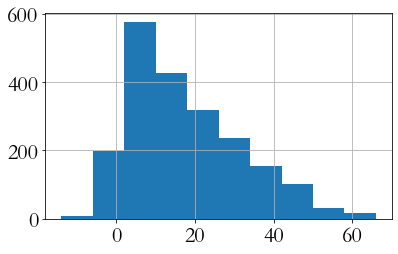

In [547]:
### Look at distribution of new variable -----------
out_forge_s_code["age_formation"].hist()

In [548]:
### Generate age of rebel group from becoming active -------
out_forge_s_code["age_active"] = out_forge_s_code["year"] - out_forge_s_code["fightyear"]
print(out_forge_s_code["age_active"].unique())
out_forge_s_code[["dyad_new_id", "year", "fightyear", "age_active"]].sample(n = 10, random_state=1)

[44. 45. 46. 47. 48. 49. 50. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.
 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42.  2.  3.  0. 43.  1.  4.
  9.  7.  5.  6. 10. 11. 12. 13. 14. 15. 16. 17.  8. 19. 18. 53. -7. -2.
 -3. -1. -4. -5. -9. -8. 51. 52. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63.
 64. 65. -6.]


,dyad_new_id,year,fightyear,age_active
350,619,2007,2006.0,1.0
334,613,1997,1992.0,5.0
919,565,1990,1976.0,14.0
594,763,1993,1968.0,25.0
571,11975,2011,2011.0,0.0
447,586,1999,1998.0,1.0
1418,748,2002,2001.0,1.0
971,521,1991,1982.0,9.0
956,781,2001,1983.0,18.0
218,885,2006,1992.0,14.0


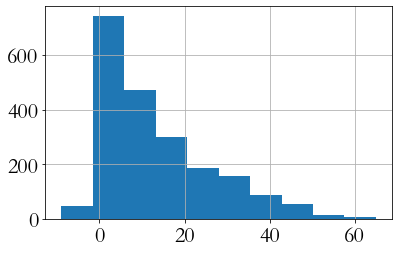

In [549]:
### Look at distribution of new variable -----------
out_forge_s_code["age_active"].hist()

In [550]:
### Goals of the rebel group -------- 
out_forge_s_code[['goalnominal',
 'goalindep',
 'goalauto',
 'goalrights',
 'goalrep',
 'goalchange',
 'goaldem',
 'goalother',
 'goalnote']].head(3)

,goalnominal,goalindep,goalauto,goalrights,goalrep,goalchange,goaldem,goalother,goalnote
654,autonomy for Kurds in Iran,0,1,0,0,0,0,0,NaN
655,autonomy for Kurds in Iran,0,1,0,0,0,0,0,NaN
653,autonomy for Kurds in Iran,0,1,0,0,0,0,0,NaN


In [551]:
### Categorize goal territory ----------
out_forge_s_code["goal_territory"] = 0
out_forge_s_code.loc[(out_forge_s_code['goalindep'] == 1) | (out_forge_s_code['goalauto'] == 1), 
                     "goal_territory"] = 1

In [552]:
### Check coding ------------------
print(out_forge_s_code[out_forge_s_code.goal_territory == 1].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.goalindep == 1].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.goalauto == 1].shape[0]) # 
print(len(out_forge_s_code.loc[(out_forge_s_code['goalindep'] == 1) | (out_forge_s_code['goalauto'] == 1)]))

1110
950
161
1110


In [553]:
### Categorize government representation  ----------
out_forge_s_code["goal_gov_represent"] = 0
out_forge_s_code.loc[(out_forge_s_code['goalrights'] == 1) | (out_forge_s_code['goalrep'] == 1), 
                     "goal_gov_represent"] = 1

In [554]:
### Check coding -----------
print(out_forge_s_code[out_forge_s_code.goal_gov_represent == 1].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.goalrights == 1].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.goalrep == 1].shape[0]) # 
print(len(out_forge_s_code.loc[(out_forge_s_code['goalrights'] == 1) | (out_forge_s_code['goalrep'] == 1)]))

287
235
52
287


In [555]:
### Categorize government replace  ----------
out_forge_s_code["goal_gov_replace"] = 0
out_forge_s_code.loc[(out_forge_s_code['goalchange'] == 1) | (out_forge_s_code['goaldem'] == 1), 
                     "goal_gov_replace"] = 1

In [556]:
### Check coding ------------------
print(out_forge_s_code[out_forge_s_code.goal_gov_replace == 1].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.goalchange == 1].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.goaldem == 1].shape[0]) # 
print(len(out_forge_s_code.loc[(out_forge_s_code['goalchange'] == 1) | (out_forge_s_code['goaldem'] == 1)]))

883
858
140
883


In [557]:
### Ideology of rebel group -------
out_forge_s_code[['ideology',
 'ideolcom',
 'ideolleft',
 'ideolright',
 'ideolnat',
 'ideolanti',
 'ideolrel',
 'ideoloth',
 'ideolnote']].head(3)

,ideology,ideolcom,ideolleft,ideolright,ideolnat,ideolanti,ideolrel,ideoloth,ideolnote
654,1,1,0,0,0,0,0,0,Marxist-Leninist; had to abandon nationalist rhetoric of parent org at behest of USSR
655,1,1,0,0,0,0,0,0,Marxist-Leninist; had to abandon nationalist rhetoric of parent org at behest of USSR
653,1,1,0,0,0,0,0,0,Marxist-Leninist; had to abandon nationalist rhetoric of parent org at behest of USSR


In [558]:
### Categorize ideology left  ----------
out_forge_s_code["ideo_left"] = 0
out_forge_s_code.loc[(out_forge_s_code['ideolcom'] == 1) | (out_forge_s_code['ideolleft'] == 1), 
                     "ideo_left"] = 1

In [559]:
### Check coding ------------------
print(out_forge_s_code[out_forge_s_code.ideo_left == 1].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.ideolcom == 1].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.ideolleft == 1].shape[0]) # 
print(len(out_forge_s_code.loc[(out_forge_s_code['ideolcom'] == 1) | (out_forge_s_code['ideolleft'] == 1)]))

649
595
65
649


In [560]:
### Categorize ideology right  ----------
out_forge_s_code["ideo_right"] = 0
out_forge_s_code.loc[(out_forge_s_code['ideolright'] == 1) | (out_forge_s_code['ideolnat'] == 1), 
                     "ideo_right"] = 1

In [561]:
### Check coding ------------------
print(out_forge_s_code[out_forge_s_code.ideo_right == 1].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.ideolright == 1].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.ideolnat == 1].shape[0]) # 
print(len(out_forge_s_code.loc[(out_forge_s_code['ideolright'] == 1) | (out_forge_s_code['ideolnat'] == 1)]))

968
15
955
968


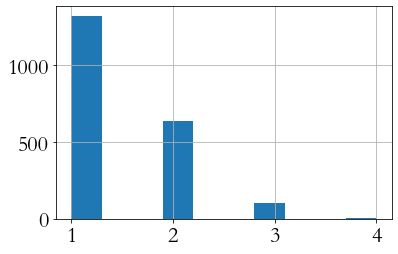

In [562]:
### Additive index for goals of rebel group -----
out_forge_s_code["goal_total"] = out_forge_s_code["goalindep"] + out_forge_s_code["goalauto"] + out_forge_s_code["goalrights"] + \
            out_forge_s_code["goalrep"] + out_forge_s_code["goalchange"] + out_forge_s_code["goaldem"] + out_forge_s_code["goalother"]
out_forge_s_code["goal_total"].hist()

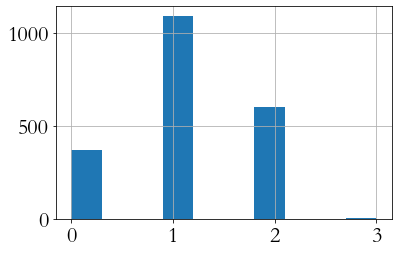

In [563]:
### Additive index for ideology of rebel group -----
out_forge_s_code["ideo_total"] = out_forge_s_code["ideolcom"] + out_forge_s_code["ideolleft"] + out_forge_s_code["ideolright"] + \
                out_forge_s_code["ideolnat"] + out_forge_s_code["ideolanti"] + out_forge_s_code["ideolrel"] + out_forge_s_code["ideoloth"]
out_forge_s_code["ideo_total"].hist()

In [564]:
### Copy remaining features -----
out_forge_s_code["ideo_anti_system"] = out_forge_s_code['ideolanti']
out_forge_s_code["ideo_religious"] = out_forge_s_code['ideolrel']

In [565]:
### Religion and ethnicity ------
out_forge_s_code[['religious',
 'religion',
 'ethnic',
 'ethnicity']].head(2)

,religious,religion,ethnic,ethnicity
654,0,0,1,Kurdish
655,0,0,1,Kurdish


In [566]:
### Copy features -----
out_forge_s_code["ident_ethnicity"] = out_forge_s_code['ethnic']
out_forge_s_code["ident_religious"] = out_forge_s_code['religious']

In [567]:
### Parent Organization -----
out_forge_s_code[["preorg",
"preorgno",
"preorgreb",
"preorgter",
"preorgpar",
"preorgmvt",
"preorgyou",
"preorglab",
"preorgmil",
"preorggov",
"preorgfmr",
"preorgrel",
"preorgfor",
"preorgref",
"preorgeth",
"preorgoth",
"preorgname"]].head(2)

,preorg,preorgno,preorgreb,preorgter,preorgpar,preorgmvt,preorgyou,preorglab,preorgmil,preorggov,preorgfmr,preorgrel,preorgfor,preorgref,preorgeth,preorgoth,preorgname
654,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Komalay JK
655,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Komalay JK


In [568]:
### Categorize parent undefined  ----------
out_forge_s_code["parent_undefined"] = 0
out_forge_s_code.loc[(out_forge_s_code['preorgno'] == 1) | (out_forge_s_code['preorgeth'] == 1) |
                     # not evolve out of a pre-existing organization
                     # identifiable ethnic group, but not from an identifiable (named) organization within that community?
                     (out_forge_s_code['preorgref'] == 1),
                     # identifiable refugee community or other exiled population
                     "parent_undefined"] = 1

In [569]:
### Check coding ------------------
print(out_forge_s_code[out_forge_s_code.parent_undefined == 1].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.preorgno == 1].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.preorgeth == 1].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.preorgref == 1].shape[0]) # 
print(len(out_forge_s_code.loc[(out_forge_s_code['preorgno'] == 1) | (out_forge_s_code['preorgeth'] == 1) | 
                              (out_forge_s_code['preorgref'] == 1)]))

249
44
99
108
249


In [570]:
### Categorize splinter rebel  ----------
out_forge_s_code["parent_splinter_nonstate"] = 0
out_forge_s_code.loc[(out_forge_s_code['preorgreb'] == 1) | (out_forge_s_code['preorgter'] == 1) |
                      # pre-existing rebel group (above 25 battle-related deaths)
                      # pre-existing rebel group (below 25 battle-related deaths)
                     (out_forge_s_code['preorgfor'] == 1), # foreign fighters/mercenaries/troops from other government
                     "parent_splinter_nonstate"] = 1

In [571]:
### Check coding ------------------
print(out_forge_s_code[out_forge_s_code.parent_splinter_nonstate == 1].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.preorgreb == 1].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.preorgter == 1].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.preorgfor == 1].shape[0]) # 
print(len(out_forge_s_code.loc[(out_forge_s_code['preorgreb'] == 1) | (out_forge_s_code['preorgter'] == 1) | 
                              (out_forge_s_code['preorgfor'] == 1)]))

1235
833
439
46
1235


In [572]:
### Categorize splinter state  ----------
out_forge_s_code["parent_splinter_state"] = 0
out_forge_s_code.loc[(out_forge_s_code['preorgmil'] == 1) | (out_forge_s_code['preorgfmr'] == 1) |
                      # government’s current armed forces?
                      # former government’s armed forces
                    (out_forge_s_code['preorggov'] == 1), # from a non-military faction of the current government?
                     "parent_splinter_state"] = 1

In [573]:
### Check coding ------------------
print(out_forge_s_code[out_forge_s_code.parent_splinter_state == 1].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.preorgmil == 1].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.preorgfmr == 1].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.preorggov == 1].shape[0]) # 
print(len(out_forge_s_code.loc[(out_forge_s_code['preorgmil'] == 1) | (out_forge_s_code['preorgfmr'] == 1) | 
                              (out_forge_s_code['preorggov'] == 1)]))

184
88
92
5
184


In [574]:
### Categorize civil society  ----------
out_forge_s_code["parent_civil_society"] = 0
out_forge_s_code.loc[(out_forge_s_code['preorgpar'] == 1) | (out_forge_s_code['preorgmvt'] == 1) |
                      # political party
                      # informal political movement
                    (out_forge_s_code['preorgyou'] == 1) | (out_forge_s_code['preorglab'] == 1) |
                     # student/youth group
                     # labor/trade union
                    (out_forge_s_code['preorgrel'] == 1), 
                     # religious organization
                     "parent_civil_society"] = 1

In [575]:
### Check coding ------------------
print(out_forge_s_code[out_forge_s_code.parent_civil_society == 1].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.preorgpar == 1].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.preorgmvt == 1].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.preorgyou == 1].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.preorglab == 1].shape[0]) # 
print(out_forge_s_code[out_forge_s_code.preorgrel == 1].shape[0]) # 

print(len(out_forge_s_code.loc[(out_forge_s_code['preorgpar'] == 1) | (out_forge_s_code['preorgmvt'] == 1) | 
                              (out_forge_s_code['preorgyou'] == 1) |  (out_forge_s_code['preorglab'] == 1) |
                              (out_forge_s_code['preorgrel'] == 1)]))

664
306
165
166
7
113
664


In [576]:
### Copy features -----
out_forge_s_code["parent_merger"] = out_forge_s_code['merger']

In [577]:
### Check columns ---------------
for col in out_forge_s_code.columns: 
    print(col) 

year
StateAbb
ccode
cname
side_a
side_a_new_id
side_b
side_b_new_id
dyad_name
dyad_new_id
active_year
best
high
low
foundloc
foundyear
foundmo
foundday
fightyear
fightmo
fightday
goalnominal
goalindep
goalauto
goalrights
goalrep
goalchange
goaldem
goalother
goalnote
ideology
ideolcom
ideolleft
ideolright
ideolnat
ideolanti
ideolrel
ideoloth
ideolnote
religious
religion
ethnic
ethnicity
preorg
preorgno
preorgreb
preorgter
preorgpar
preorgmvt
preorgyou
preorglab
preorgmil
preorggov
preorgfmr
preorgrel
preorgfor
preorgref
preorgeth
preorgoth
preorgname
merger
splinter
splinterUCDP
foundloc_cat
foundloc_cat_lab
foundloc_cat_cat
foundloc_cat_cat_lab
age_formation
age_active
goal_territory
goal_gov_represent
goal_gov_replace
ideo_left
ideo_right
goal_total
ideo_total
ideo_anti_system
ideo_religious
ident_ethnicity
ident_religious
parent_undefined
parent_splinter_nonstate
parent_splinter_state
parent_civil_society
parent_merger


In [578]:
### Missing values in rebel visibility model ------
rebel_visi = out_forge_s_code[["active_year", "foundloc_cat_cat",  "age_formation", "age_active"]]
null_data = rebel_visi[rebel_visi.isnull().any(axis=1)]
null_data

,active_year,foundloc_cat_cat,age_formation,age_active


In [579]:
### Missing values in social networks model ------
rebel_net = out_forge_s_code[['active_year', "goal_territory",
  "goal_gov_represent",
  "goal_gov_replace",
  "ideo_left",
  "ideo_right",
  "ideo_anti_system",
  "ideo_religious",
  "ident_ethnicity", 
  "ident_religious",
  "parent_undefined",
  "parent_splinter_nonstate",
  "parent_splinter_state", 
  "parent_civil_society",
  "parent_merger", 
  "goal_total",
  "ideo_total"]]
null_data = rebel_net[rebel_net.isnull().any(axis=1)]
null_data

,active_year,goal_territory,goal_gov_represent,goal_gov_replace,ideo_left,ideo_right,ideo_anti_system,ideo_religious,ident_ethnicity,ident_religious,parent_undefined,parent_splinter_nonstate,parent_splinter_state,parent_civil_society,parent_merger,goal_total,ideo_total


In [580]:
### Reset index ------
out_forge_s_code.reset_index(drop=False, inplace=False)
out_forge_s_code.head(3)

,year,StateAbb,ccode,cname,side_a,side_a_new_id,side_b,side_b_new_id,dyad_name,dyad_new_id,...,ideo_total,ideo_anti_system,ideo_religious,ident_ethnicity,ident_religious,parent_undefined,parent_splinter_nonstate,parent_splinter_state,parent_civil_society,parent_merger
654,1990,IRN,630,Iran,Government of Iran,114,KDPI,164,Government of Iran - KDPI,406,...,1,0,0,1,0,0,0,0,1,0
655,1991,IRN,630,Iran,Government of Iran,114,KDPI,164,Government of Iran - KDPI,406,...,1,0,0,1,0,0,0,0,1,0
653,1992,IRN,630,Iran,Government of Iran,114,KDPI,164,Government of Iran - KDPI,406,...,1,0,0,1,0,0,0,0,1,0


In [581]:
### Check number of observations -----
len(out_forge_s_code)

2065

In [582]:
### Save dataset -----------
out_forge_s_code.to_csv(os.path.join(out_paths["data"], "ucdp_forge.csv"), index=False, sep=',')